### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

### Utils

In [2]:
def nb_col_rows(df):
    N = len(df)
    variables = df.columns
    nb_variables = len(variables)
    print(f'N: {N}', f'Number of variables: {nb_variables}', sep='\t')
    return N, nb_variables

def missing_percentage(df, variable):
    return len(df[df[variable].isna()])/len(df)

def missing_values(df):
    nb_na = df.isnull().sum()
    return nb_na[nb_na>0]

def completion(df, variable):
    res = missing_percentage(df, variable)
    print(f'Completion of variable \'{variable}\': {round((1-res)*100, 2)}%')

In [3]:
def barplot(df, variable, size=7):
    plt.figure(figsize=(size, size))
    sns.countplot(y=variable, data=df)
    plt.title(variable)
    plt.show()

def uni_ana_qual(df, variable, size=7):
    print('Unique values :\n' , df[variable].unique())
    barplot(df, variable, size)

### Loading dataset

In [4]:
df = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

### First sight

In [5]:
df.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

### Deleting inaccurate variables

In [7]:
df = df.drop(['DataYear', 'PropertyName', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Comments', 'YearsENERGYSTARCertified'], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   BuildingType                     3376 non-null   object 
 2   PrimaryPropertyType              3376 non-null   object 
 3   Address                          3376 non-null   object 
 4   Neighborhood                     3376 non-null   object 
 5   Latitude                         3376 non-null   float64
 6   Longitude                        3376 non-null   float64
 7   YearBuilt                        3376 non-null   int64  
 8   NumberofBuildings                3368 non-null   float64
 9   NumberofFloors                   3376 non-null   int64  
 10  PropertyGFATotal                 3376 non-null   int64  
 11  PropertyGFAParking               3376 non-null   int64  
 12  PropertyGFABuilding(

No duplicates :

In [9]:
df.duplicated('OSEBuildingID').sum()

0

# Univariate analyses

## Qualitative variables

### BuildingType

In [10]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

Keeping only non habitation buildings

In [11]:
df = df.drop(df[df['BuildingType'] == 'Multifamily MR (5-9)'].index)
df = df.drop(df[df['BuildingType'] == 'Multifamily LR (1-4)'].index)
df = df.drop(df[df['BuildingType'] == 'Multifamily HR (10+)'].index)
len(df)

1668

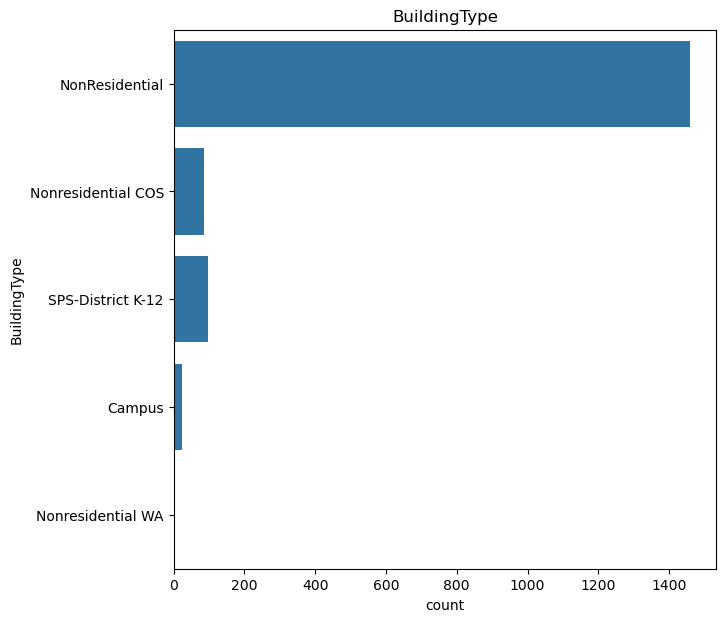

In [12]:
barplot(df, 'BuildingType')

In [13]:
df = df[df['BuildingType'] == 'NonResidential']

In [14]:
df.drop(['BuildingType'], axis=1, inplace=True)

### PrimaryPropertyType

In [15]:
df['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'University',
       'Small- and Mid-Sized Office', 'Self-Storage Facility',
       'Warehouse', 'K-12 School', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Worship Facility',
       'Supermarket / Grocery Store', 'Distribution Center', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily'],
      dtype=object)

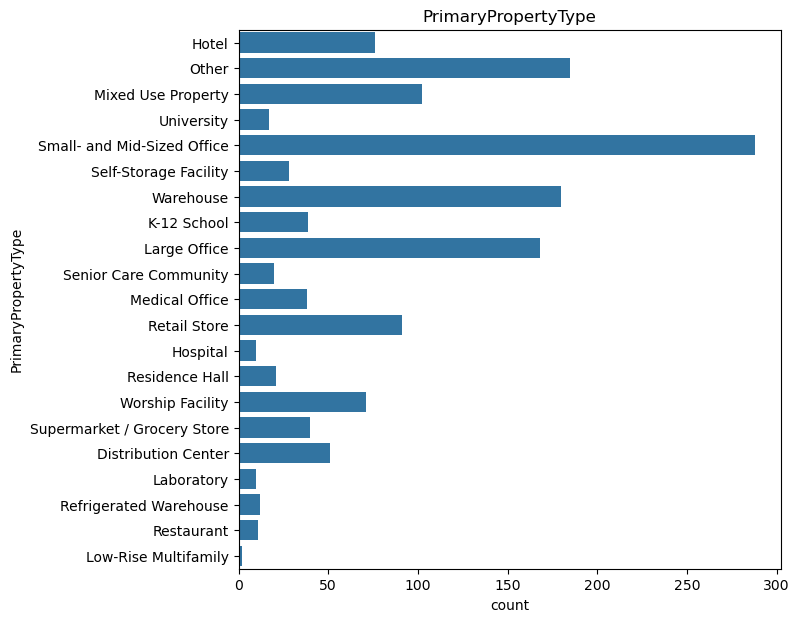

In [16]:
barplot(df, 'PrimaryPropertyType')

In [17]:
df['PrimaryPropertyType'] = np.where(df['PrimaryPropertyType'] == 'Office', 'Small-and Mid-Sized Office', df['PrimaryPropertyType'])

### Neighborhood

Unique values :
 ['DOWNTOWN' 'NORTHEAST' 'EAST' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'MAGNOLIA / QUEEN ANNE' 'CENTRAL' 'SOUTHWEST' 'SOUTHEAST'
 'NORTH' 'DELRIDGE' 'North' 'Delridge' 'Ballard' 'Northwest' 'Central']


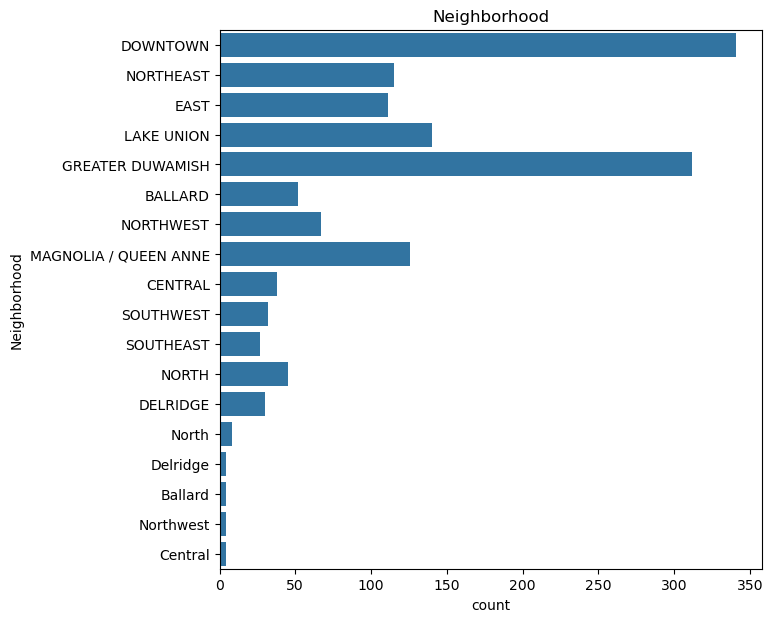

In [18]:
uni_ana_qual(df, 'Neighborhood')

### LargestPropertyUseType

Unique values :
 ['Hotel' 'Other - Entertainment/Public Assembly'
 'Fitness Center/Health Club/Gym' 'Social/Meeting Hall' 'Courthouse'
 'Other' 'College/University' 'Automobile Dealership' 'Office'
 'Self-Storage Facility' 'Non-Refrigerated Warehouse' 'K-12 School'
 'Other - Mall' 'Senior Care Community' 'Medical Office' 'Retail Store'
 'Hospital (General Medical & Surgical)' 'Museum'
 'Other - Lodging/Residential' 'Residence Hall/Dormitory'
 'Other/Specialty Hospital' 'Financial Office' 'Parking'
 'Multifamily Housing' 'Worship Facility' 'Restaurant' 'Data Center'
 'Laboratory' 'Supermarket/Grocery Store' 'Convention Center'
 'Urgent Care/Clinic/Other Outpatient' 'Distribution Center' nan
 'Strip Mall' 'Wholesale Club/Supercenter' 'Refrigerated Warehouse'
 'Manufacturing/Industrial Plant' 'Other - Recreation' 'Lifestyle Center'
 'Other - Public Services' 'Other - Education' 'Performing Arts'
 'Other - Services' 'Bank Branch' 'Other - Restaurant/Bar' 'Food Service'
 'Repair Services (V

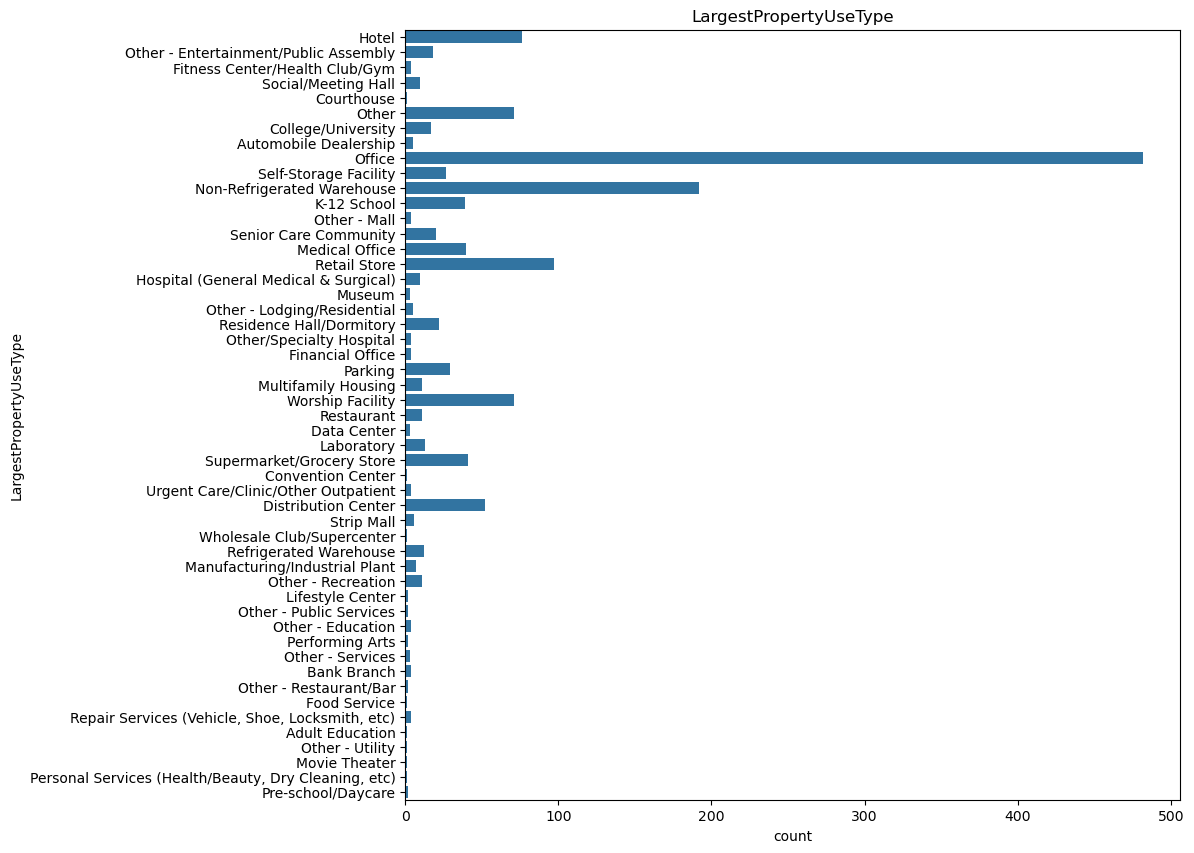

In [19]:
uni_ana_qual(df, 'LargestPropertyUseType', size=10)

In [20]:
uni_ana_qual(df, 'SecondLargestPropertyUseType', size=10)
uni_ana_qual(df, 'ThirdLargestPropertyUseType', size=10)

Unique values :
 [nan 'Parking' 'Office' 'Restaurant' 'K-12 School'
 'Refrigerated Warehouse' 'Non-Refrigerated Warehouse' 'Other - Education'
 'Vocational School' 'Retail Store'
 'Personal Services (Health/Beauty, Dry Cleaning, etc)'
 'Other - Entertainment/Public Assembly' 'Data Center' 'Swimming Pool'
 'Other' 'Courthouse' 'Self-Storage Facility' 'Movie Theater'
 'Supermarket/Grocery Store' 'Medical Office' 'Other - Services'
 'Laboratory' 'Other - Recreation' 'Convenience Store without Gas Station'
 'Performing Arts' 'College/University' 'Adult Education' 'Enclosed Mall'
 'Distribution Center' 'Multifamily Housing' 'Bar/Nightclub'
 'Financial Office' 'Manufacturing/Industrial Plant'
 'Other - Lodging/Residential' 'Bank Branch' 'Hotel' 'Worship Facility'
 'Fitness Center/Health Club/Gym'
 'Repair Services (Vehicle, Shoe, Locksmith, etc)' 'Food Service'
 'Food Sales' 'Pre-school/Daycare' 'Other - Restaurant/Bar'
 'Other - Public Services' 'Hospital (General Medical & Surgical)'
 'Aut

Unique values :
 [nan 'Restaurant' 'Swimming Pool' 'Office' 'Retail Store'
 'Other - Entertainment/Public Assembly' 'Data Center' 'Other'
 'Distribution Center' 'Food Service' 'Other - Services' 'Medical Office'
 'Parking' 'K-12 School' 'Fitness Center/Health Club/Gym'
 'Social/Meeting Hall' 'Pre-school/Daycare'
 'Convenience Store without Gas Station' 'Financial Office'
 'Non-Refrigerated Warehouse' 'Other - Restaurant/Bar' 'Other - Education'
 'Laboratory' 'Bank Branch' 'Multifamily Housing' 'Hotel'
 'Personal Services (Health/Beauty, Dry Cleaning, etc)'
 'Other - Recreation' 'Self-Storage Facility' 'Other - Technology/Science'
 'Refrigerated Warehouse' 'Bar/Nightclub' 'Manufacturing/Industrial Plant'
 'Other/Specialty Hospital' 'Fast Food Restaurant' 'Worship Facility'
 'Supermarket/Grocery Store' 'Strip Mall' 'Vocational School']


### 'DefaultData', 'ComplianceStatus', 'Outlier'

Unique values :
 [False  True]


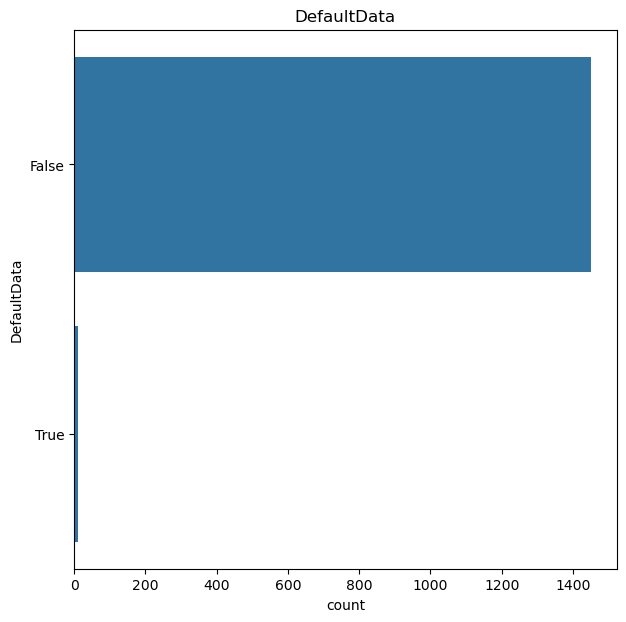

Unique values :
 ['Compliant' 'Non-Compliant' 'Error - Correct Default Data' 'Missing Data']


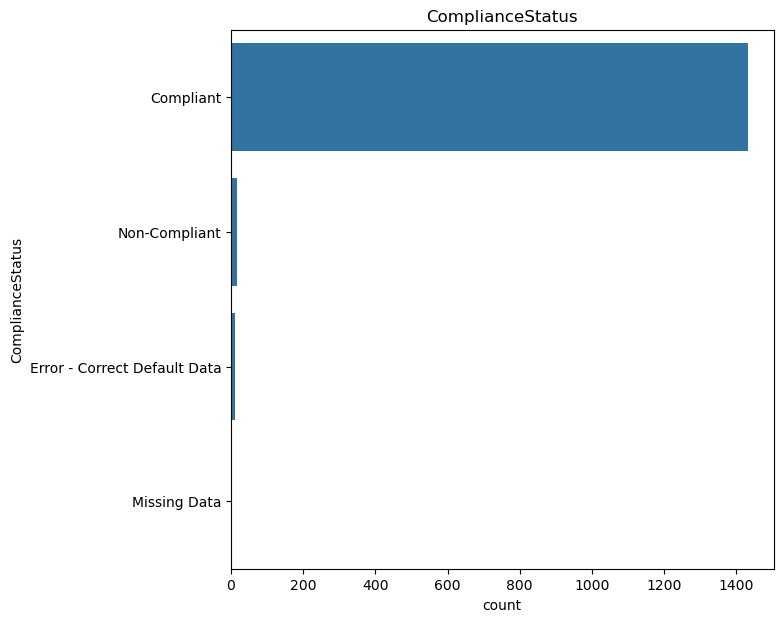

Unique values :
 [nan 'High outlier' 'Low outlier']


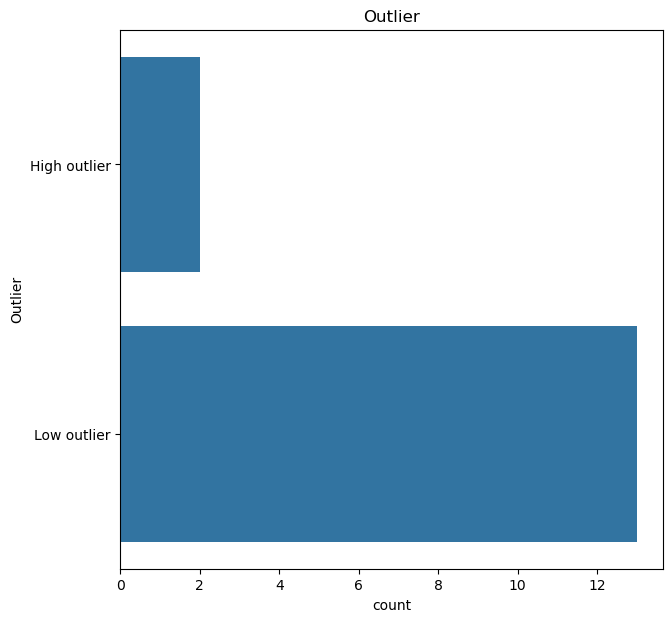

In [21]:
for variable in ['DefaultData', 'ComplianceStatus',	'Outlier']:
    uni_ana_qual(df, variable)

In [22]:
df['Outlier'] = df['Outlier'].fillna('Standard')

### Deleting useless variables

In [23]:
df.drop(['DefaultData', 'ComplianceStatus', 'Outlier'], axis=1, inplace=True)

In [24]:
df.drop(['Address'], axis=1, inplace=True)

In [25]:
df.drop(['ListOfAllPropertyUseTypes'], axis=1, inplace=True)

In [26]:
df.columns

Index(['OSEBuildingID', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
       'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

## Quantitative variables

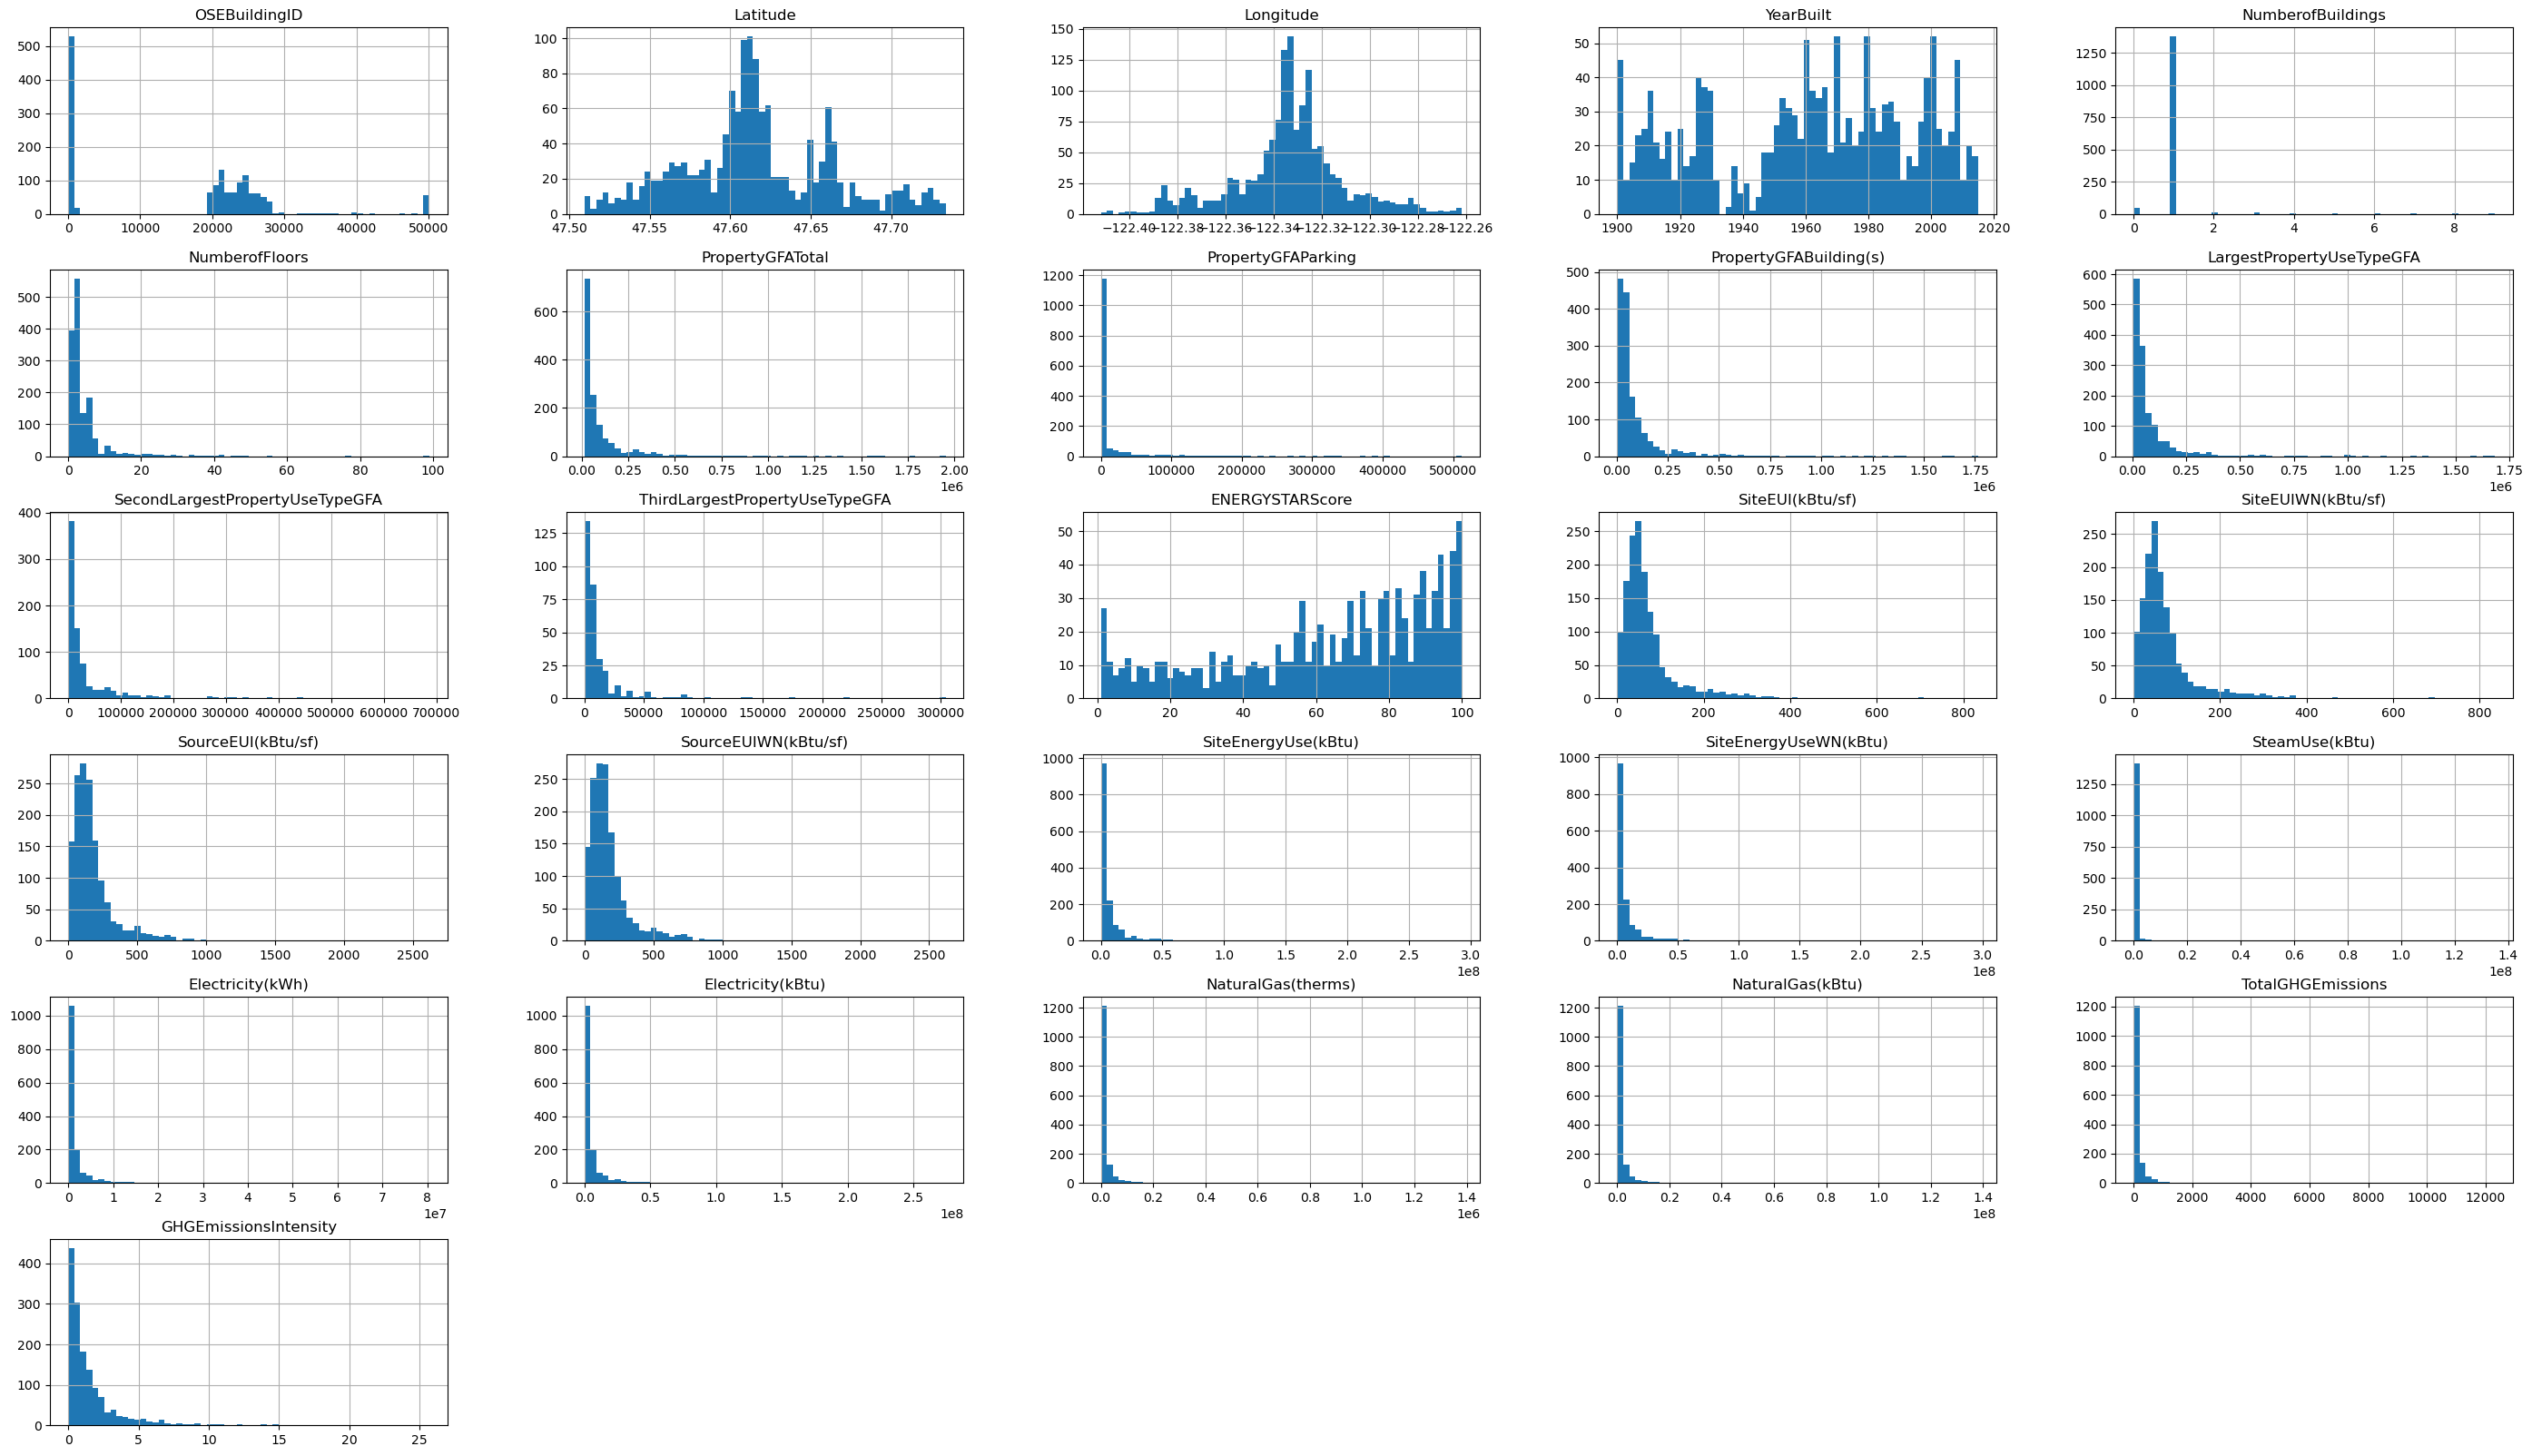

In [27]:
df.hist(bins=60, figsize=(35, 20))
plt.show()

In [28]:
df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [29]:
df.columns

Index(['OSEBuildingID', 'PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [30]:
quant_variables = [
    'YearBuilt',
    'NumberofBuildings', 'NumberofFloors',
    
    'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
    
    'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
    
    'ENERGYSTARScore',
    
    'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
    'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
    
    'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
    
    'TotalGHGEmissions', 'GHGEmissionsIntensity'
]

/tmp/ipykernel_10276/2538303677.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 3, figsize=(25, 3))


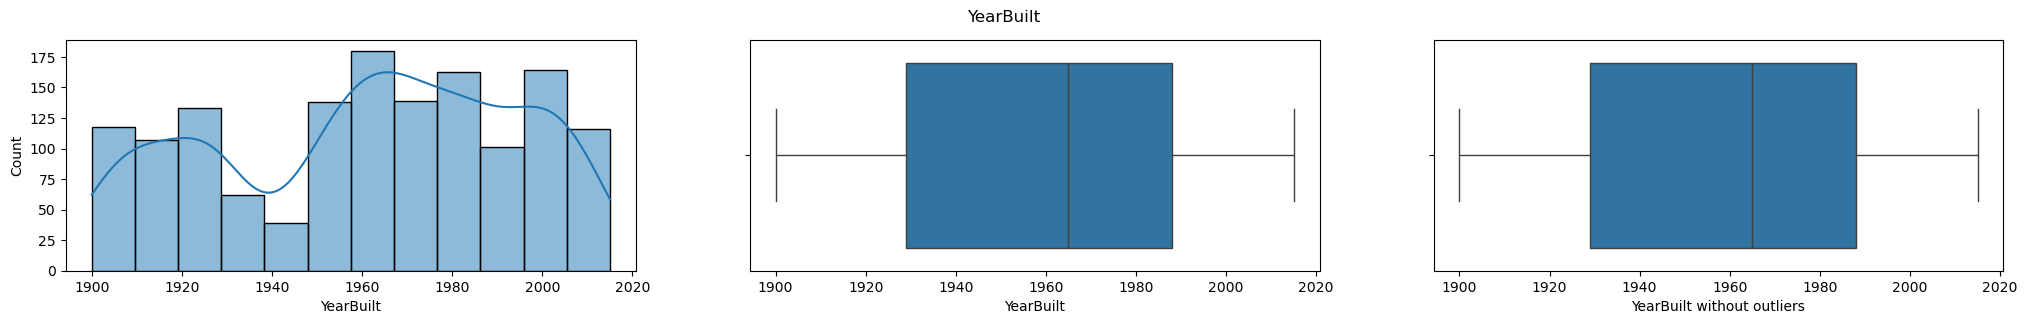

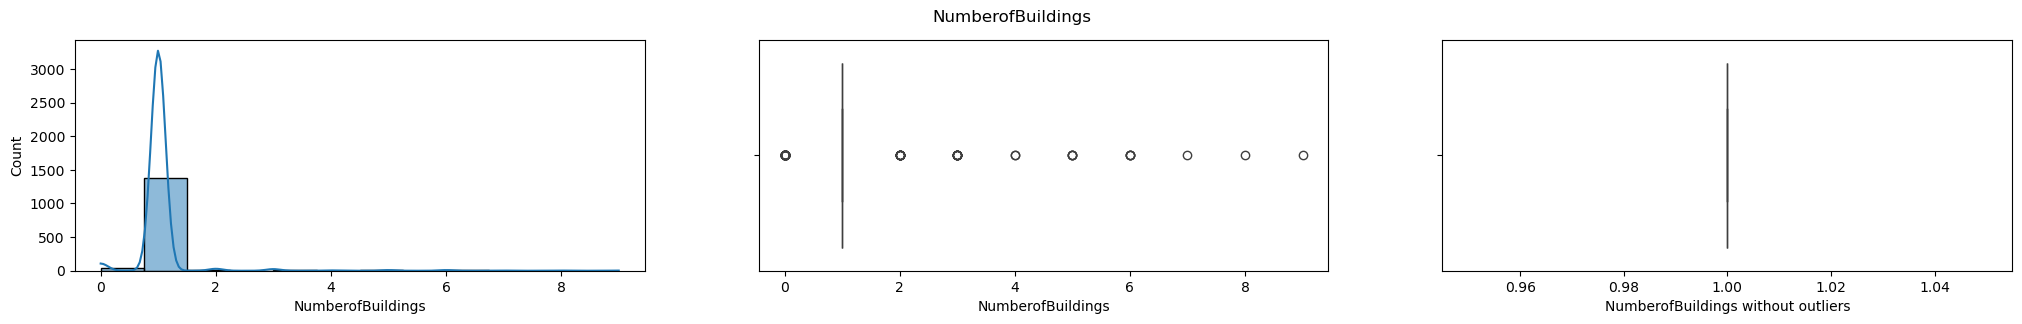

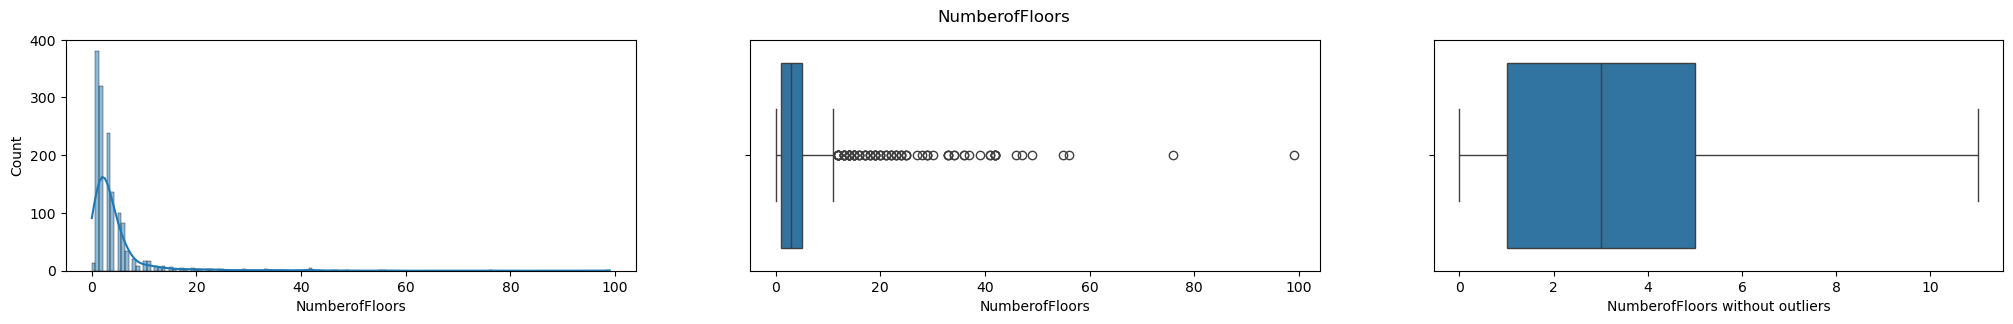

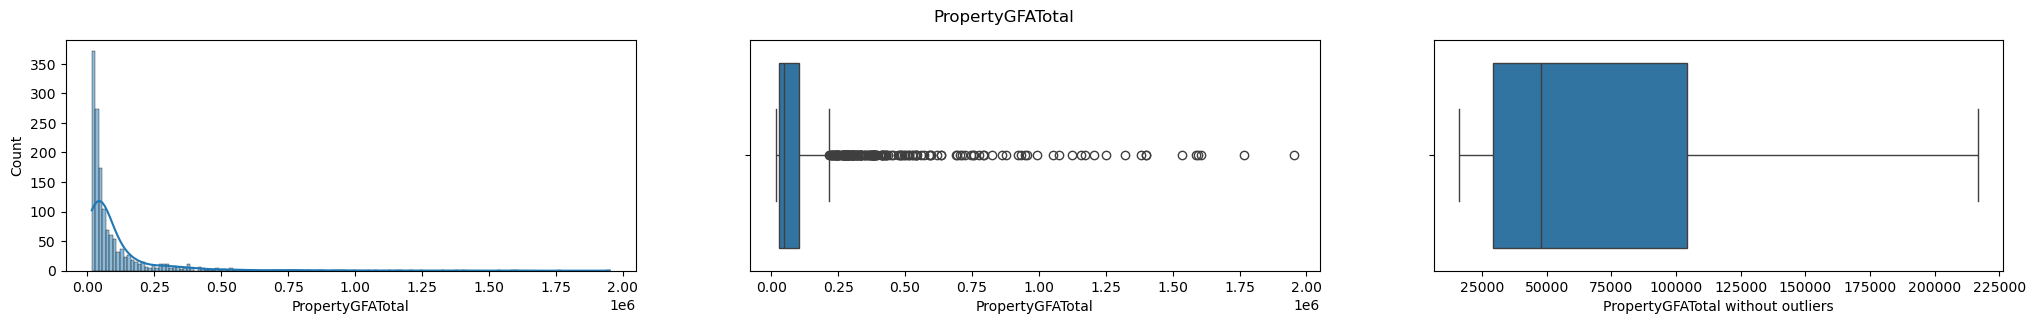

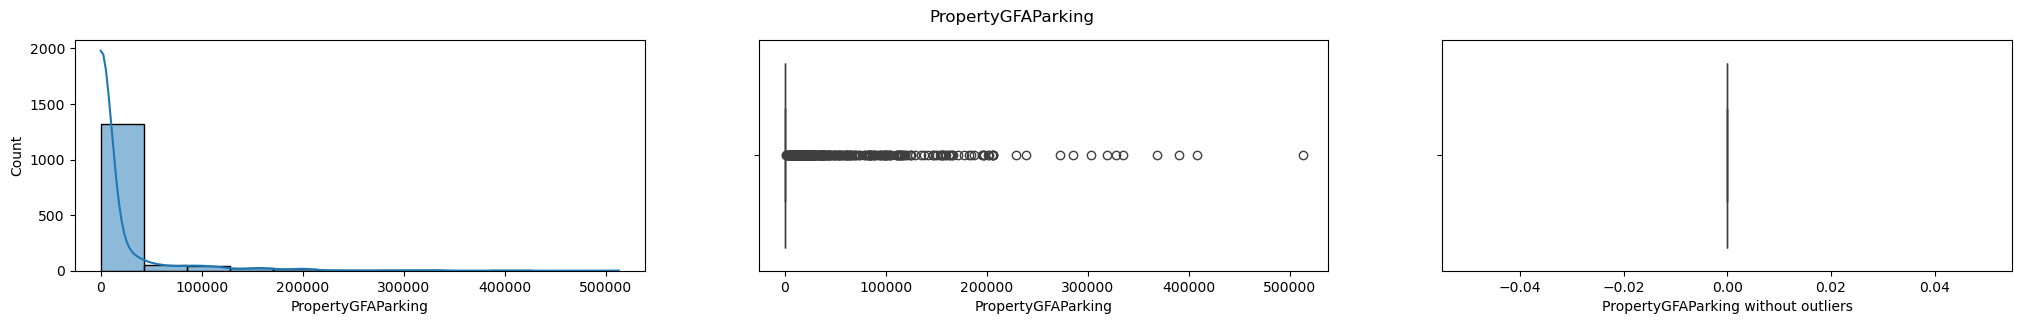

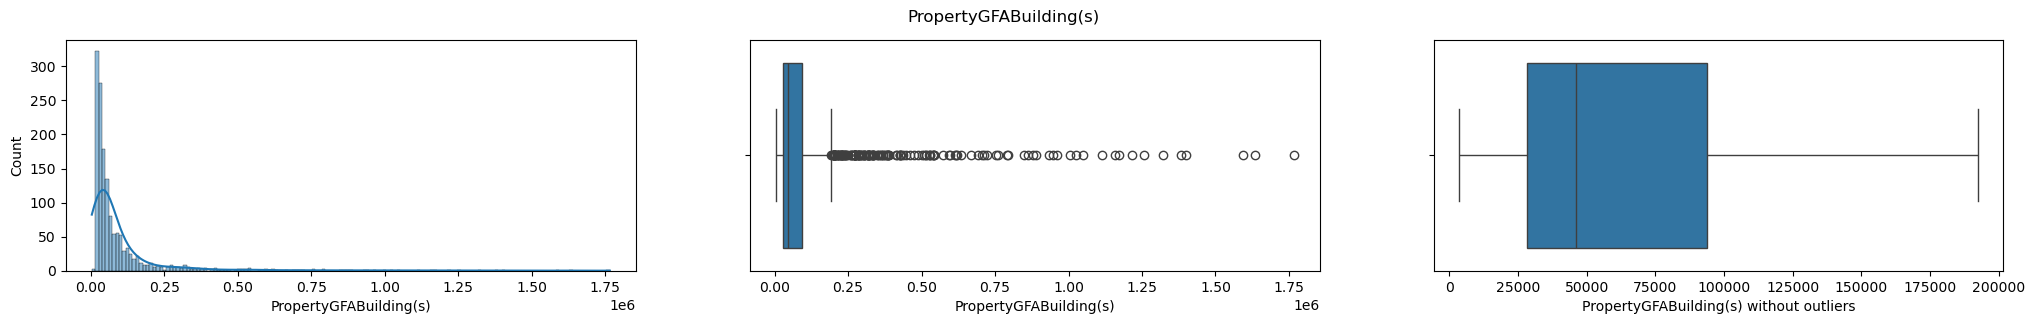

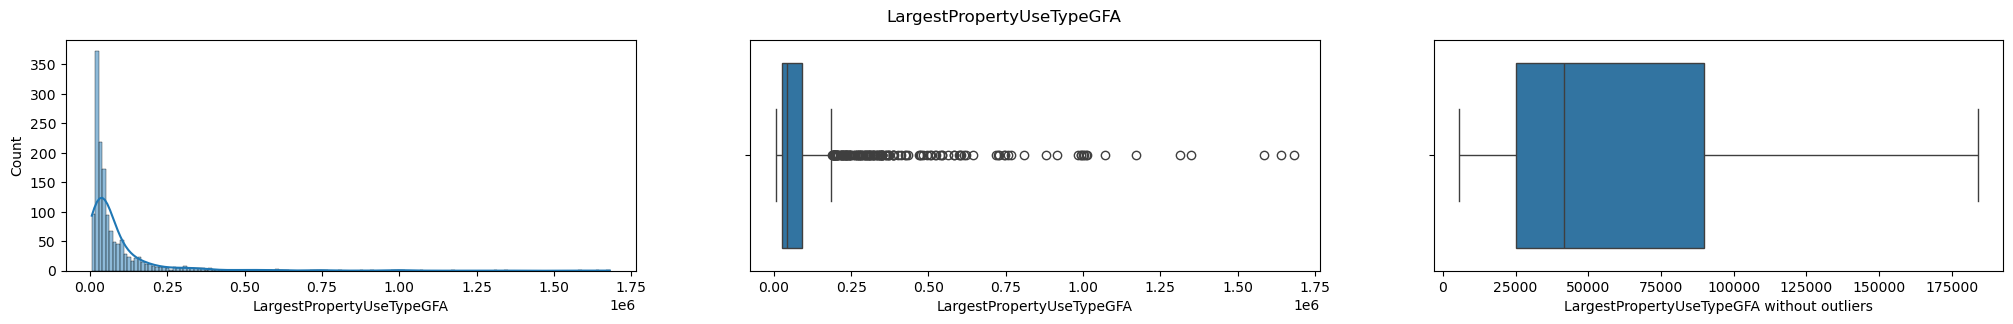

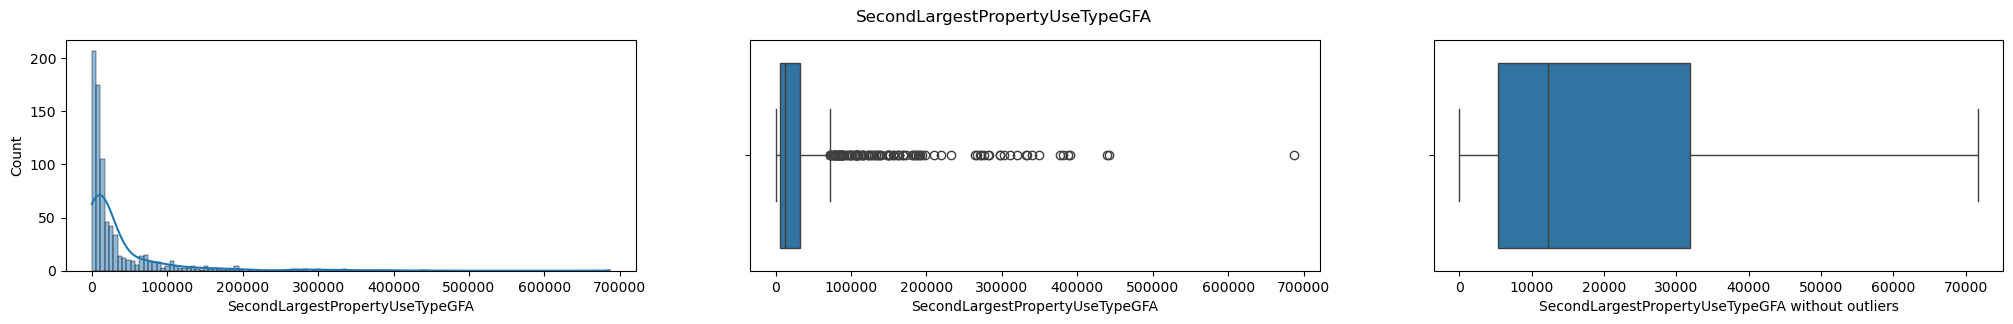

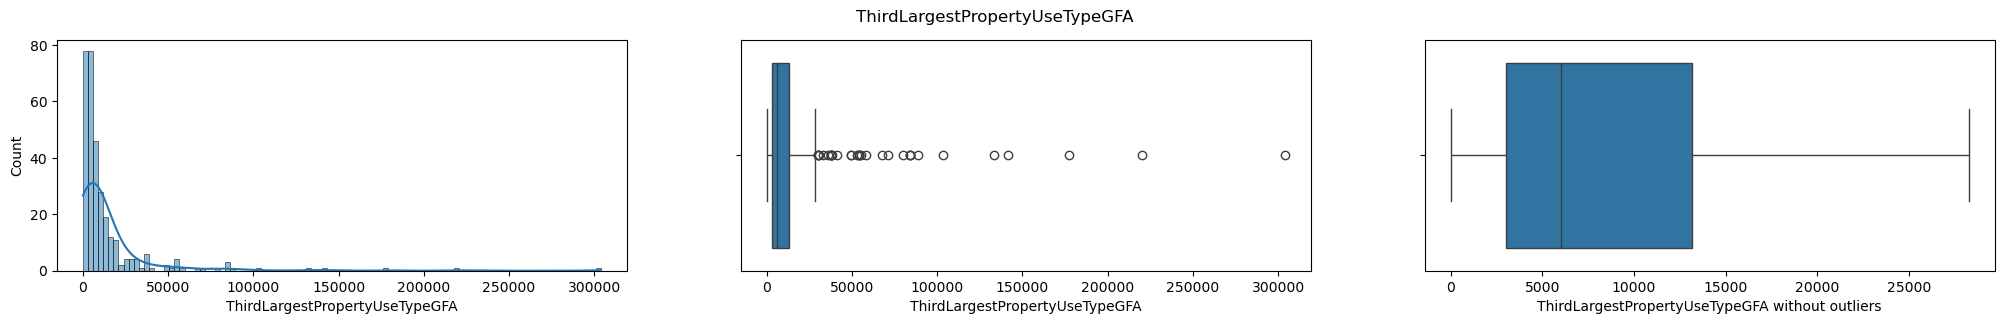

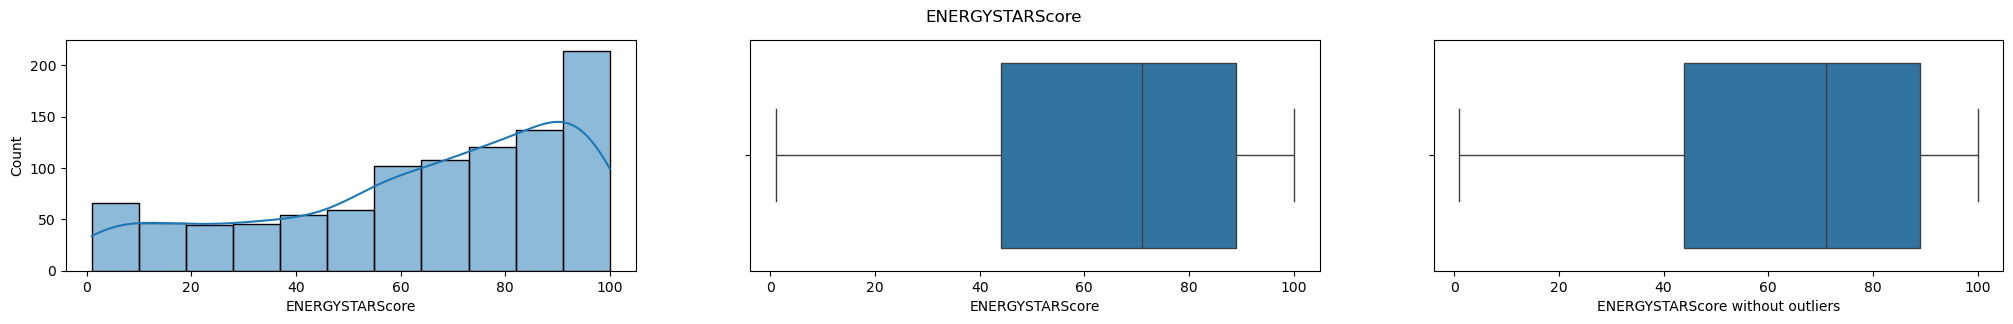

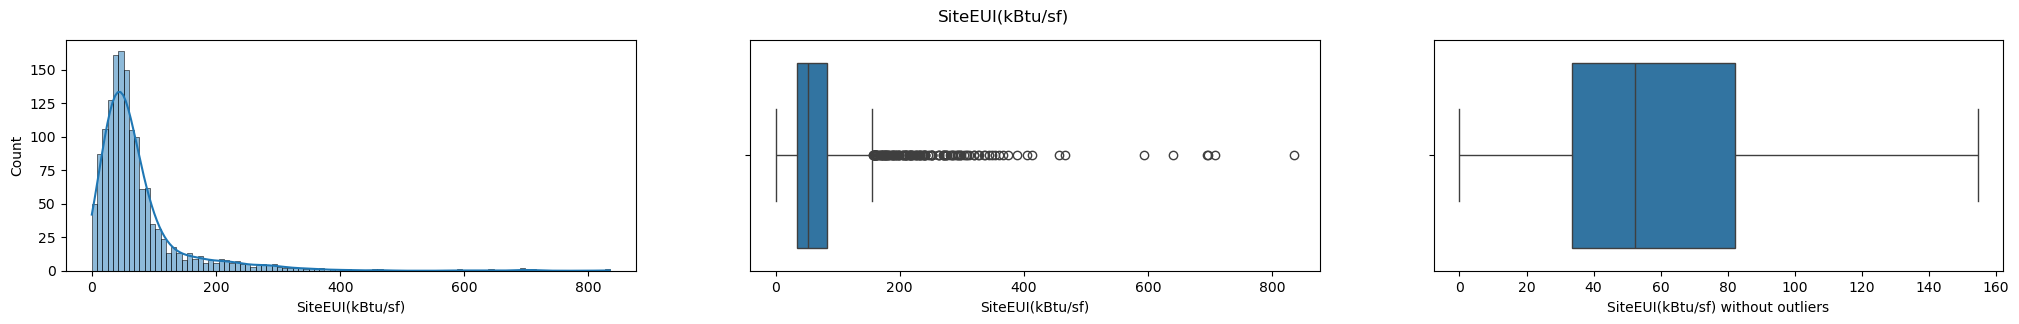

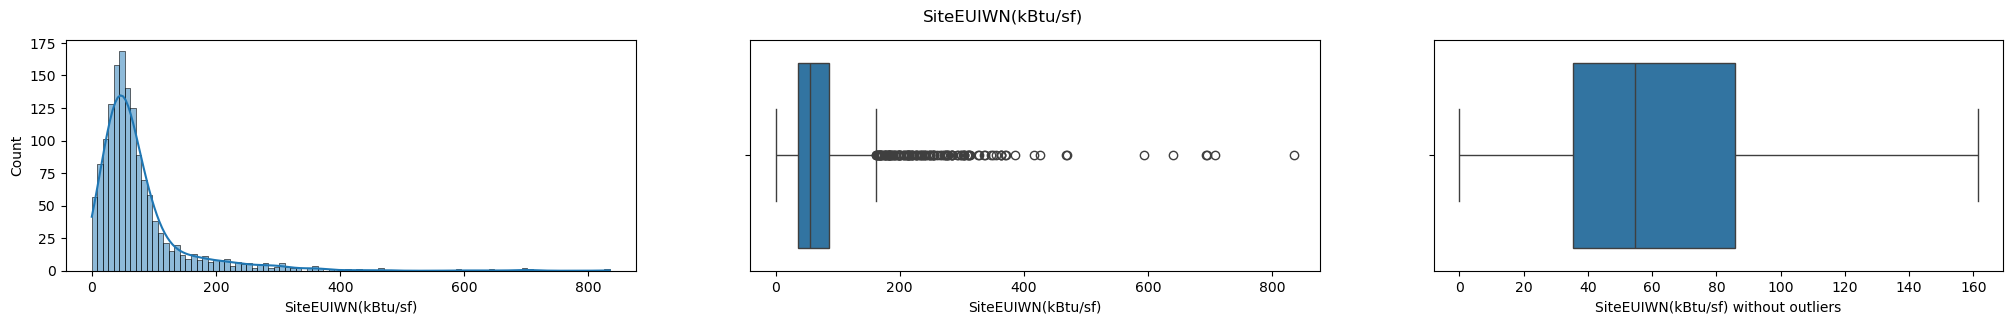

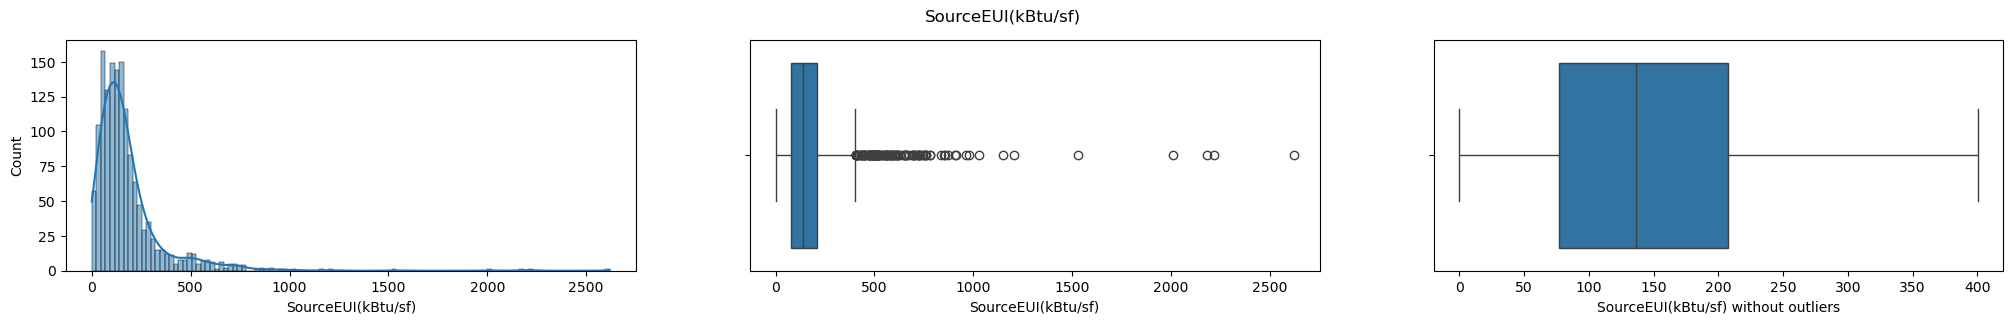

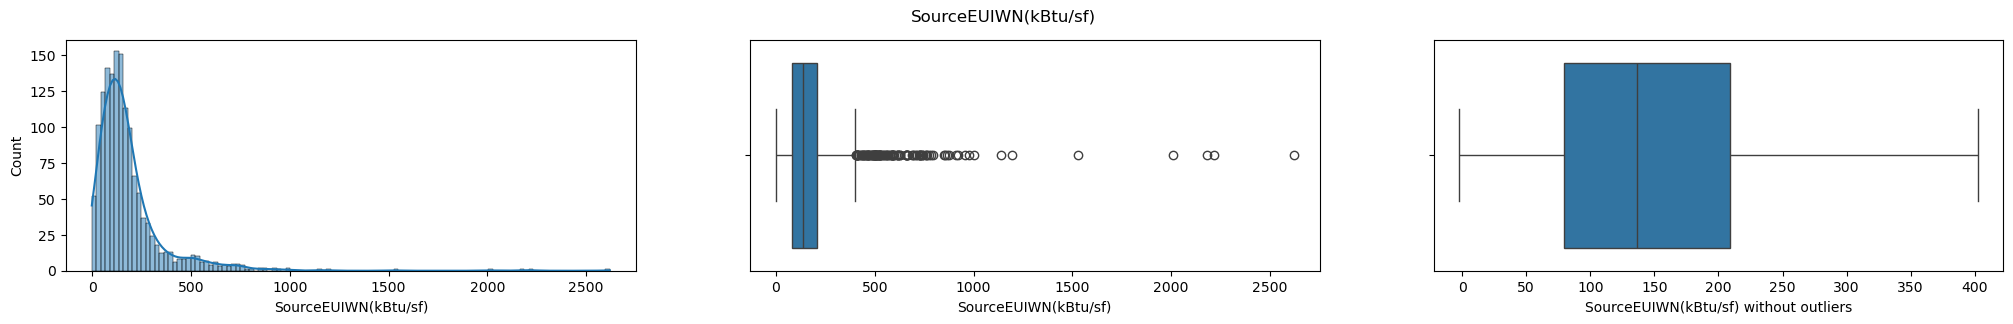

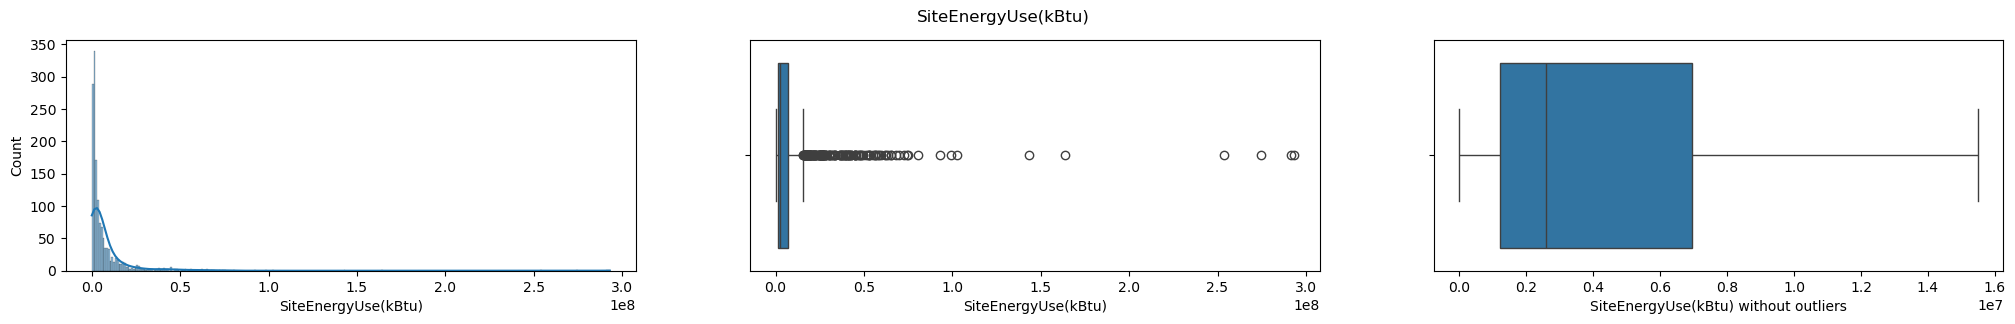

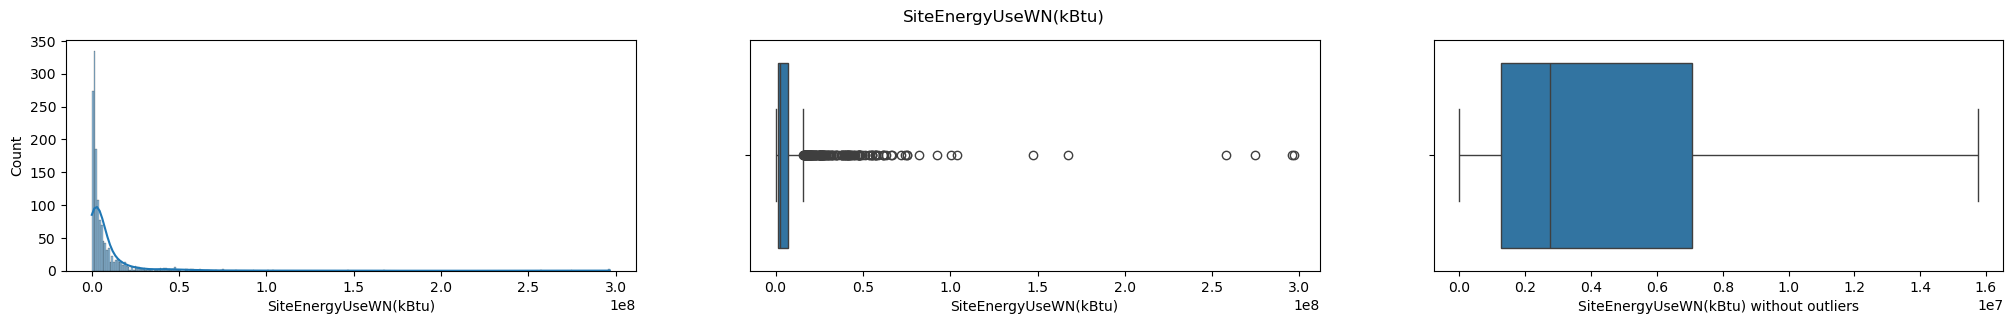

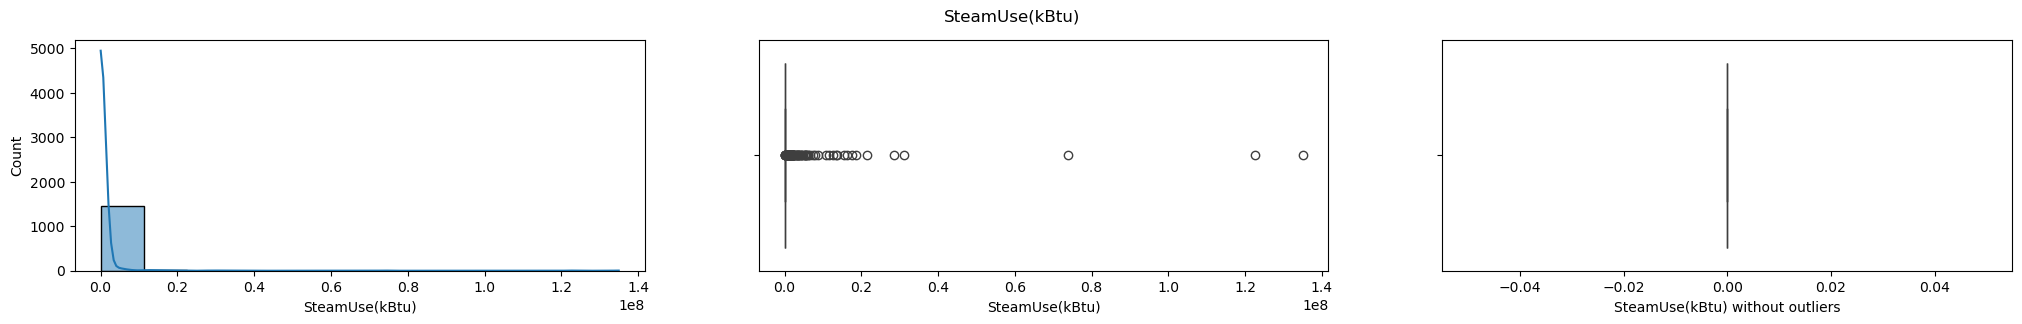

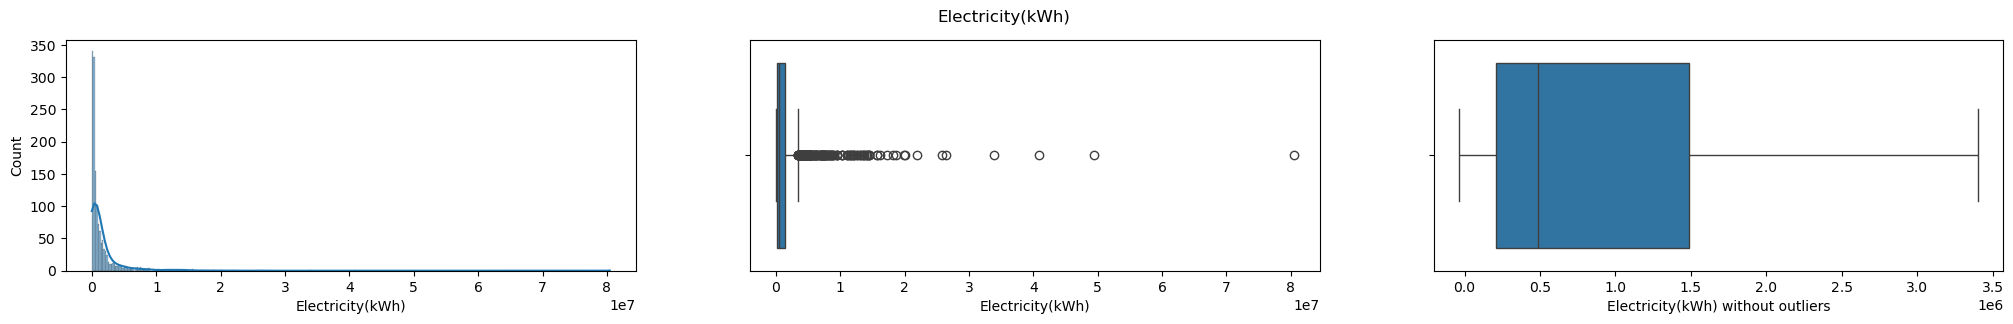

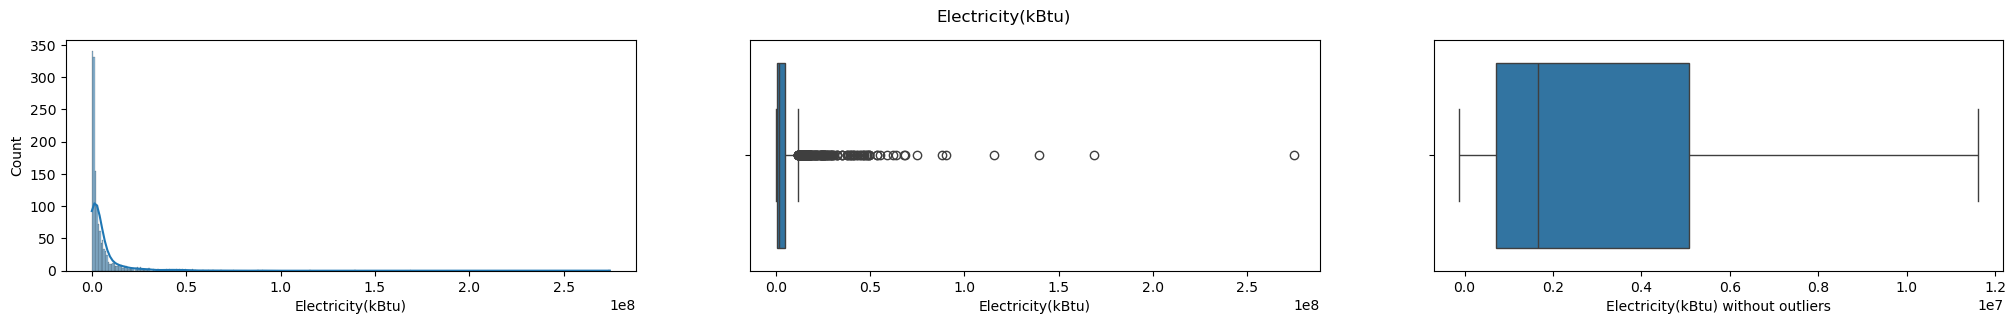

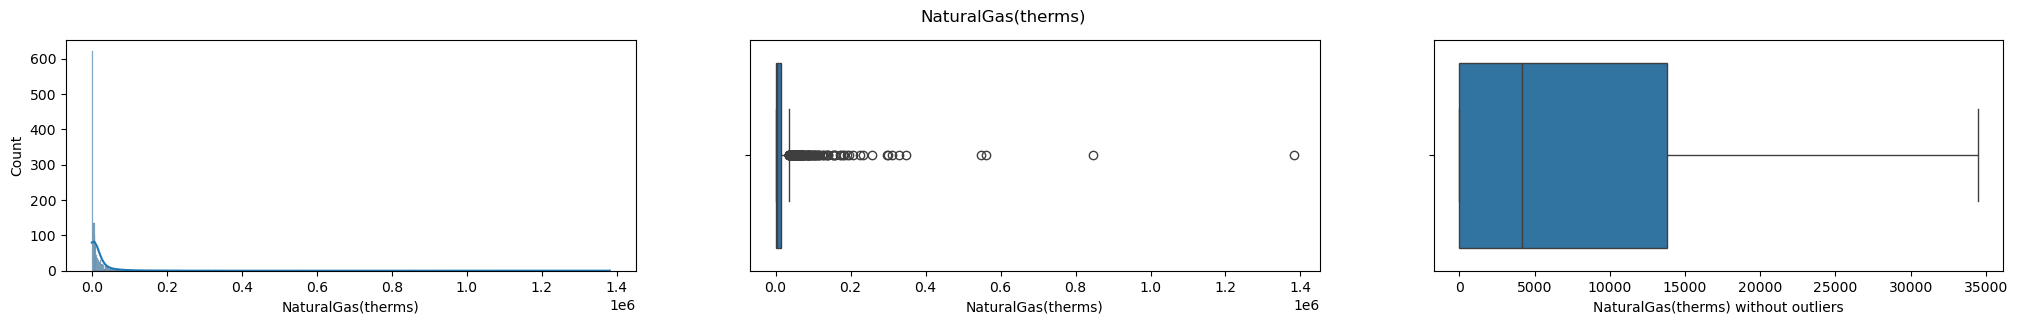

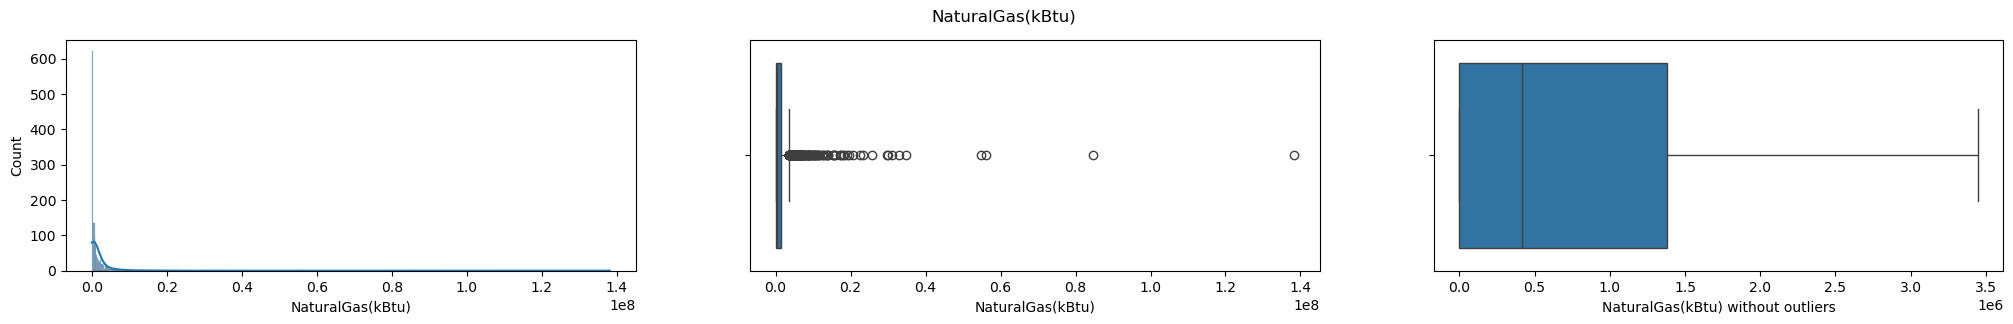

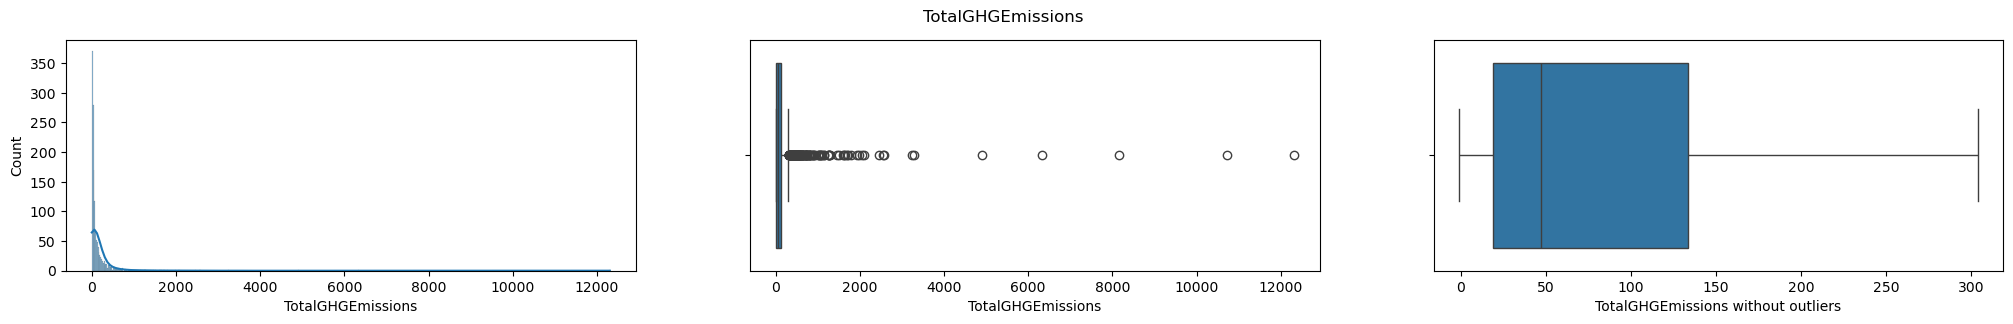

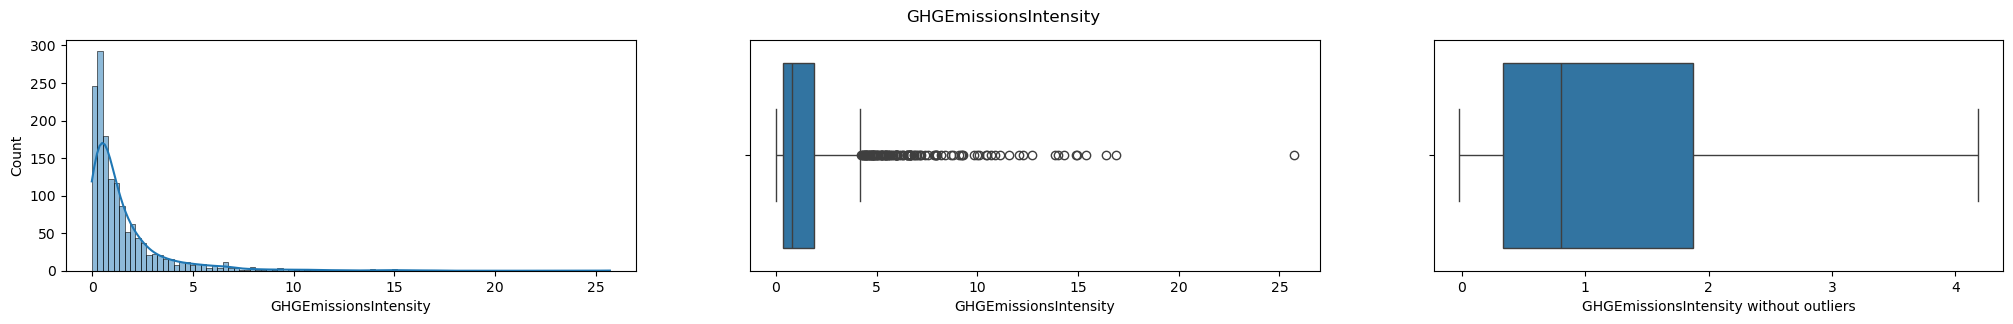

In [31]:
for variable in quant_variables:
  if variable != 'DefaultData' and variable != 'OSEBuildingID':
  
    fig, axes = plt.subplots(1, 3, figsize=(25, 3))
    fig.suptitle(variable)

    sns.histplot(ax=axes[0], x=variable, data=df, kde=True)
    sns.boxplot(ax=axes[1], x=variable, data=df)
    sns.boxplot(ax=axes[2], x=variable, data=df, showfliers = False)
    plt.xlabel(f"{variable} without outliers")

# Bivariate analyses

<Axes: title={'center': 'Correlation matrix'}>

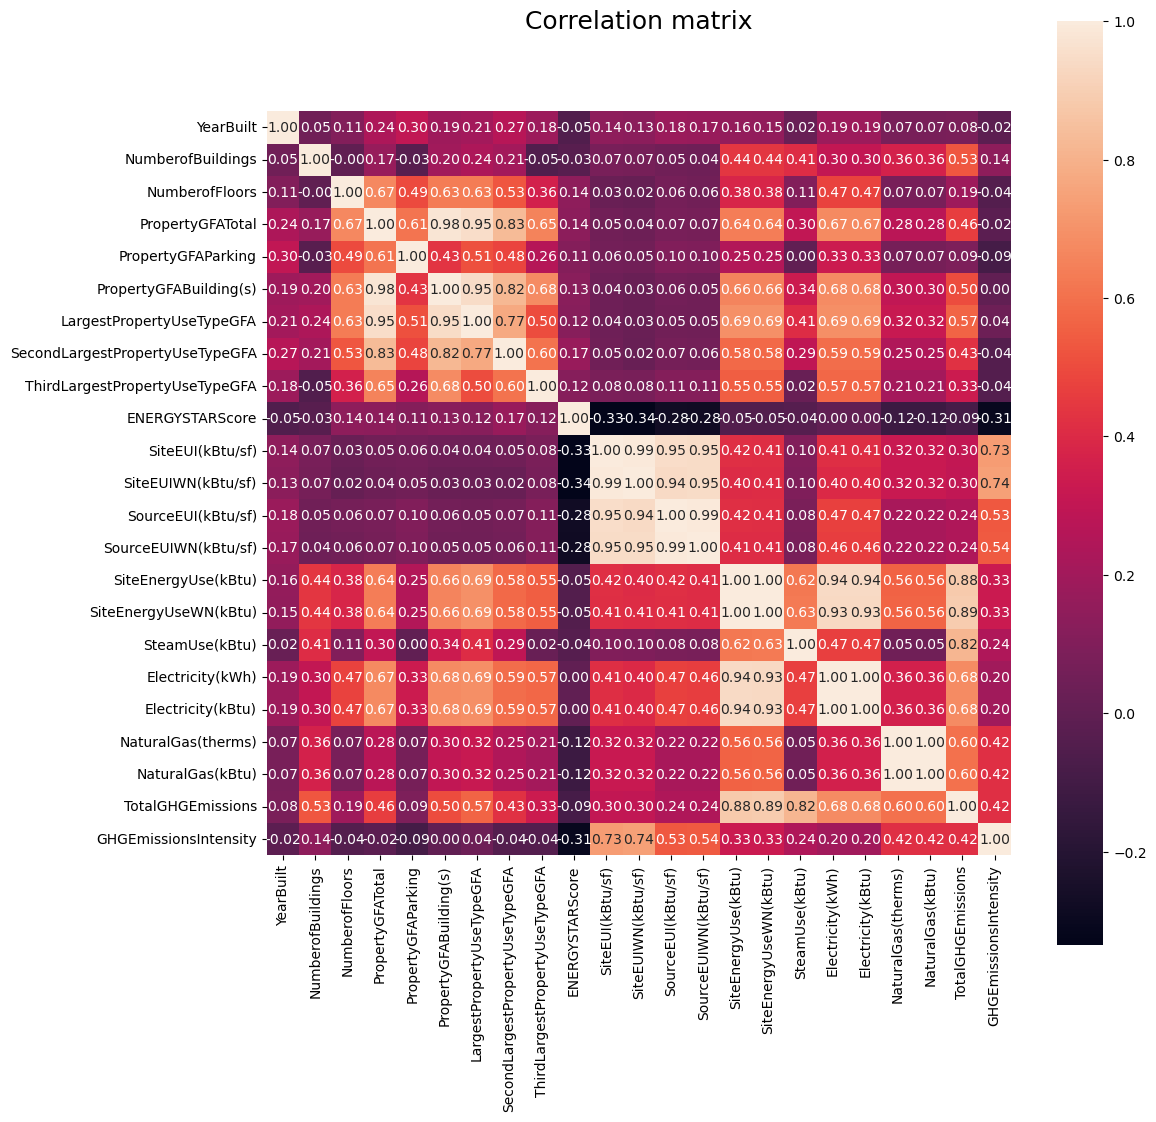

In [32]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title('Correlation matrix', fontdict={'fontsize':18}, x=0.5,y=1.1)
sns.heatmap(df[quant_variables].corr(), annot=True, fmt=".2f", square=True, ax=ax)

In [33]:
df.columns

Index(['OSEBuildingID', 'PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [34]:
qual_variables = [
'PrimaryPropertyType', 
'Neighborhood',
'LargestPropertyUseType', 
'SecondLargestPropertyUseType', 
'ThirdLargestPropertyUseType' 
]

In [35]:
def anova(x,y):
    modalites = df[x].unique()
    groups = []
    for m in modalites:
        groups.append(df[df[x]==m][y])

    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}
        
    plt.boxplot(groups, labels=modalites, showfliers=False, medianprops=medianprops, 
                vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.title(f'{x}, {y}')
    plt.figure(figsize=(13,13))
    plt.show()

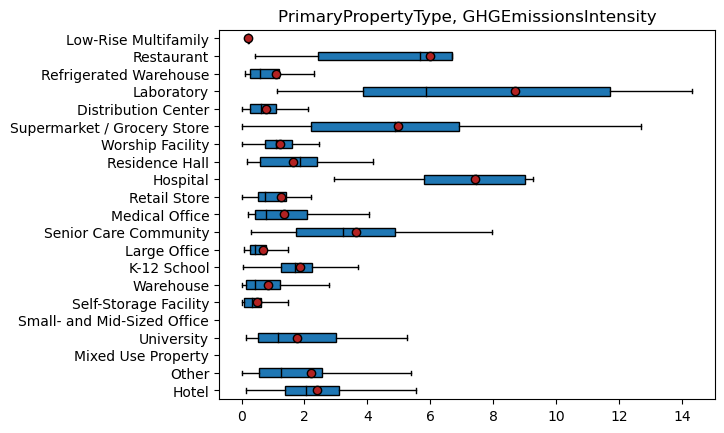

<Figure size 1300x1300 with 0 Axes>

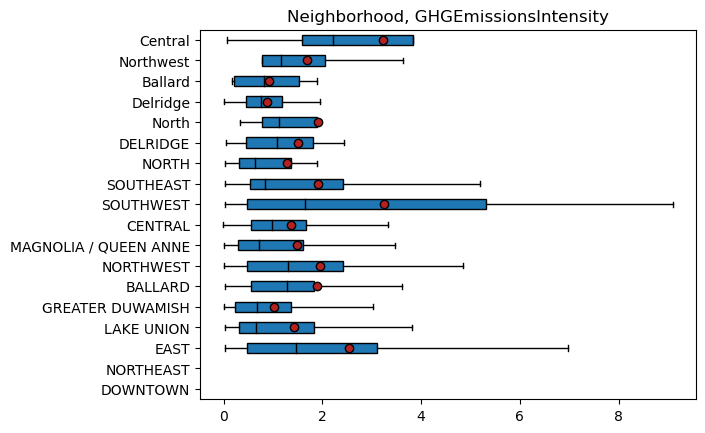

<Figure size 1300x1300 with 0 Axes>

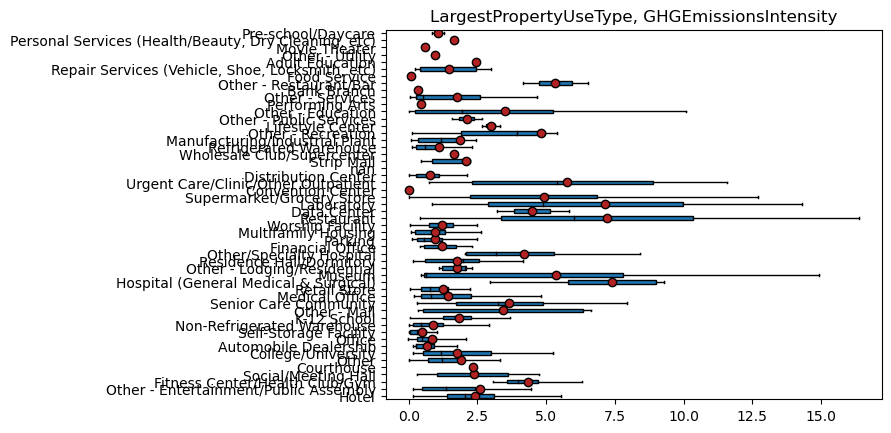

<Figure size 1300x1300 with 0 Axes>

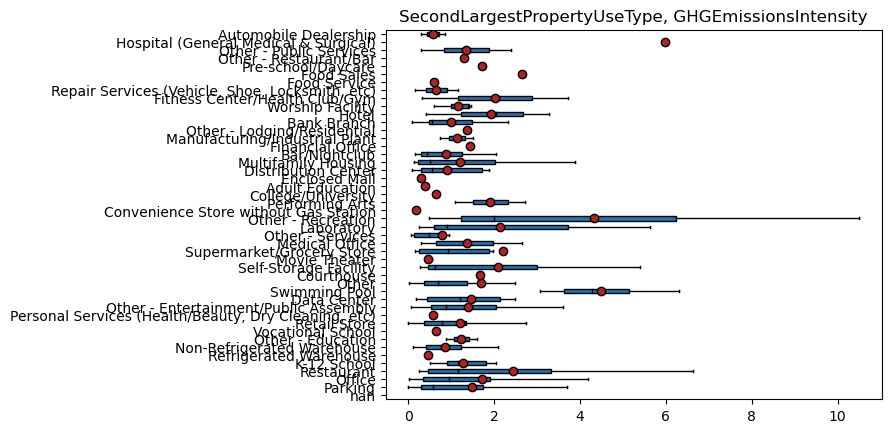

<Figure size 1300x1300 with 0 Axes>

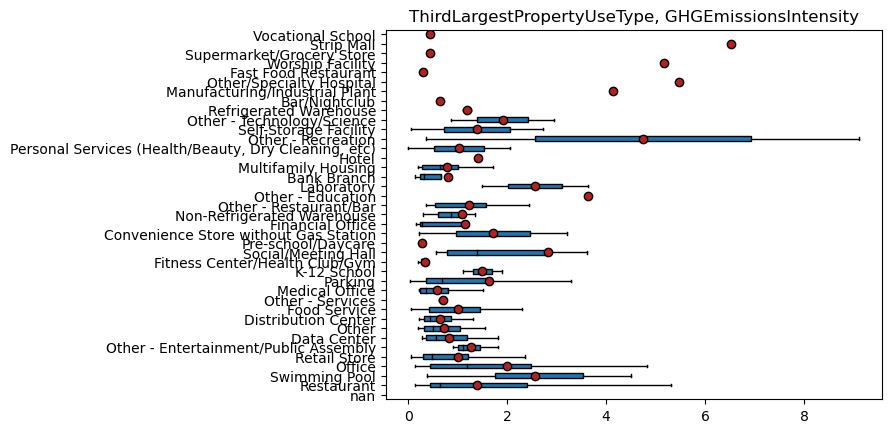

<Figure size 1300x1300 with 0 Axes>

In [36]:
for x in qual_variables:
    anova(x, 'GHGEmissionsIntensity')

# Missing values

In [37]:
for variable in df.columns:
    completion(df, variable)

Completion of variable 'OSEBuildingID': 100.0%
Completion of variable 'PrimaryPropertyType': 100.0%
Completion of variable 'Neighborhood': 100.0%
Completion of variable 'YearBuilt': 100.0%
Completion of variable 'NumberofBuildings': 99.86%
Completion of variable 'NumberofFloors': 100.0%
Completion of variable 'PropertyGFATotal': 100.0%
Completion of variable 'PropertyGFAParking': 100.0%
Completion of variable 'PropertyGFABuilding(s)': 100.0%
Completion of variable 'LargestPropertyUseType': 99.59%
Completion of variable 'LargestPropertyUseTypeGFA': 99.59%
Completion of variable 'SecondLargestPropertyUseType': 54.52%
Completion of variable 'SecondLargestPropertyUseTypeGFA': 54.52%
Completion of variable 'ThirdLargestPropertyUseType': 21.58%
Completion of variable 'ThirdLargestPropertyUseTypeGFA': 21.58%
Completion of variable 'ENERGYSTARScore': 68.15%
Completion of variable 'SiteEUI(kBtu/sf)': 99.79%
Completion of variable 'SiteEUIWN(kBtu/sf)': 99.79%
Completion of variable 'SourceEUI(kB

In [38]:
missing_values(df)

NumberofBuildings                     2
LargestPropertyUseType                6
LargestPropertyUseTypeGFA             6
SecondLargestPropertyUseType        664
SecondLargestPropertyUseTypeGFA     664
ThirdLargestPropertyUseType        1145
ThirdLargestPropertyUseTypeGFA     1145
ENERGYSTARScore                     465
SiteEUI(kBtu/sf)                      3
SiteEUIWN(kBtu/sf)                    3
SourceEUI(kBtu/sf)                    2
SourceEUIWN(kBtu/sf)                  2
SiteEnergyUse(kBtu)                   2
SiteEnergyUseWN(kBtu)                 3
SteamUse(kBtu)                        2
Electricity(kWh)                      2
Electricity(kBtu)                     2
NaturalGas(therms)                    2
NaturalGas(kBtu)                      2
TotalGHGEmissions                     2
GHGEmissionsIntensity                 2
dtype: int64

In [39]:
mask = (df['LargestPropertyUseType'].isna())
df.loc[mask, :]

OSEBuildingID          PrimaryPropertyType Neighborhood  YearBuilt  \
353             496        Self-Storage Facility      BALLARD       1946   
578             773  Small- and Mid-Sized Office     DOWNTOWN       1924   
1147          21103                        Hotel     DOWNTOWN       1910   
2414          25568  Small- and Mid-Sized Office   LAKE UNION       2008   
2459          25711                   Restaurant     DOWNTOWN       1913   
2670          26532           Mixed Use Property    NORTHEAST       1928   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
353                 2.0               2            111445                   0   
578                 NaN               4             63150                   0   
1147                1.0               8             61721                   0   
2414                1.0               4             48350                   0   
2459                1.0               3             28800                   0   
2670                NaN               2             20760                   0   

      PropertyGFABuilding(s) LargestPropertyUseType  ...  \
353                   111445                    NaN  ...   
578                    63150                    NaN  ...   
1147                   61721                    NaN  ...   
2414                   48350                    NaN  ...   
2459                   28800                    NaN  ...   
2670                   20760                    NaN  ...   

      SourceEUIWN(kBtu/sf) SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
353             106.400002        5.697472e+06           6.076957e+06   
578                    NaN                 NaN                    NaN   
1147            154.399994        2.897080e+06           2.968430e+06   
2414            234.600006        3.168131e+06           3.280956e+06   
2459             62.799999        8.999242e+05           9.358332e+05   
2670                   NaN                 NaN                    NaN   

     SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
353             0.0       881452.0000          3007514.0        26899.582030   
578             NaN               NaN                NaN                 NaN   
1147            0.0       742846.3750          2534592.0         3624.875244   
2414            0.0       928526.0000          3168131.0            0.000000   
2459            0.0       118085.2969           402907.0         4970.169922   
2670            NaN               NaN                NaN                 NaN   

      NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  
353          2689958.0             163.83                   1.47  
578                NaN                NaN                    NaN  
1147          362488.0              36.92                   0.60  
2414               0.0              22.09                   0.46  
2459          497017.0              29.21                   1.01  
2670               NaN                NaN                    NaN  

[6 rows x 29 columns]

In [40]:
df.dropna(subset=['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'LargestPropertyUseType'], inplace=True)

In [41]:
missing_values(df)

SecondLargestPropertyUseType        658
SecondLargestPropertyUseTypeGFA     658
ThirdLargestPropertyUseType        1137
ThirdLargestPropertyUseTypeGFA     1137
ENERGYSTARScore                     460
dtype: int64

In [42]:
df.fillna(value = {
    'SecondLargestPropertyUseType': '',
    'SecondLargestPropertyUseTypeGFA': 0,
    'ThirdLargestPropertyUseType': '',
    'ThirdLargestPropertyUseTypeGFA': 0,
    'ENERGYSTARScore': 0
}, inplace=True)

In [43]:
missing_values(df)

Series([], dtype: int64)

# Variable transformations

### First try : Split by Floor and Number of Buildings

In [44]:
df.columns

Index(['OSEBuildingID', 'PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [45]:
df['TotalPropertyGFABuilding(s)'] = df['PropertyGFABuilding(s)'] * df['NumberofBuildings'] * df['NumberofFloors']

for variable in ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']:
    df[f'{variable}_byTotalGFA'] = df[variable]/df['TotalPropertyGFABuilding(s)']

In [46]:
quant_variables = [

    'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
    
    'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'TotalPropertyGFABuilding(s)',
    
    'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
    
    'ENERGYSTARScore',
    
    'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SiteEnergyUse(kBtu)_byTotalGFA',
    
    'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',

    'SteamUse(kBtu)', 'SteamUse(kBtu)_byTotalGFA',
    
    'Electricity(kWh)', 'Electricity(kBtu)', 'Electricity(kBtu)_byTotalGFA',
    
    'NaturalGas(therms)', 'NaturalGas(kBtu)', 'NaturalGas(kBtu)_byTotalGFA',
    
    'TotalGHGEmissions', 'GHGEmissionsIntensity', 'TotalGHGEmissions_byTotalGFA',

]

<Axes: title={'center': 'Correlation matrix'}>

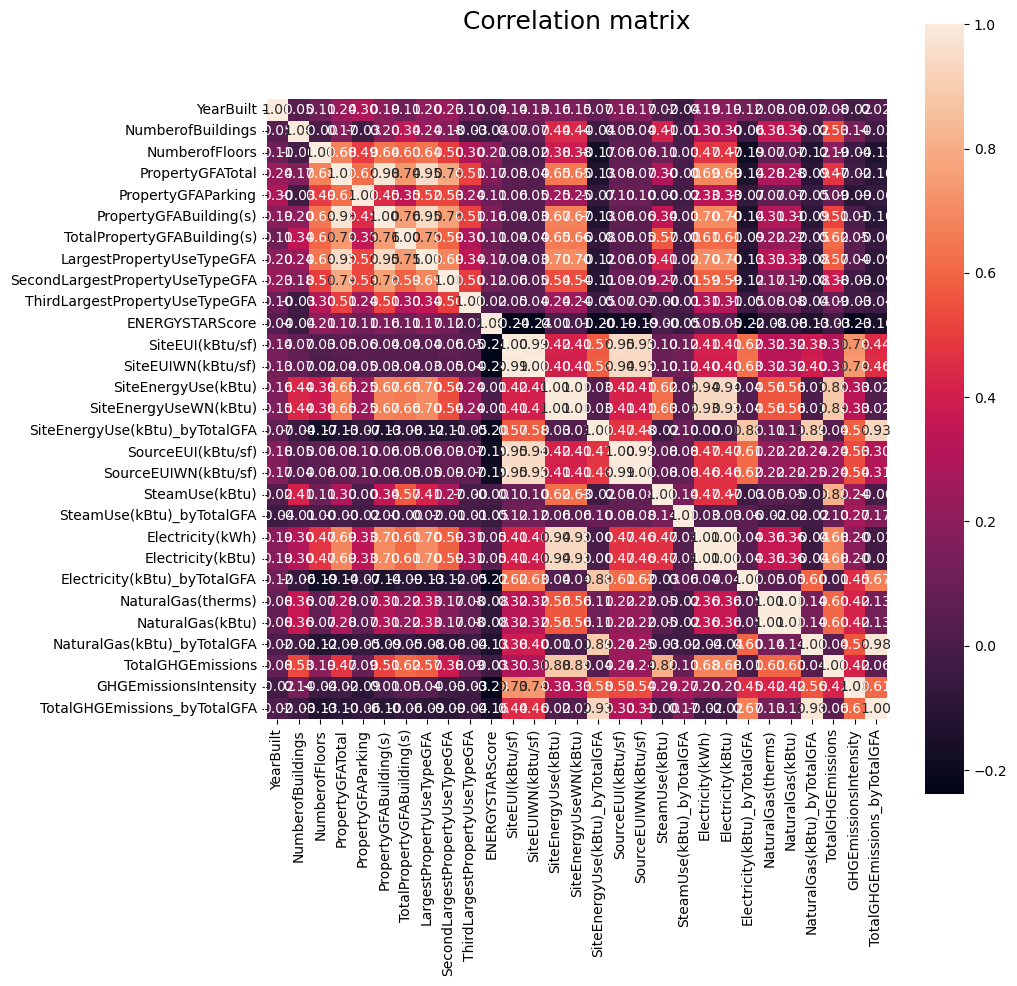

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Correlation matrix', fontdict={'fontsize':18}, x=0.5,y=1.1)
sns.heatmap(df[quant_variables].corr(), annot=True, fmt=".2f", square=True, ax=ax)

/tmp/ipykernel_10276/3320171705.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 3, figsize=(25, 3))


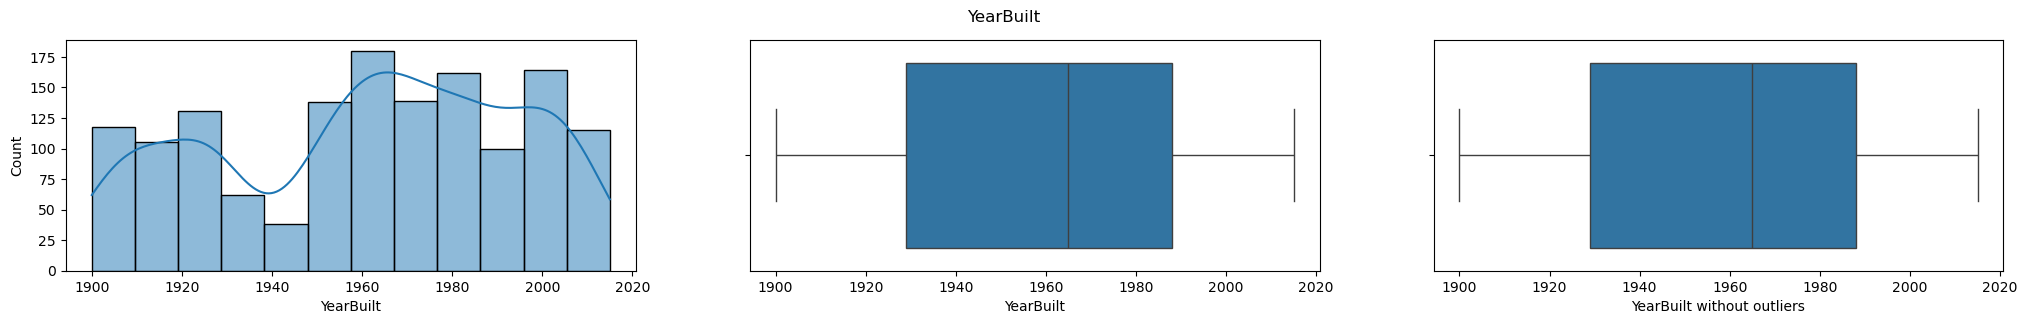

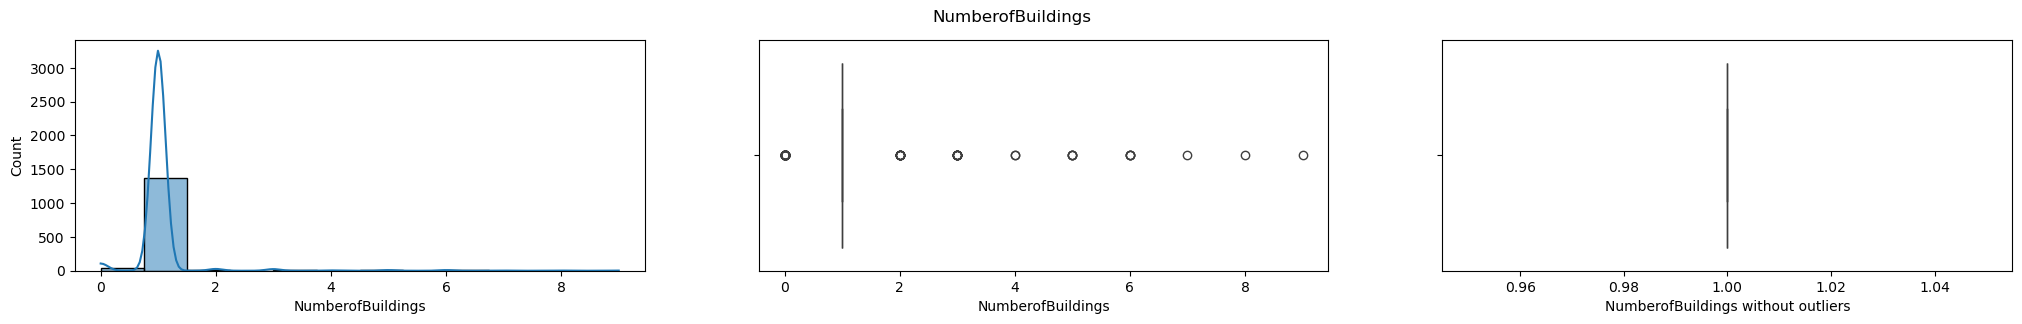

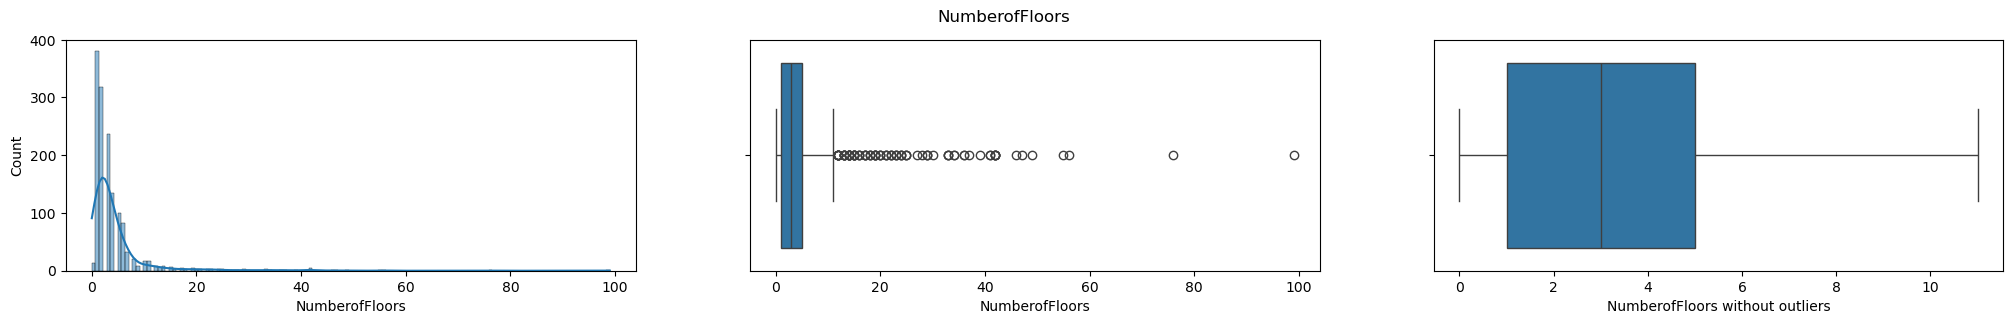

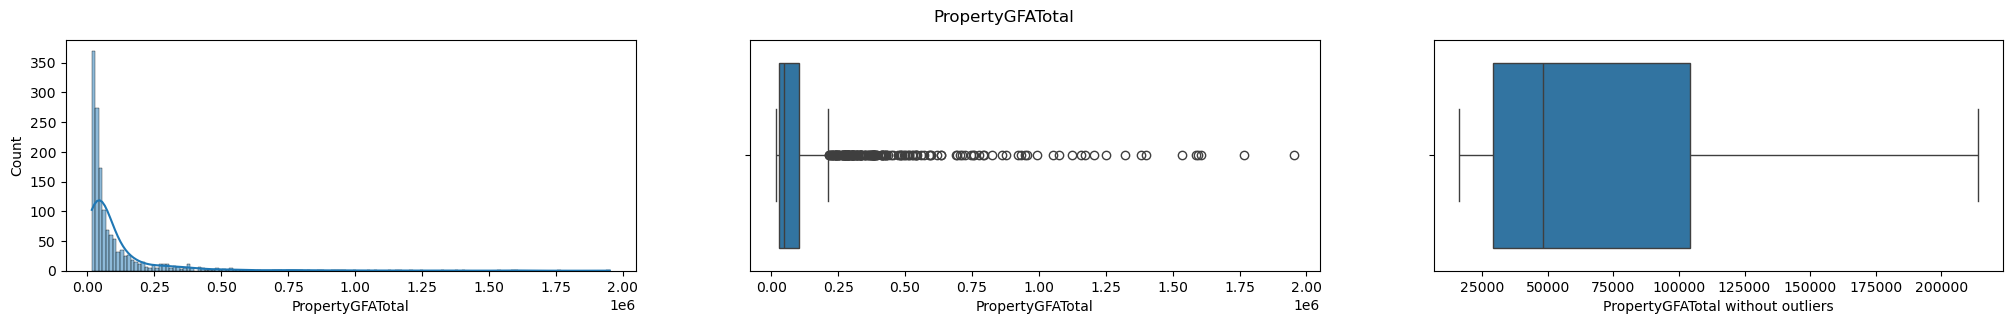

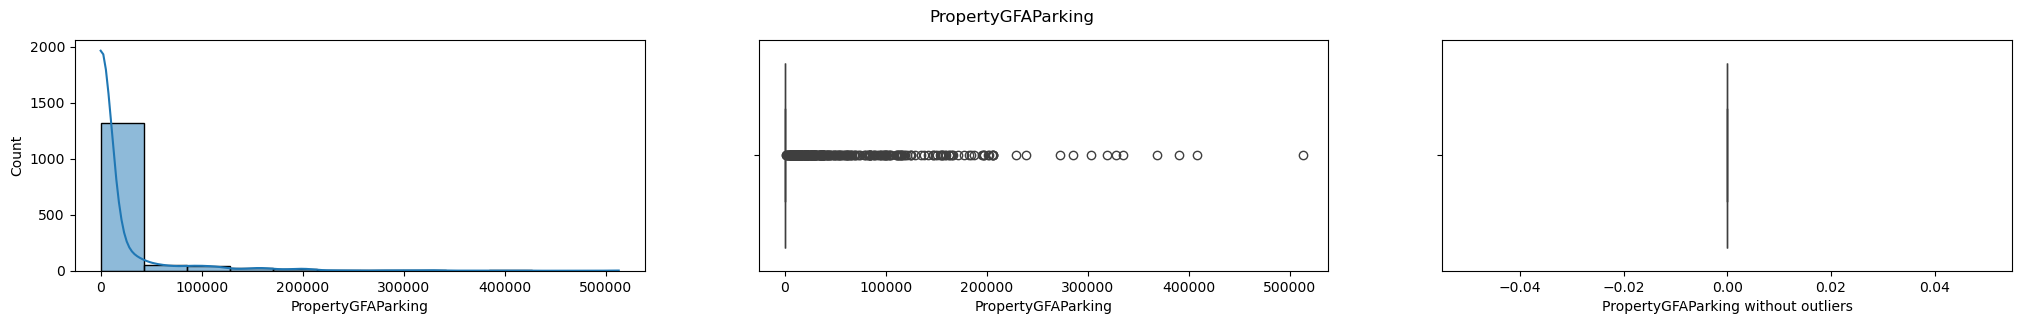

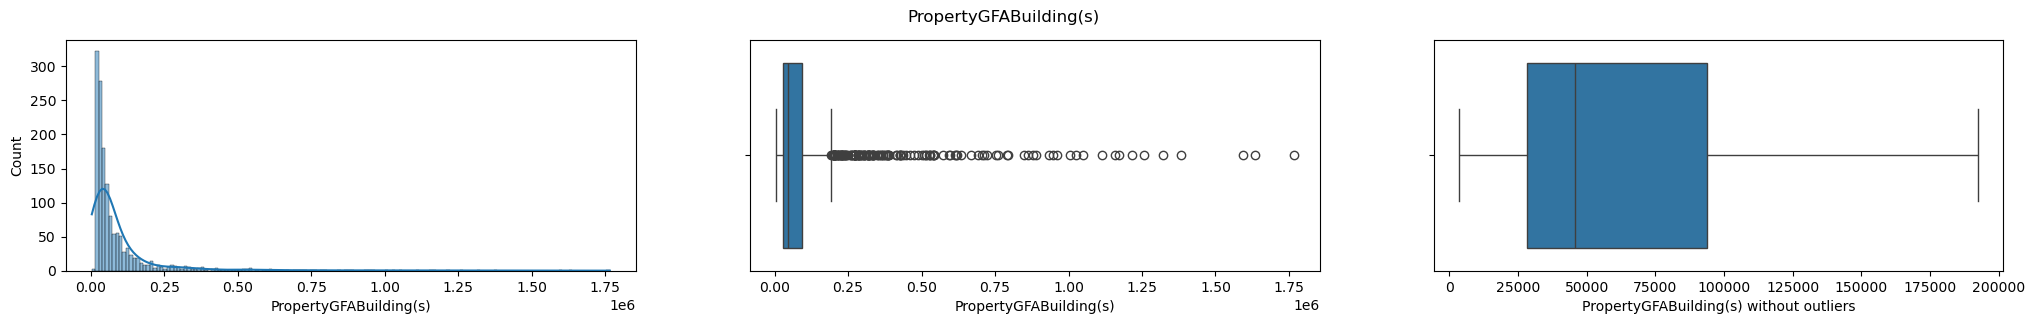

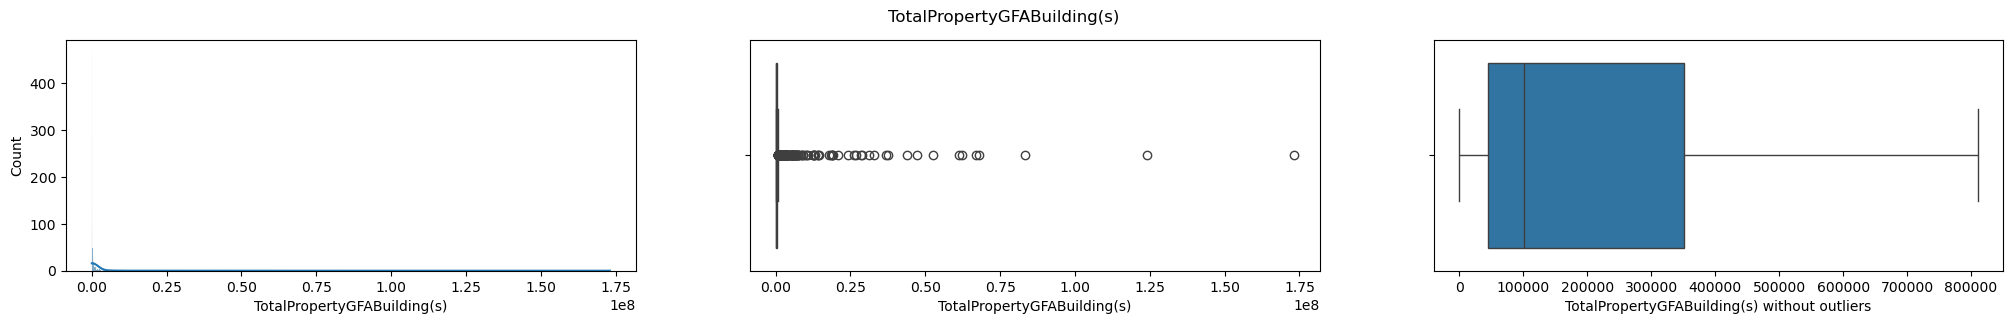

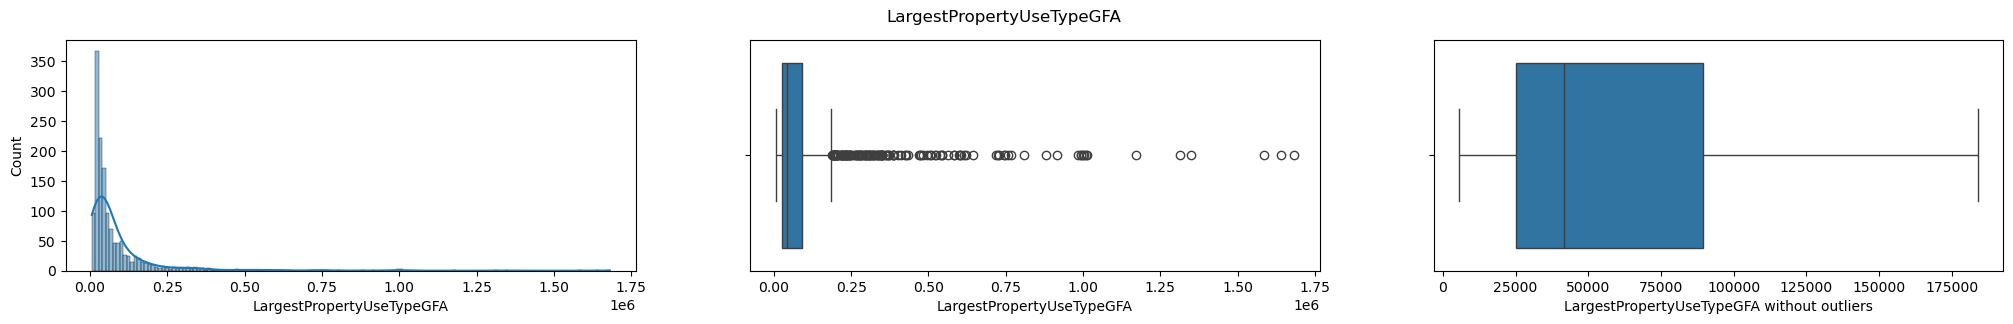

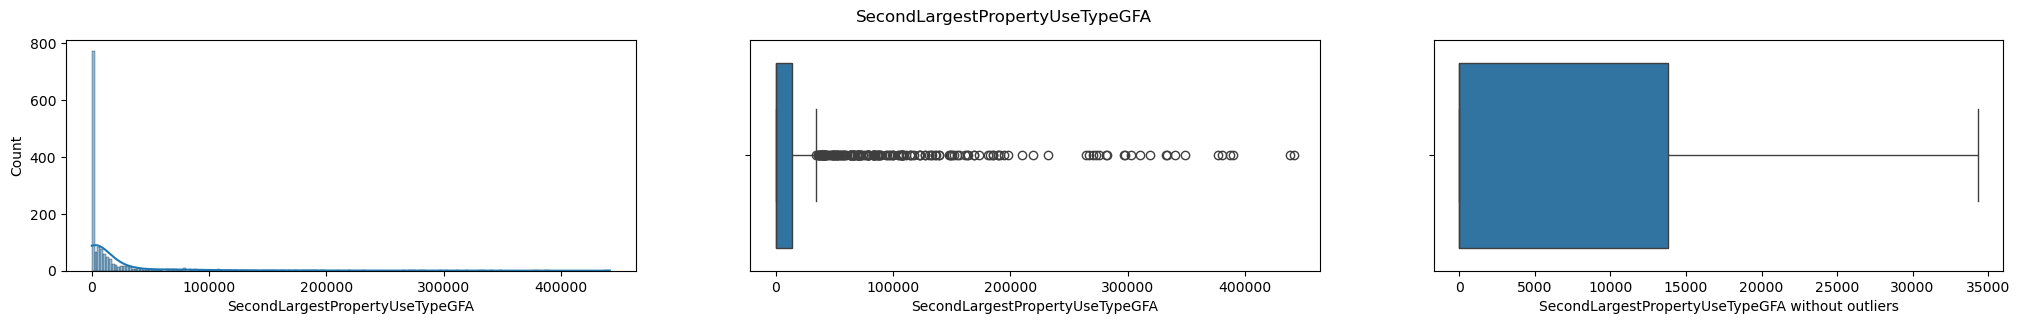

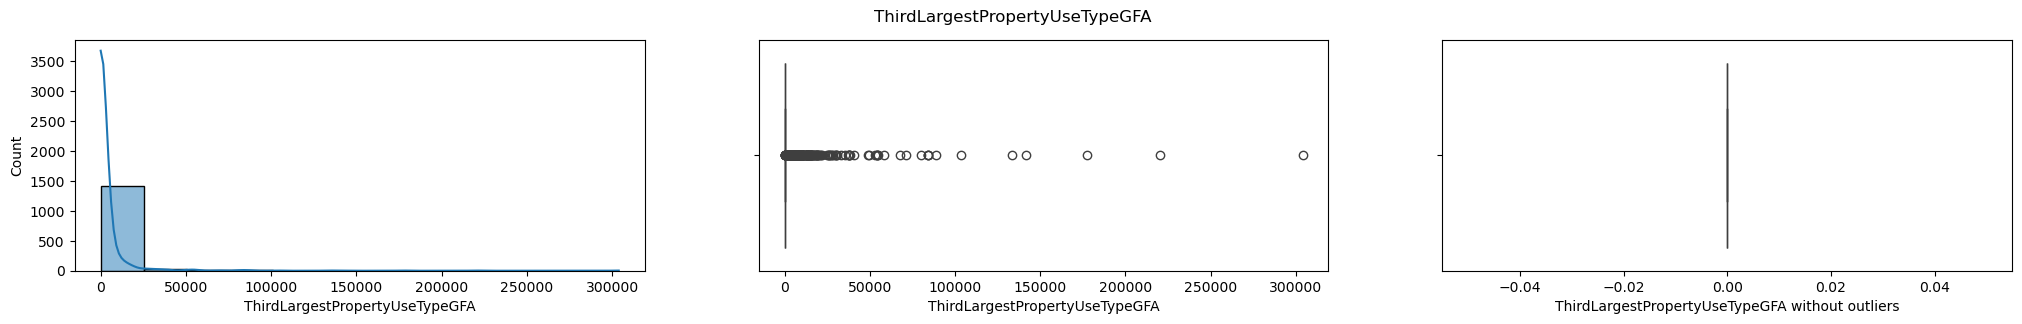

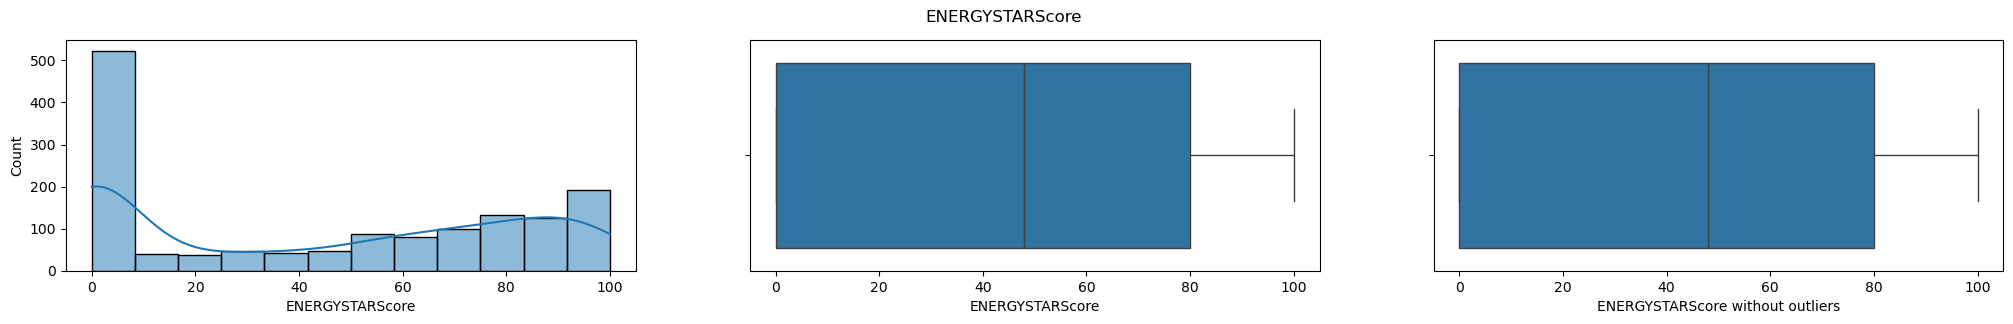

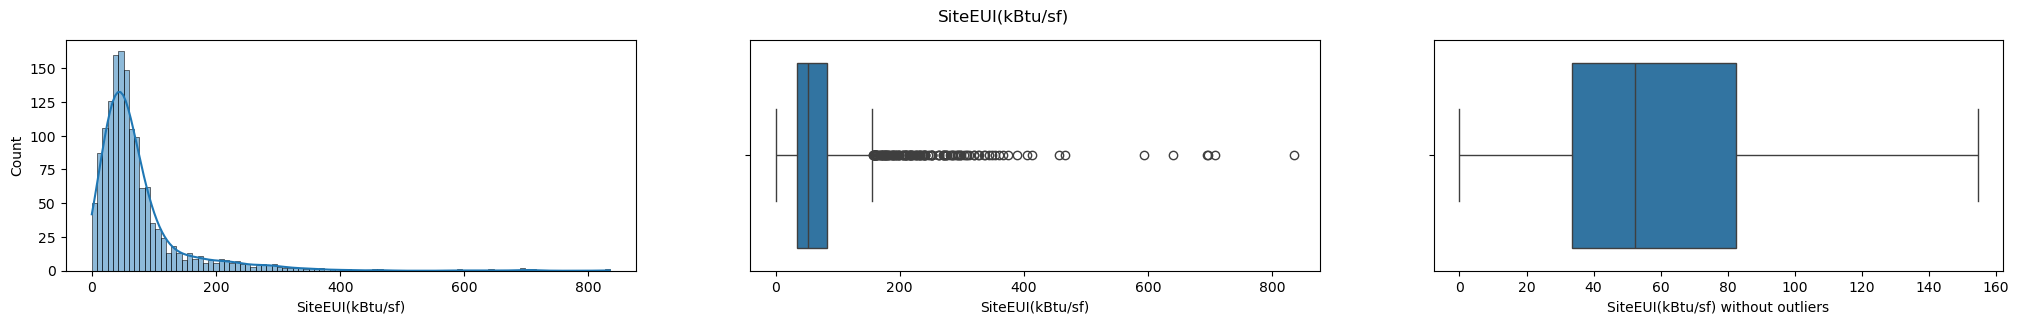

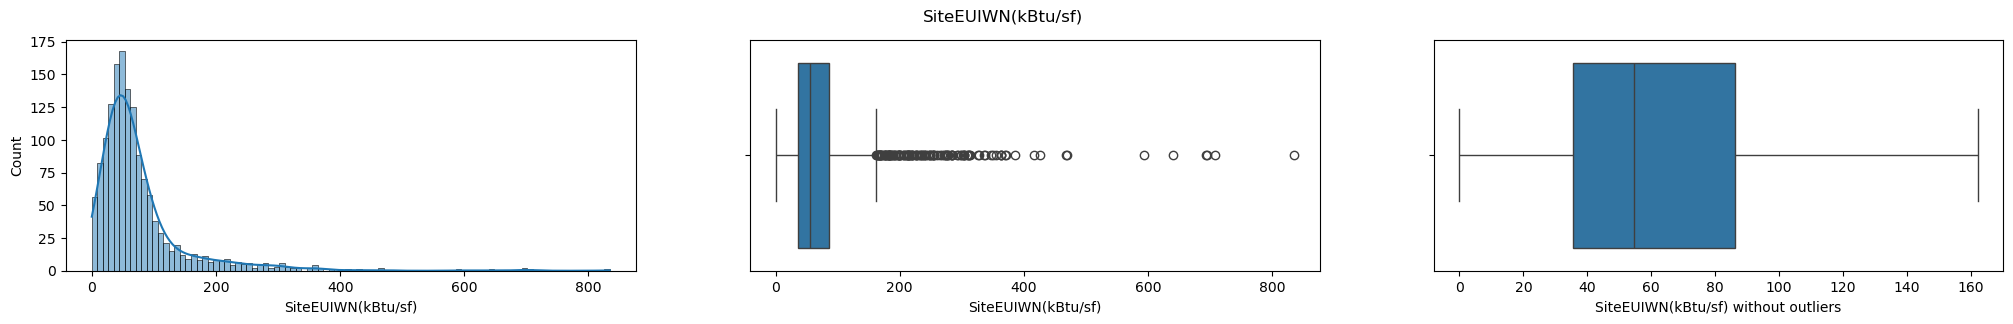

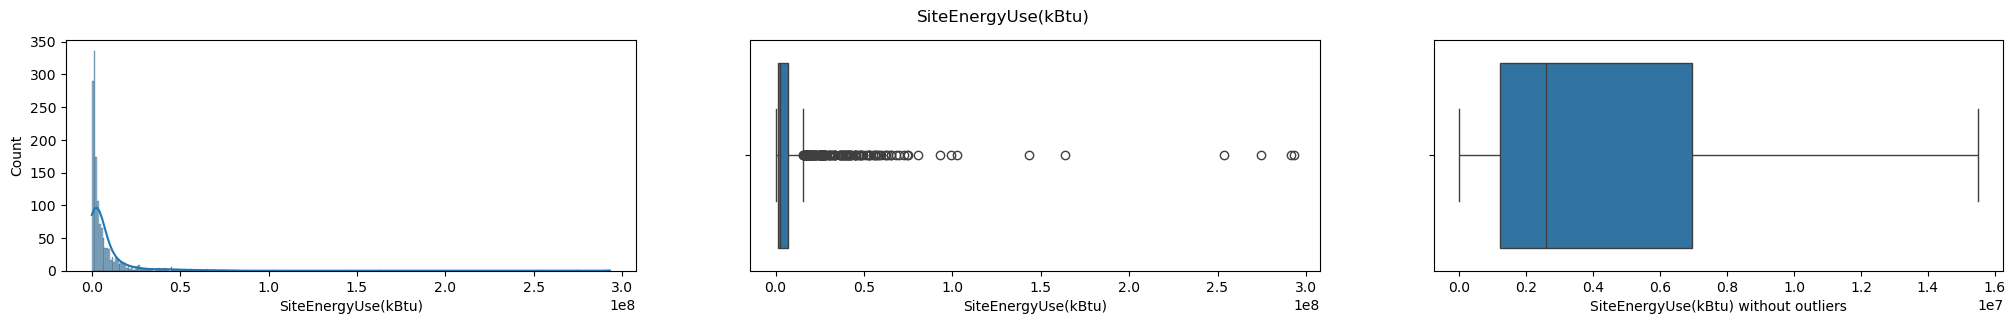

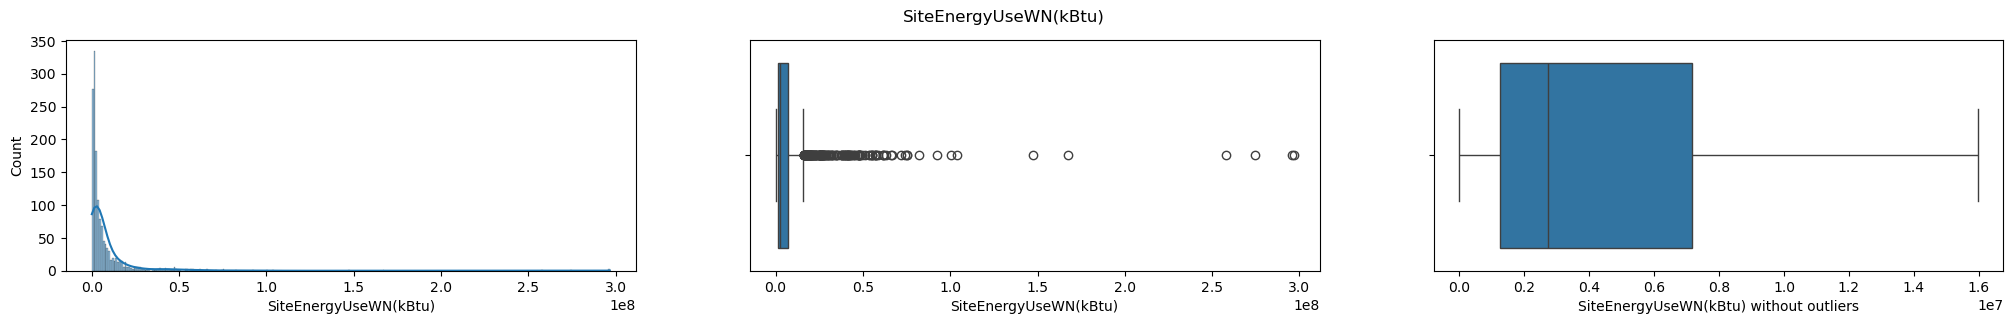

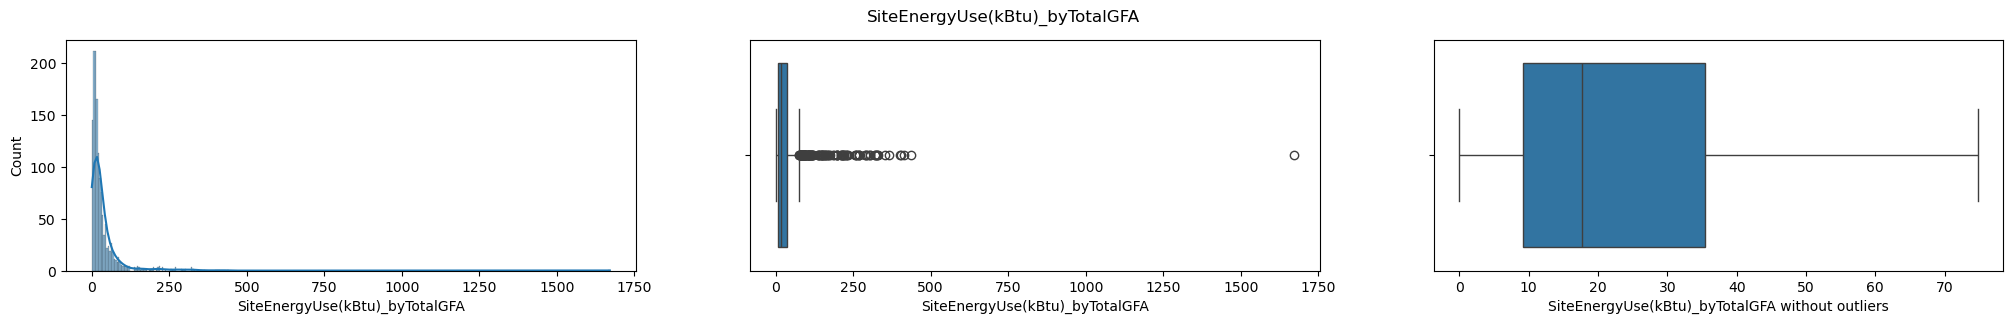

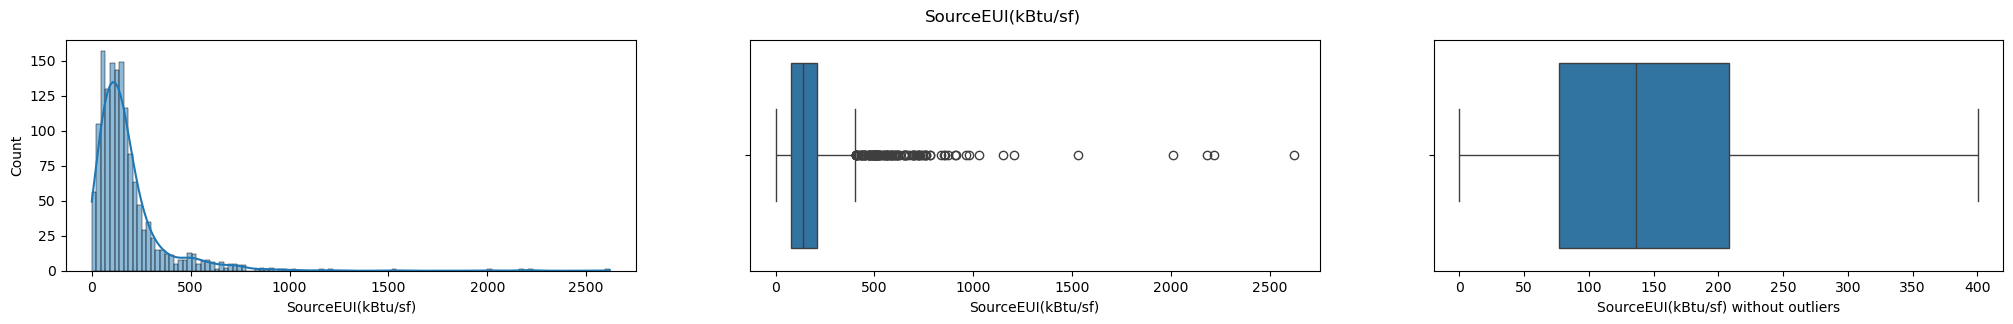

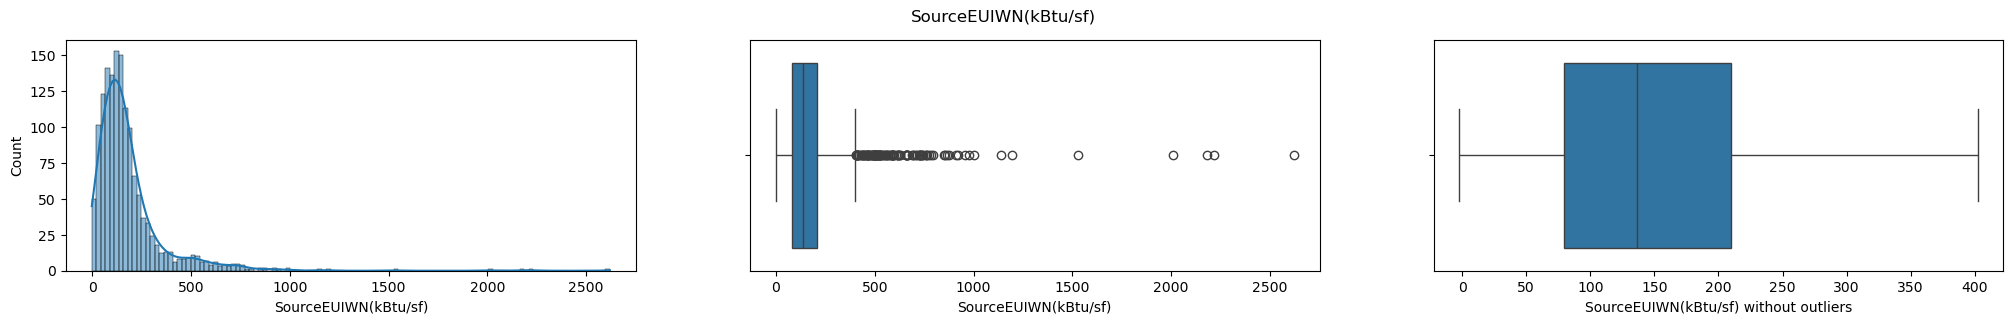

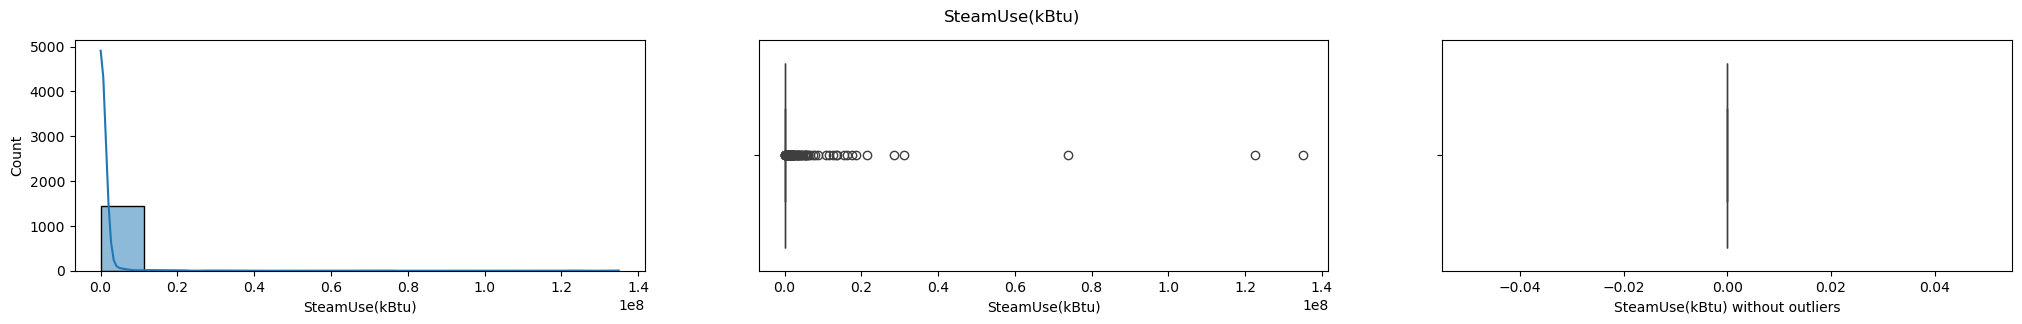

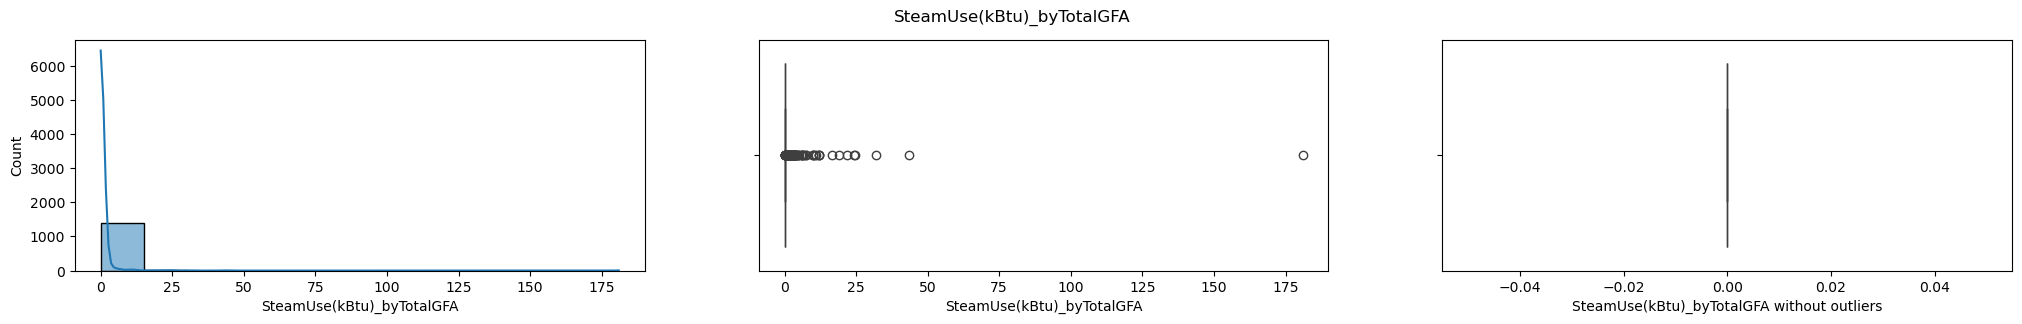

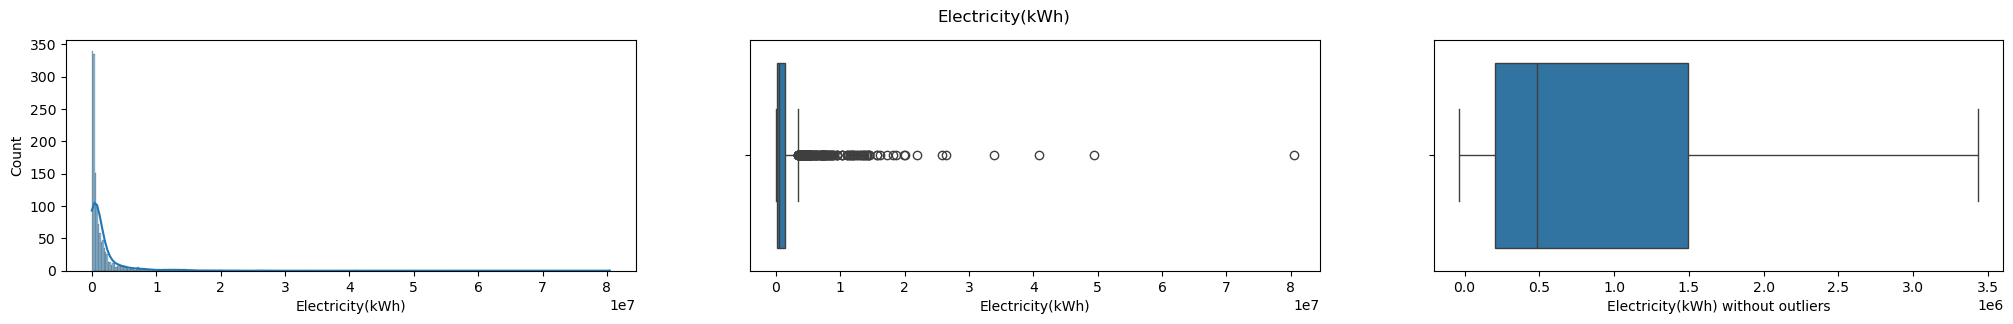

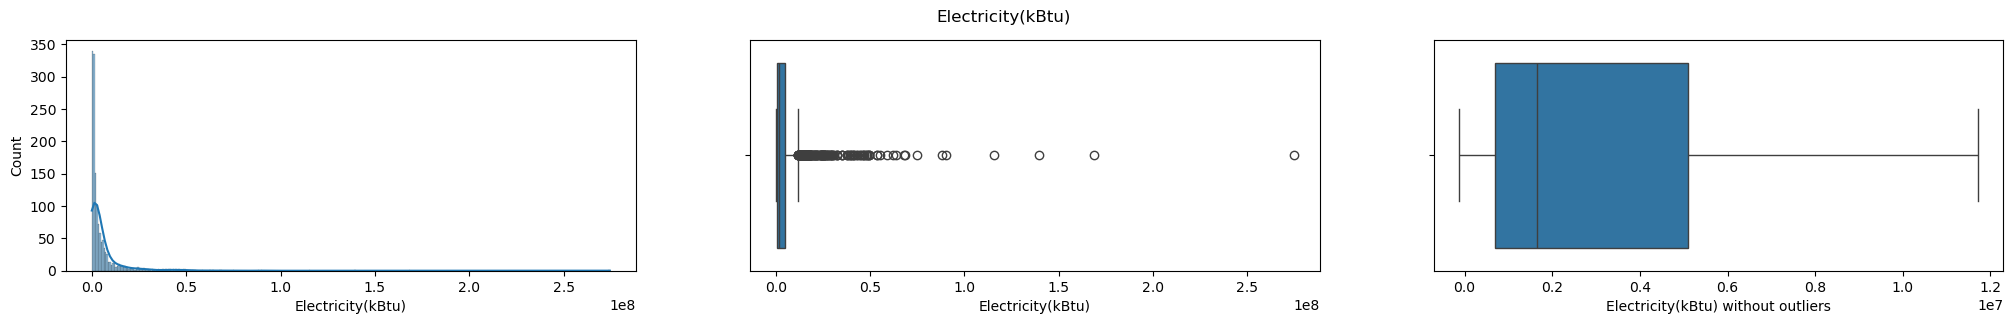

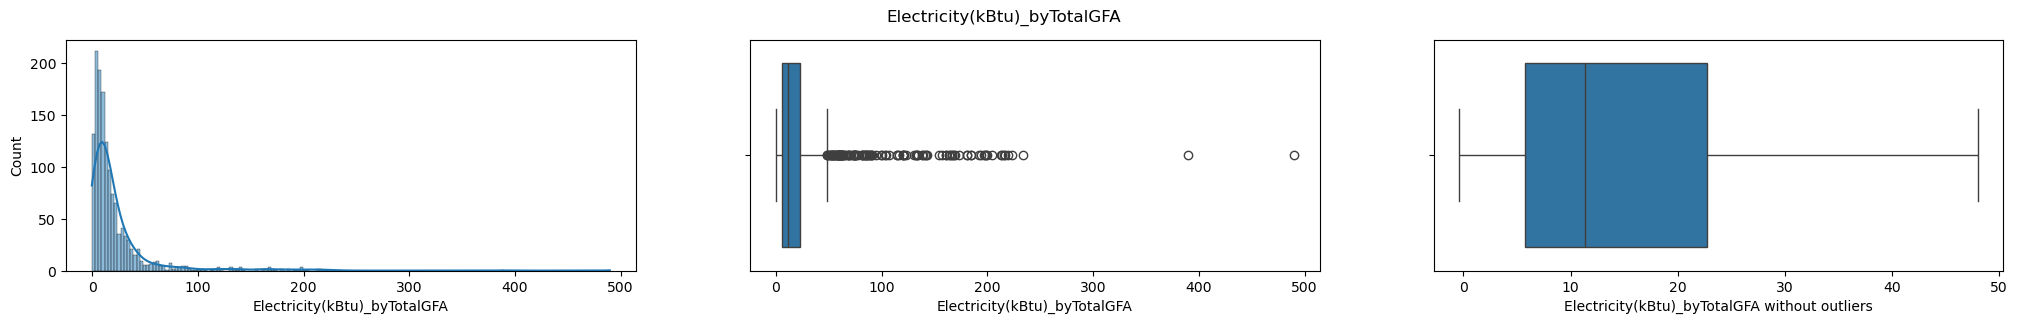

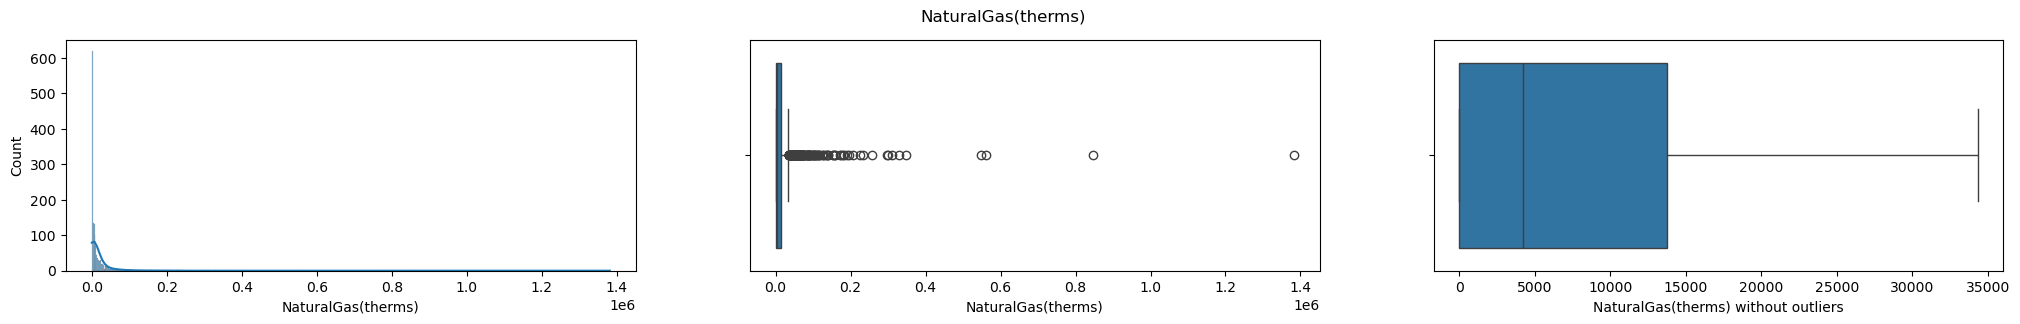

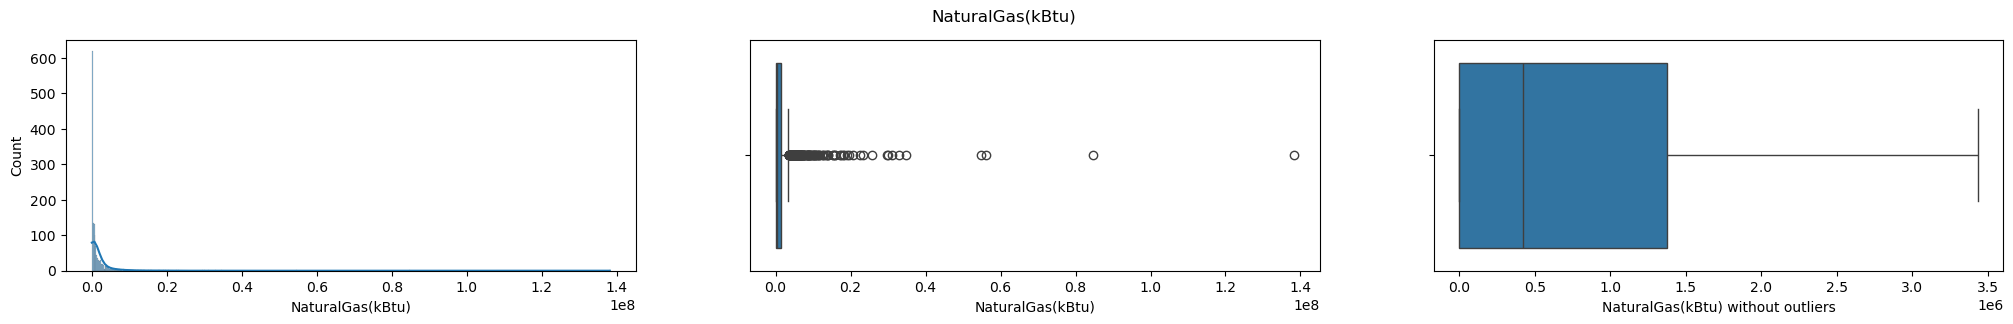

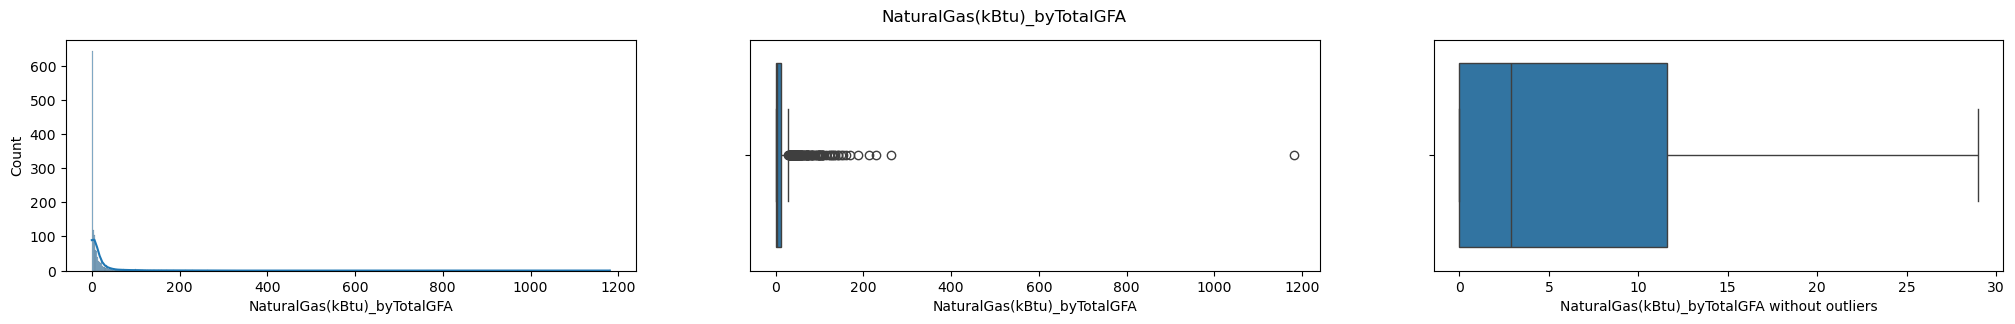

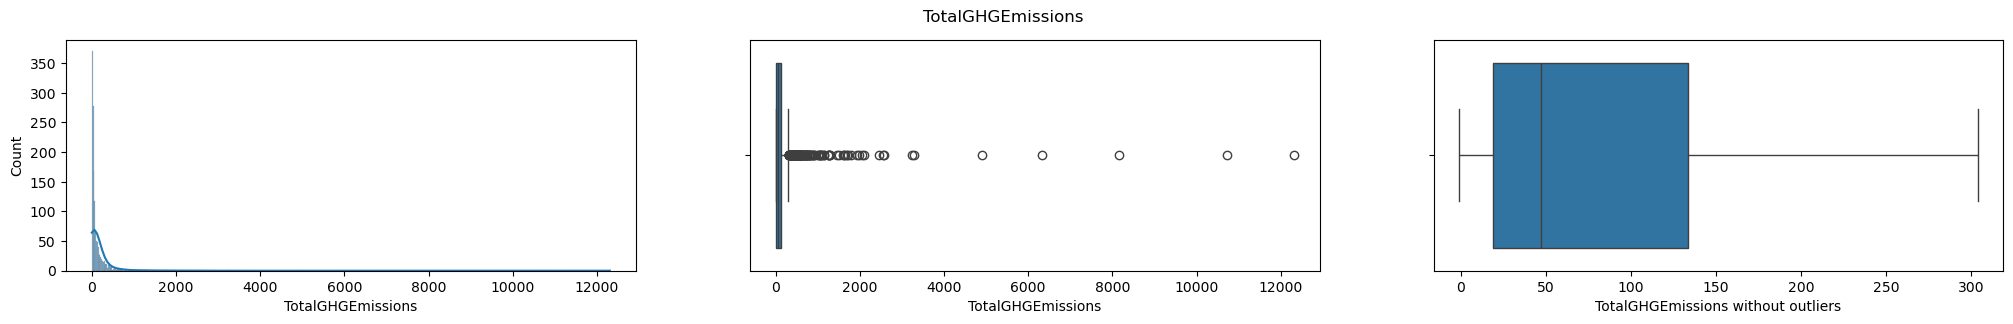

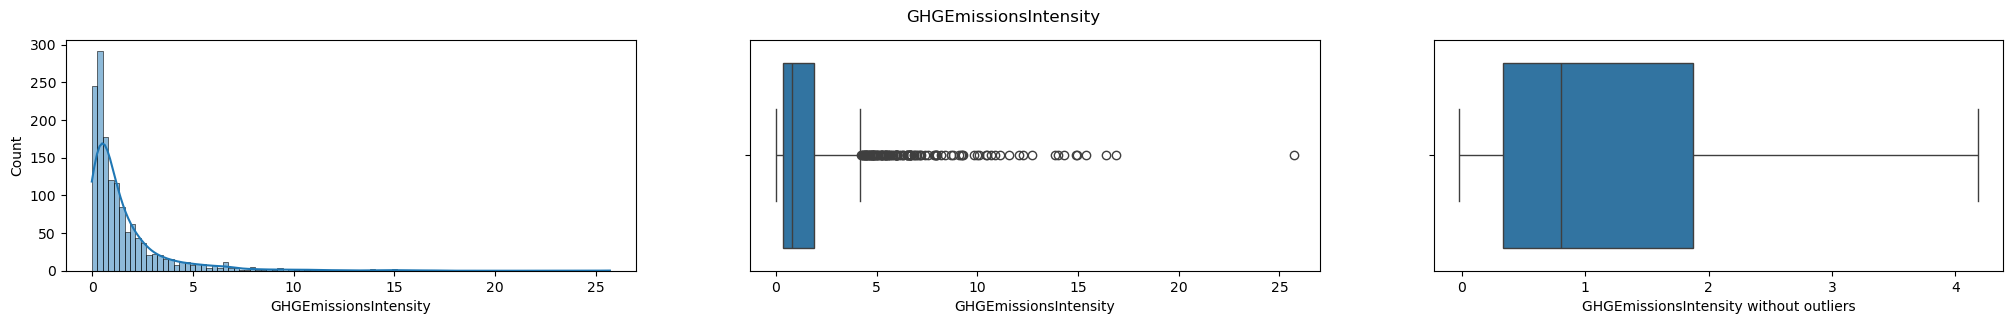

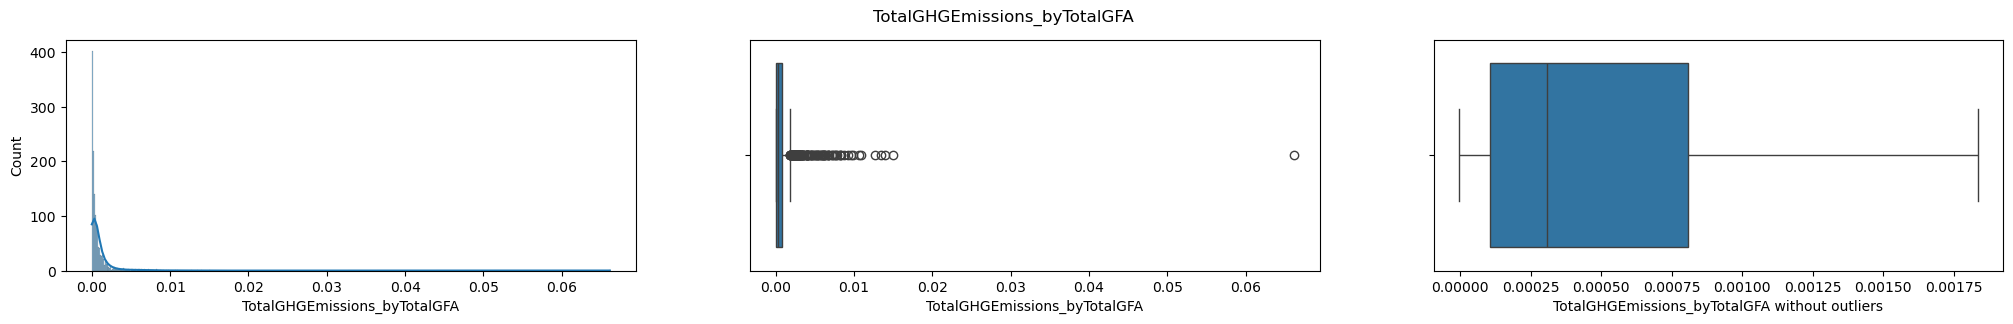

In [48]:
for variable in quant_variables:
  
  fig, axes = plt.subplots(1, 3, figsize=(25, 3))
  fig.suptitle(variable)

  sns.histplot(ax=axes[0], x=variable, data=df, kde=True)
  sns.boxplot(ax=axes[1], x=variable, data=df)
  sns.boxplot(ax=axes[2], x=variable, data=df, showfliers = False)
  plt.xlabel(f"{variable} without outliers")

In [49]:
vars_to_delete = [
    'PropertyGFATotal', 'PropertyGFABuilding(s)', 'TotalPropertyGFABuilding(s)',
    'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SiteEnergyUse(kBtu)_byTotalGFA', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
    'Electricity(kWh)', 'Electricity(kBtu)_byTotalGFA',
    'NaturalGas(therms)', 'NaturalGas(kBtu)_byTotalGFA',
    'SteamUse(kBtu)_byTotalGFA',
    'TotalGHGEmissions', 'TotalGHGEmissions_byTotalGFA'
]

df.drop(vars_to_delete, axis=1, inplace=True)

# ACP

In [50]:
quant_variables = [
    'YearBuilt',
    'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
    'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
    'ENERGYSTARScore',
    'SiteEUI(kBtu/sf)', 'SteamUse(kBtu)',
    'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity'
]

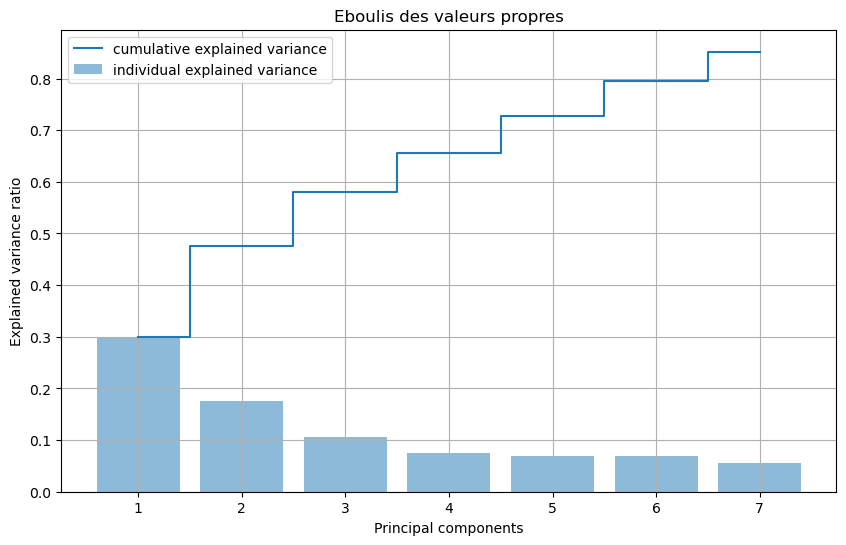

Component 1: 30.01% of explained variance
Component 2: 17.54% of explained variance
Component 3: 10.53% of explained variance
Component 4: 7.59% of explained variance
Component 5: 7.00% of explained variance
Component 6: 6.87% of explained variance
Component 7: 5.66% of explained variance


In [51]:
X = df[quant_variables].values

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

pca = decomposition.PCA(0.8)
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Eboulis des valeurs propres')
plt.legend(loc='best')
plt.grid()
plt.show()

for i, ev in enumerate(explained_variance, 1):
    print(f'Component {i}: {ev*100:.2f}% of explained variance')

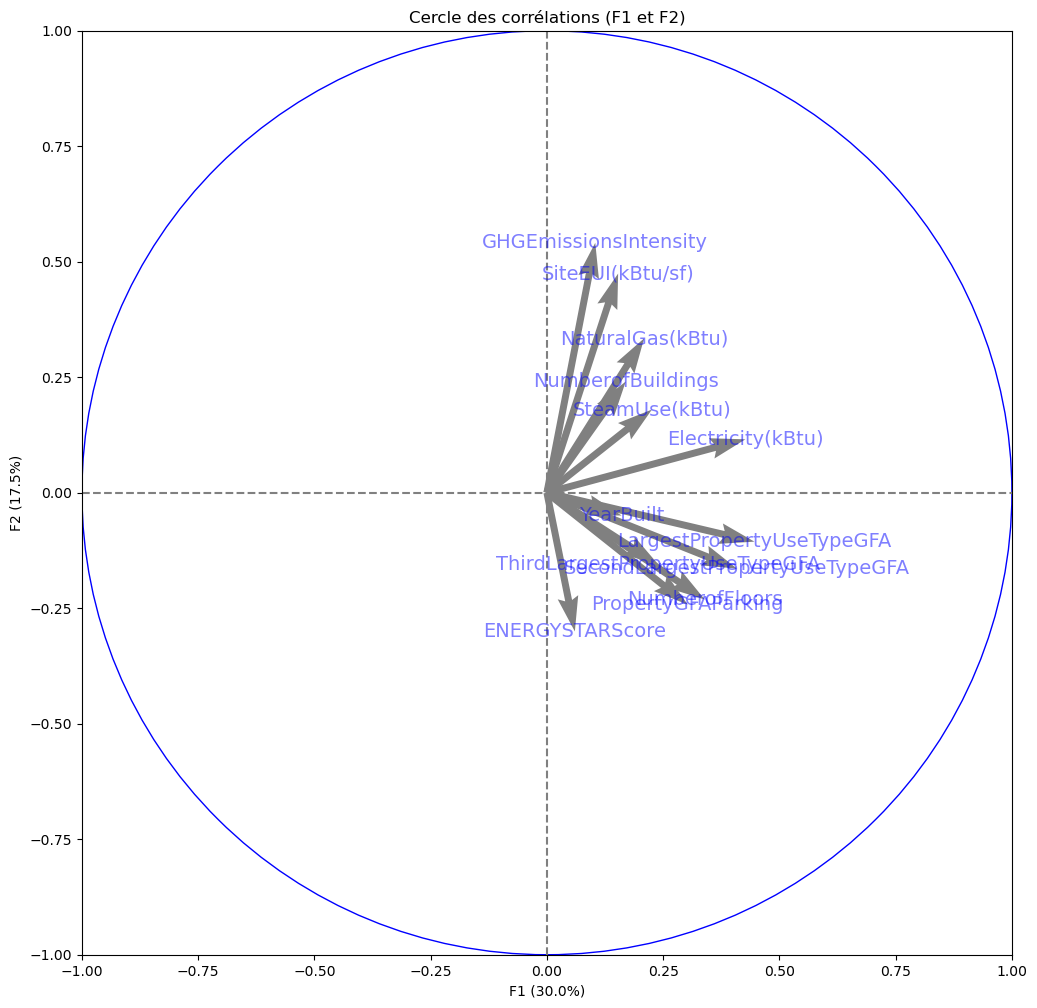

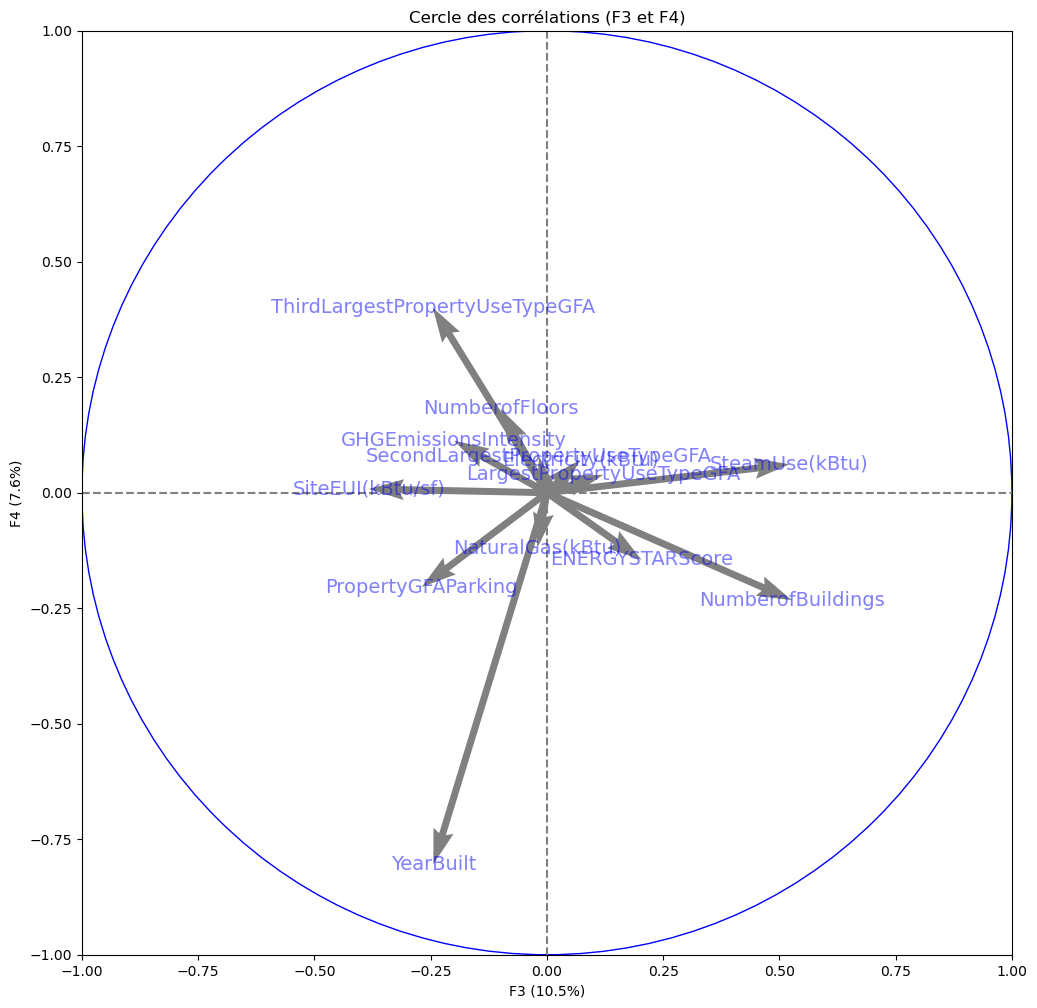

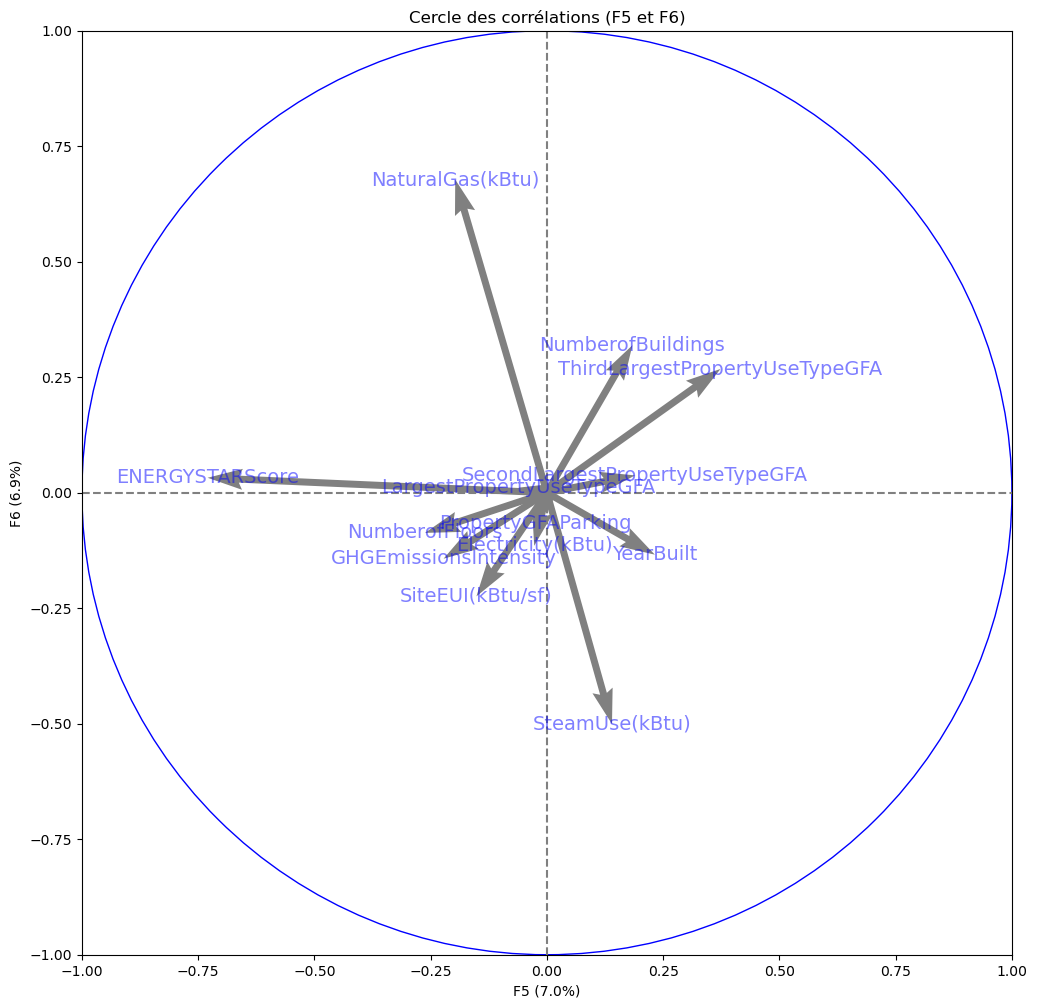

In [52]:
# Cercle des corrélations
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les plans factoriels spécifiés, ici [(0,1), (2,3), (4,5)]
        if d2 < n_comp:

            # Initialisation de la figure
            fig, ax = plt.subplots(figsize=(12,12))

            # Détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Affichage des flèches
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # Affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

# Composantes principales
pcs = pca.components_
n_comp = pcs.shape[0]

# Définir les paires de composantes à visualiser, en s'assurant qu'elles sont dans les limites
axis_ranks = [(0,1), (2,3), (4,5)]
axis_ranks = [(d1, d2) for d1, d2 in axis_ranks if d2 < n_comp]

# Afficher les cercles des corrélations
display_circles(pcs, n_comp, pca, axis_ranks, labels=np.array(quant_variables))

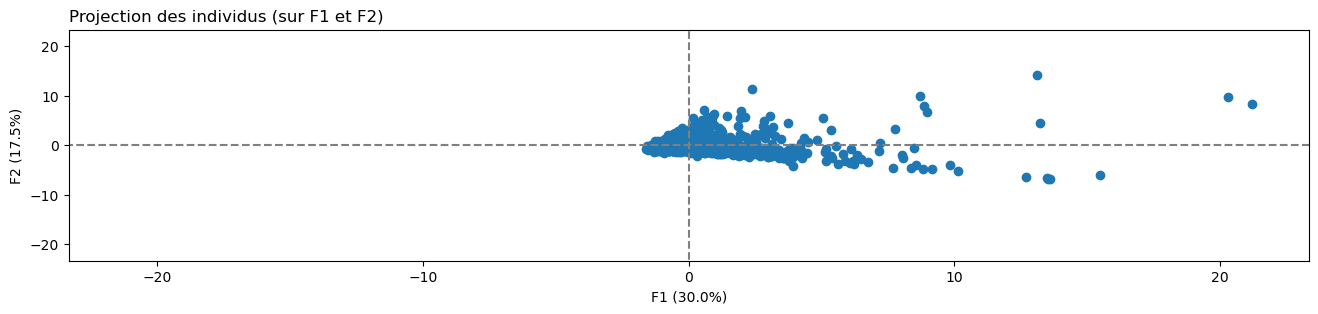

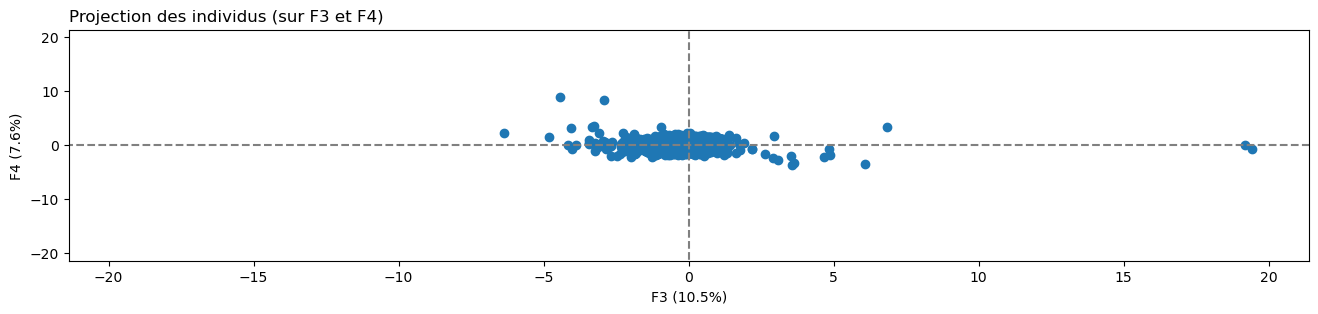

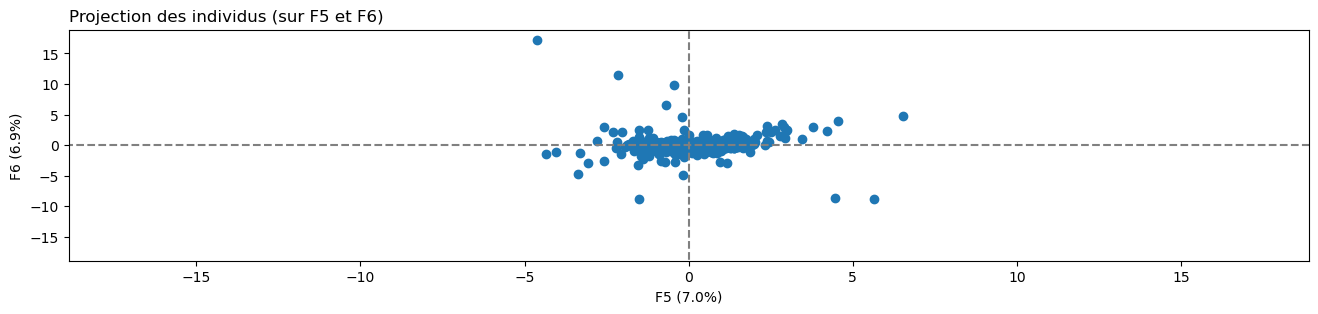

In [53]:
# Projection des individus
X_projected = pca.transform(X_scaled)
for d1, d2 in [(0,1),(2,3),(4,5)]:
    if d2 < 6:

        # initialisation de la figure       
        fig = plt.figure(figsize=(16, 3))

        # affichage des points
        pos = 1
        plt.scatter(X_projected[:, d1], X_projected[:, d2])

        # détermination des limites du graphique
        boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
        plt.xlim([-boundary,boundary])
        plt.ylim([-boundary,boundary])

        # affichage des lignes horizontales et verticales
        plt.plot([-100, 100], [0, 0], color='grey', ls='--')
        plt.plot([0, 0], [-100, 100], color='grey', ls='--')

        # nom des axes, avec le pourcentage d'inertie expliqué
        plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
        if pos == 1:
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
        pos += 1

        plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1), loc='left')          
        plt.show(block=False)

# Transformations : Log + One-hot encoding

### Logarithm

In [54]:
df.columns

Index(['OSEBuildingID', 'PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity'],
      dtype='object')

In [55]:
quant_variables = [
    'YearBuilt',
    'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
    'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
    'ENERGYSTARScore',
    'SiteEUI(kBtu/sf)', 'SteamUse(kBtu)',
    'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity'
]

In [56]:
for variable in quant_variables:
    print(variable, '\n\t', df[variable].skew())

YearBuilt 
	 -0.2711987792359384
NumberofBuildings 
	 8.191659796132692
NumberofFloors 
	 5.7395372210099405
PropertyGFAParking 
	 4.983817817129305
LargestPropertyUseTypeGFA 
	 5.201606611049395
SecondLargestPropertyUseTypeGFA 
	 4.595827517655987
ThirdLargestPropertyUseTypeGFA 
	 11.592752584284755
ENERGYSTARScore 
	 0.05286096618164747
SiteEUI(kBtu/sf) 
	 3.7829002216700487
SteamUse(kBtu) 
	 20.072318269964924
Electricity(kBtu) 
	 9.425627512806614
NaturalGas(kBtu) 
	 13.976214917713799
GHGEmissionsIntensity 
	 3.7815268398031368


In [57]:
for variable in ['NumberofFloors', 'PropertyGFAParking', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity']:
    df[f'log_{variable}'] = np.log(df[variable])

/home/omar-oc/anaconda3/envs/env_OC_P3/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/omar-oc/anaconda3/envs/env_OC_P3/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/omar-oc/anaconda3/envs/env_OC_P3/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/omar-oc/anaconda3/envs/env_OC_P3/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/omar-oc/anaconda3/envs/env_OC_P3/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [58]:
variables = [
    'NumberofFloors', 'log_NumberofFloors',
    'PropertyGFAParking', 'log_PropertyGFAParking',
    'LargestPropertyUseTypeGFA', 'log_LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseTypeGFA', 'log_SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseTypeGFA', 'log_ThirdLargestPropertyUseTypeGFA',
    'SiteEUI(kBtu/sf)', 'log_SiteEUI(kBtu/sf)',
    'SteamUse(kBtu)', 'log_SteamUse(kBtu)',
    'Electricity(kBtu)', 'log_Electricity(kBtu)',
    'NaturalGas(kBtu)', 'log_NaturalGas(kBtu)',
    'GHGEmissionsIntensity', 'log_GHGEmissionsIntensity'
]

<Axes: title={'center': 'Correlation matrix'}>

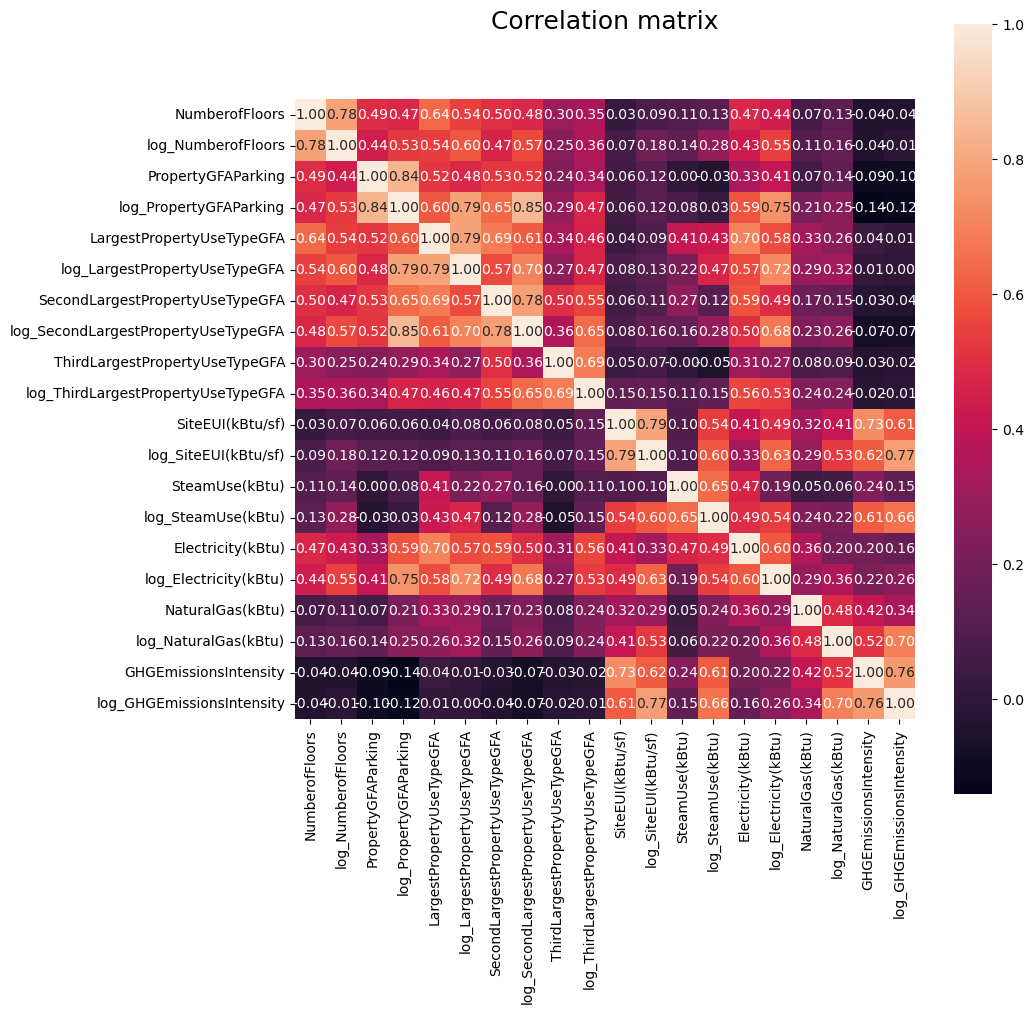

In [59]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Correlation matrix', fontdict={'fontsize':18}, x=0.5,y=1.1)
sns.heatmap(df[variables].corr(), annot=True, fmt=".2f", square=True, ax=ax)

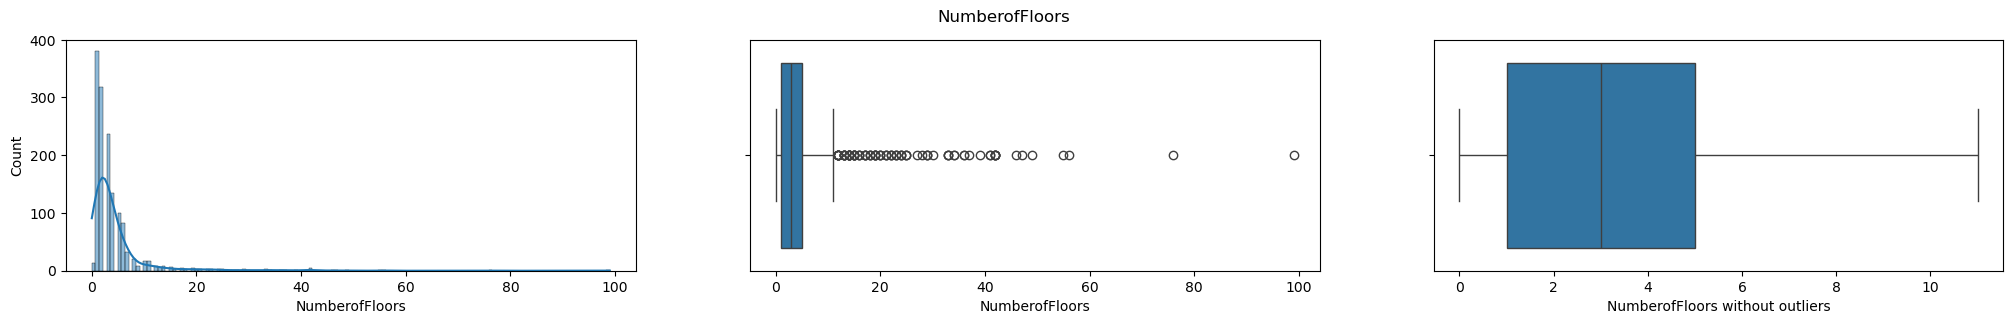

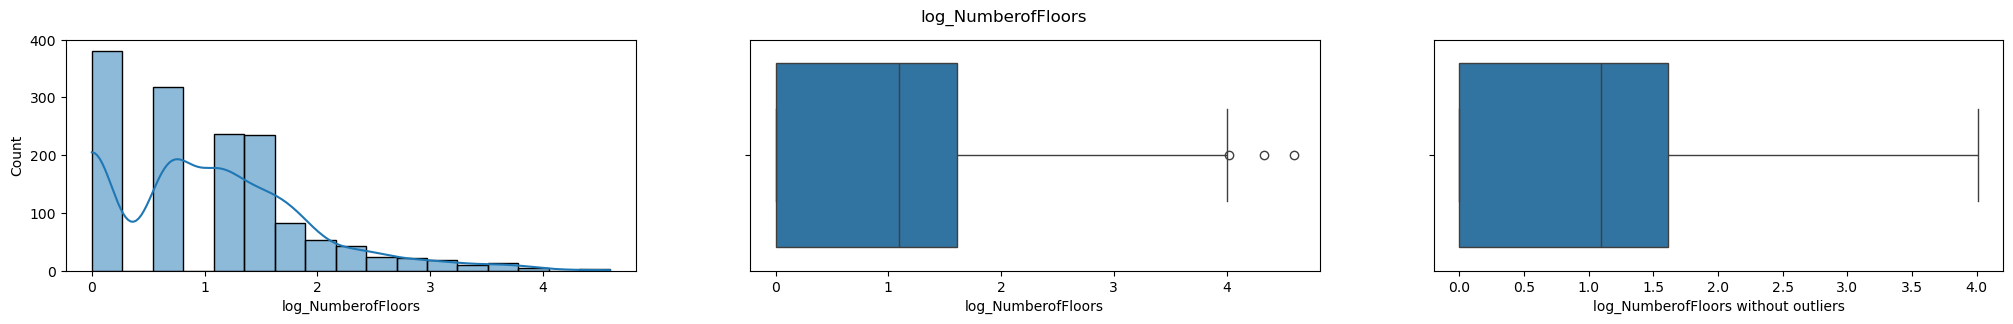

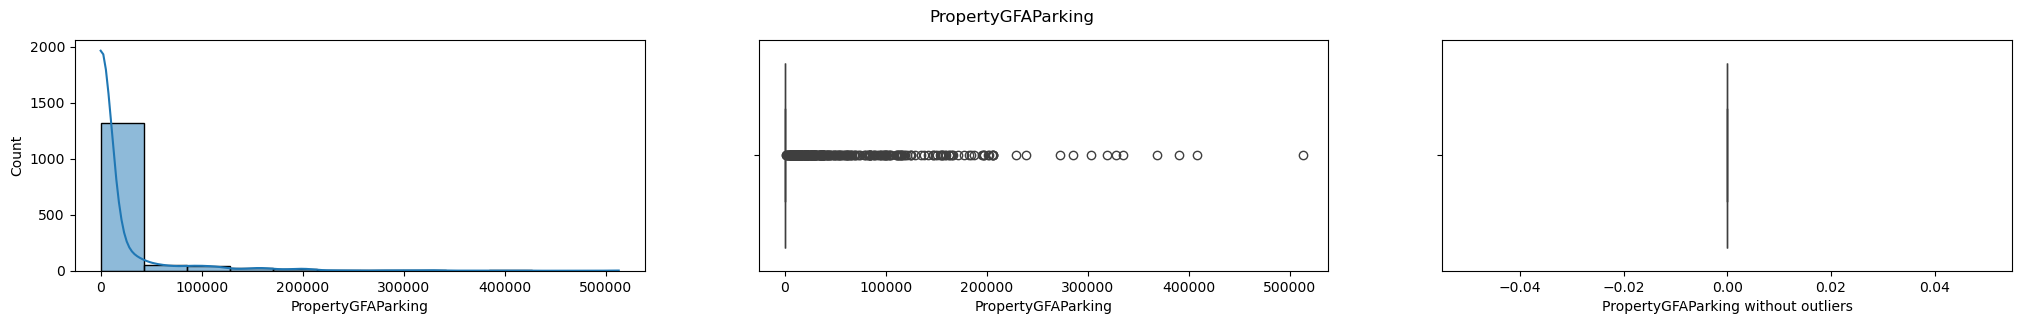

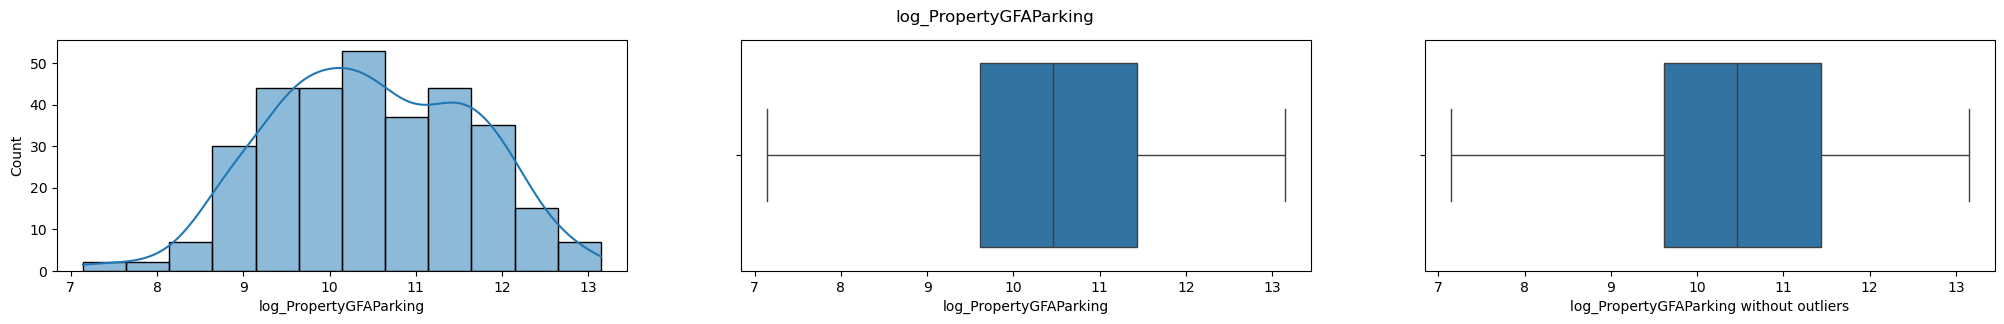

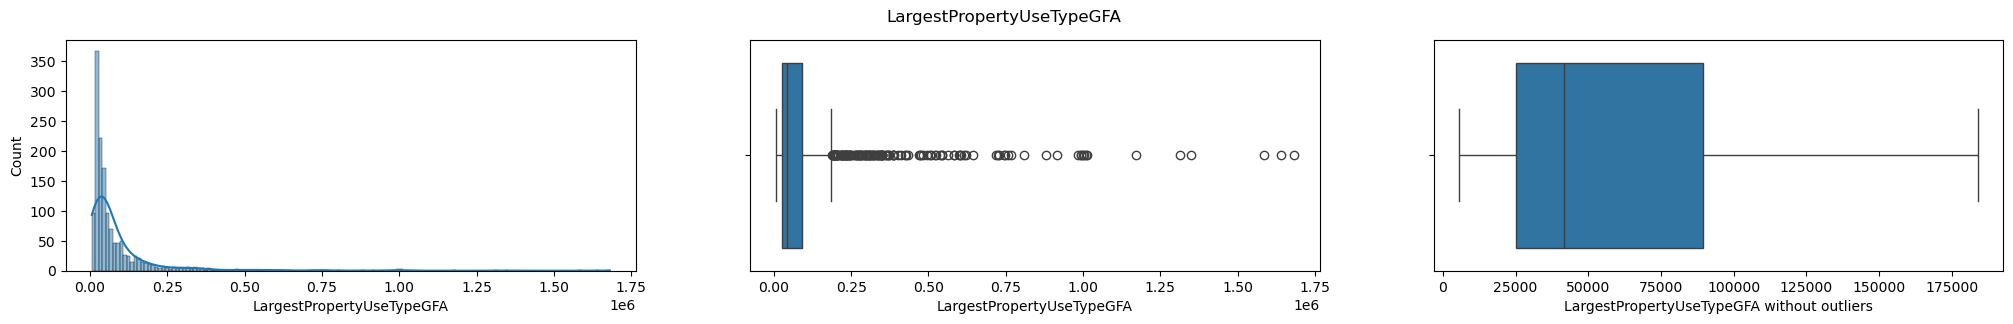

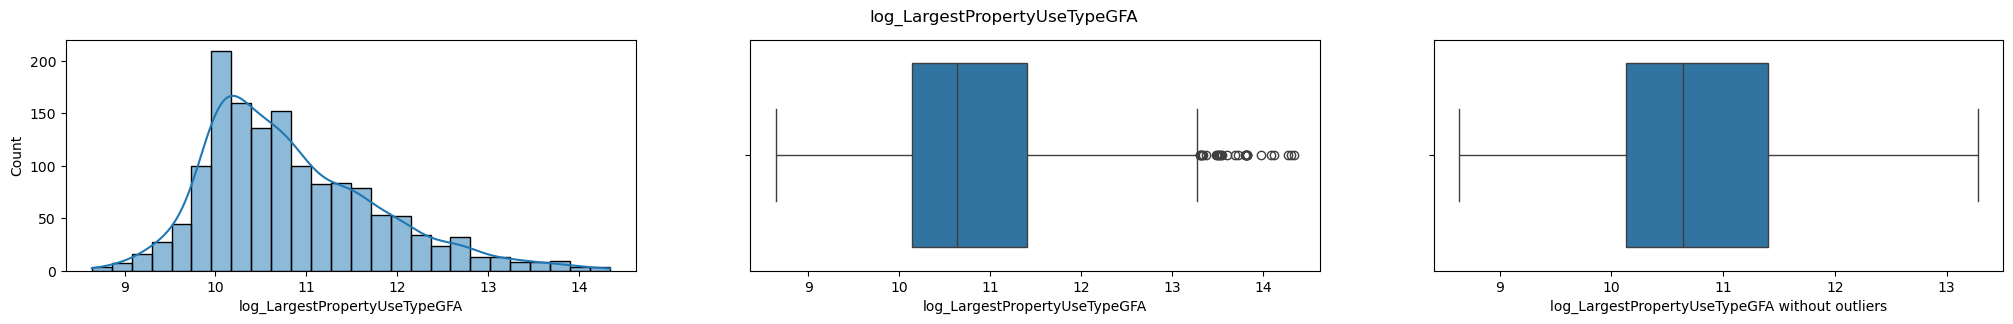

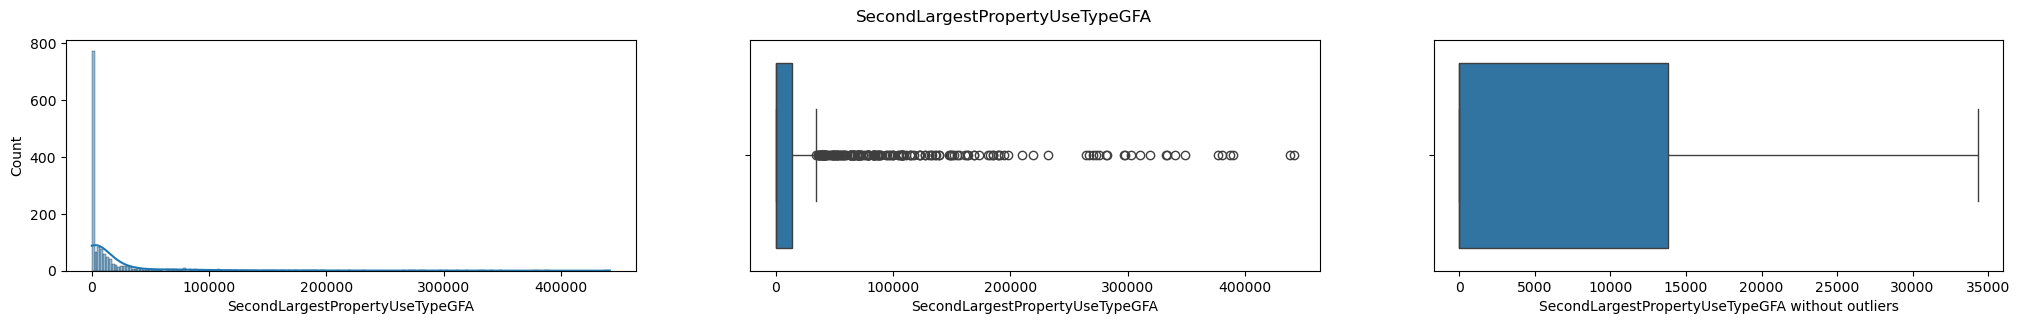

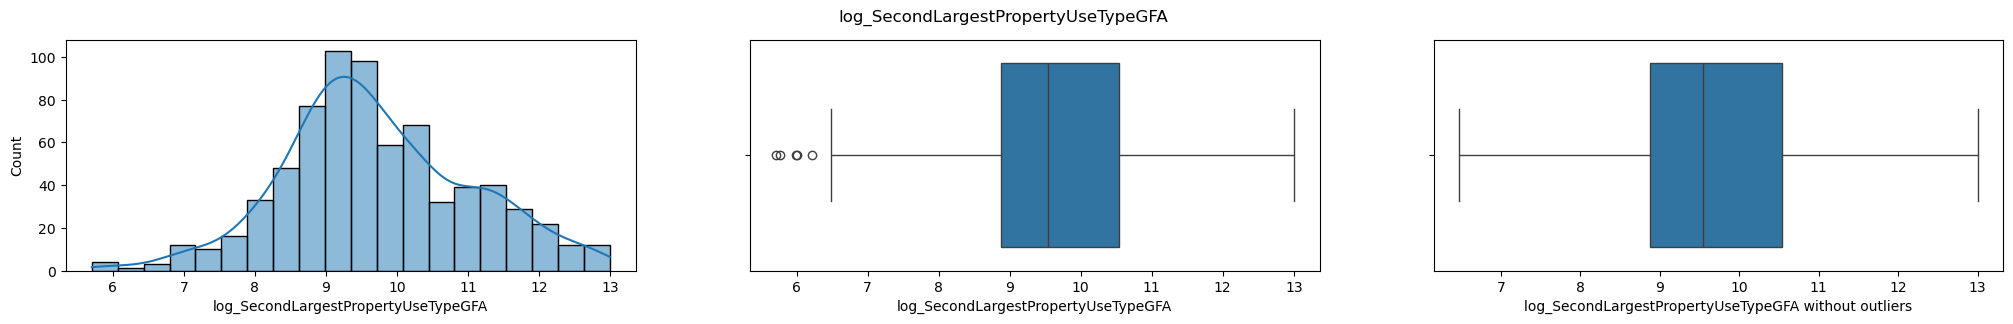

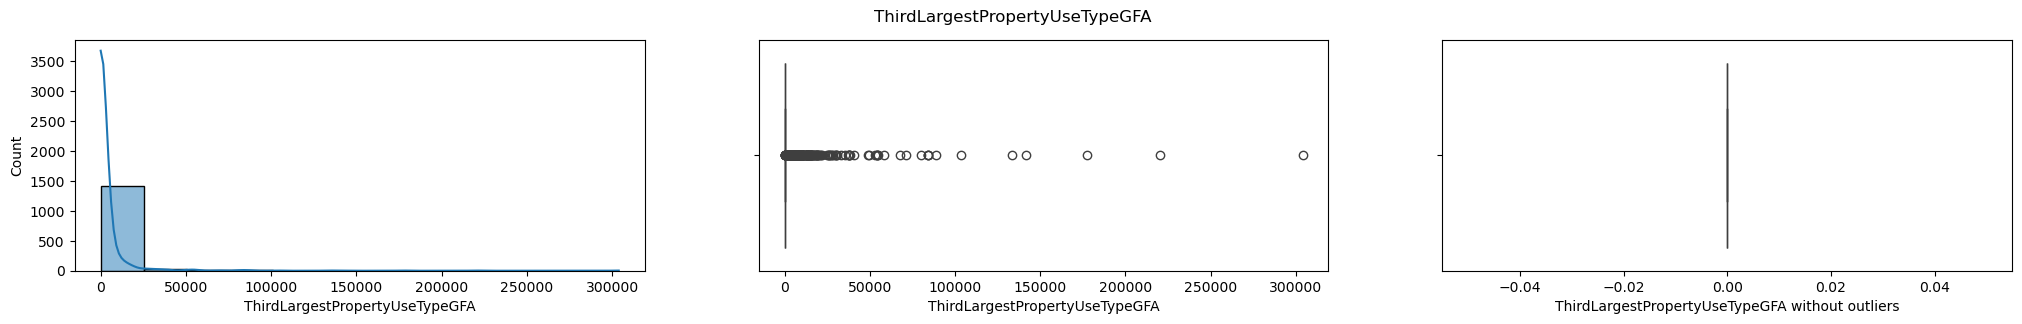

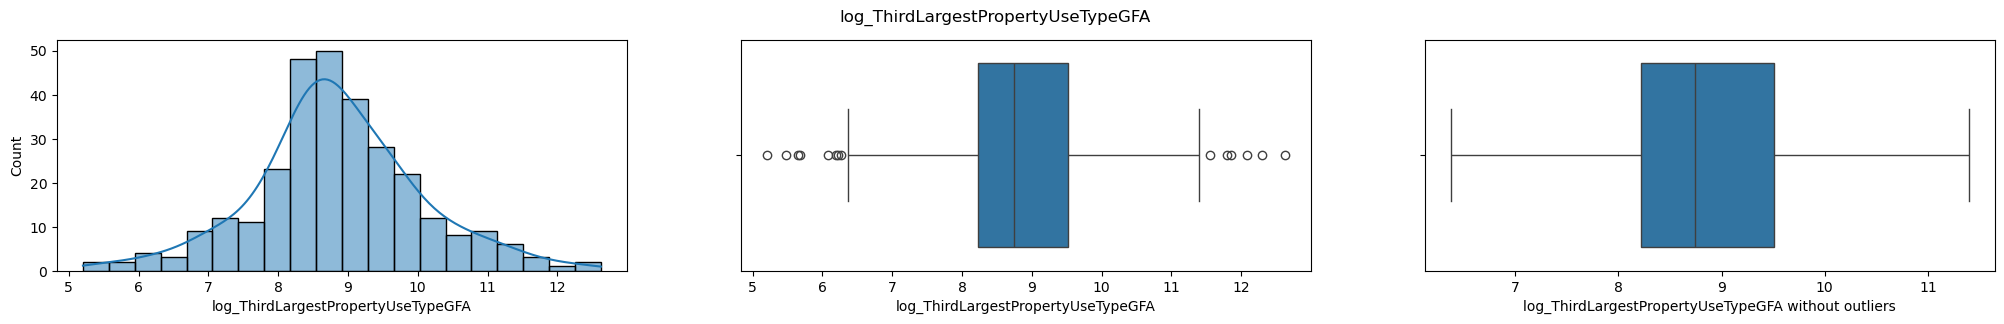

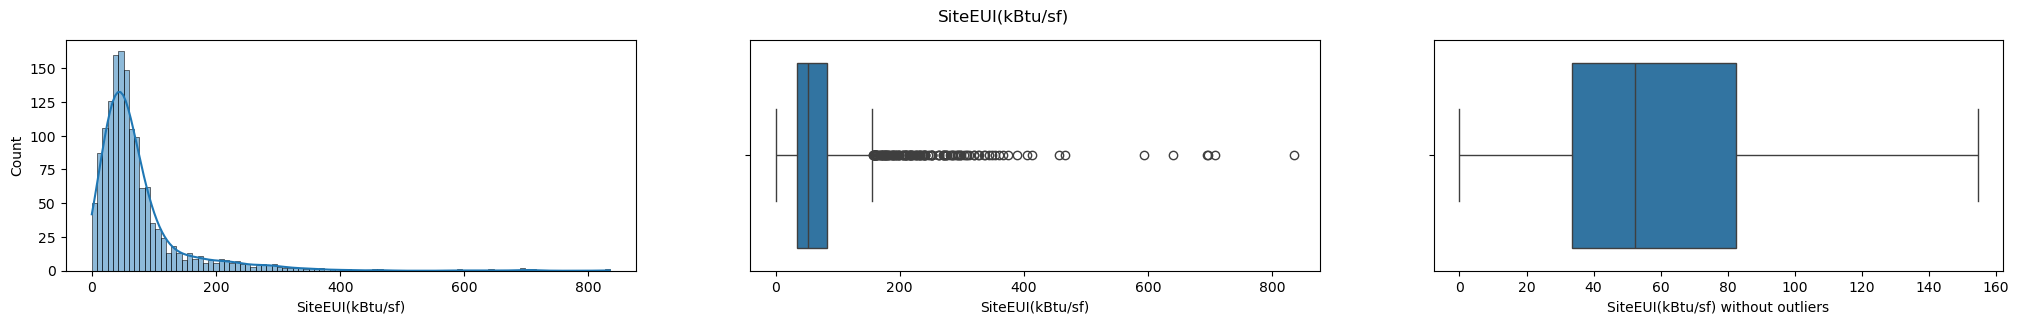

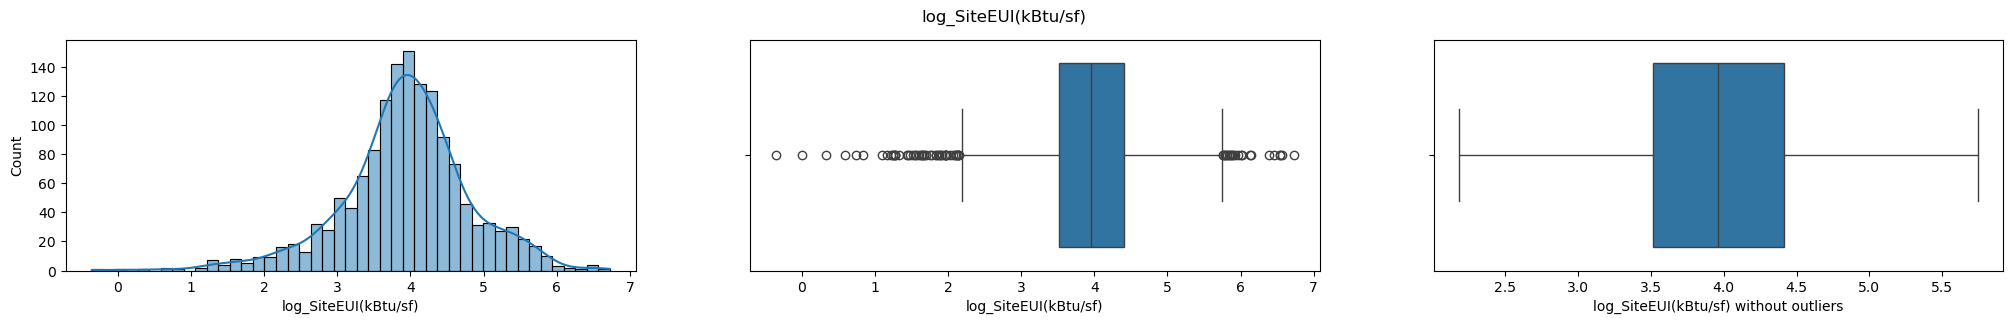

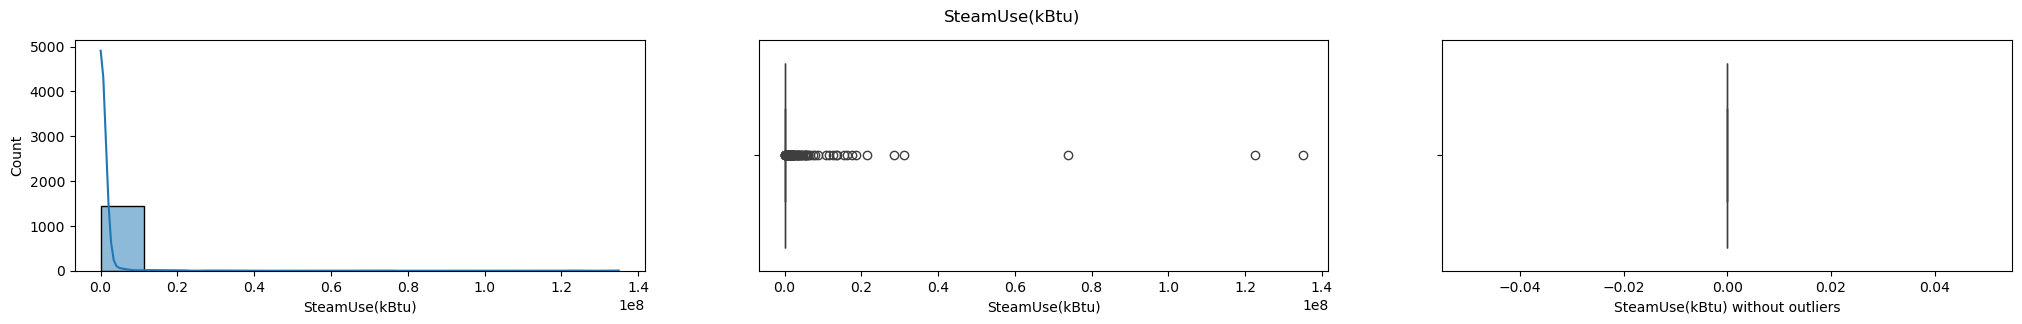

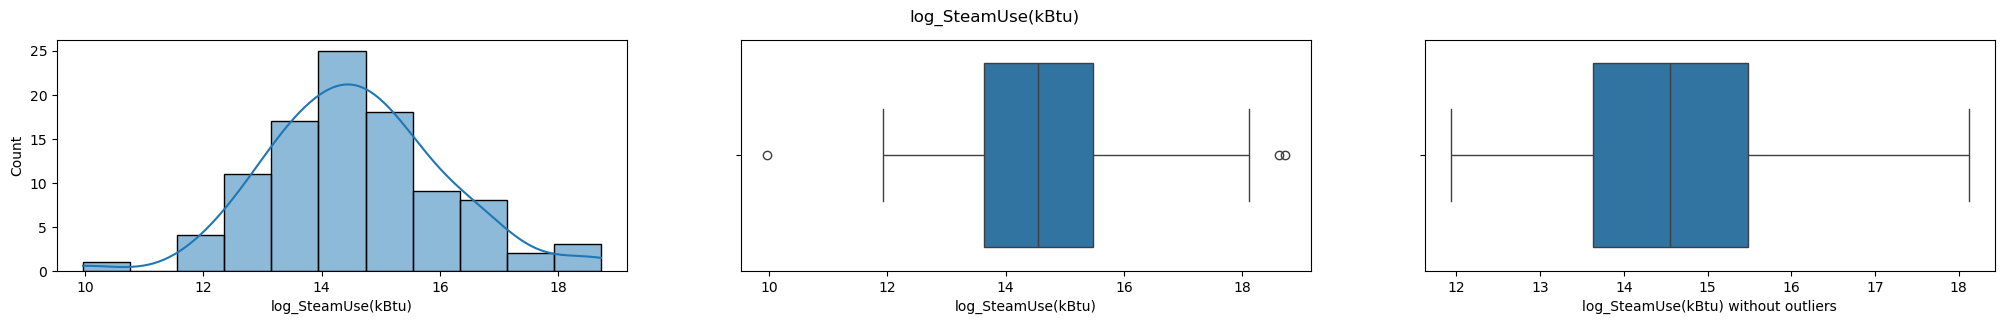

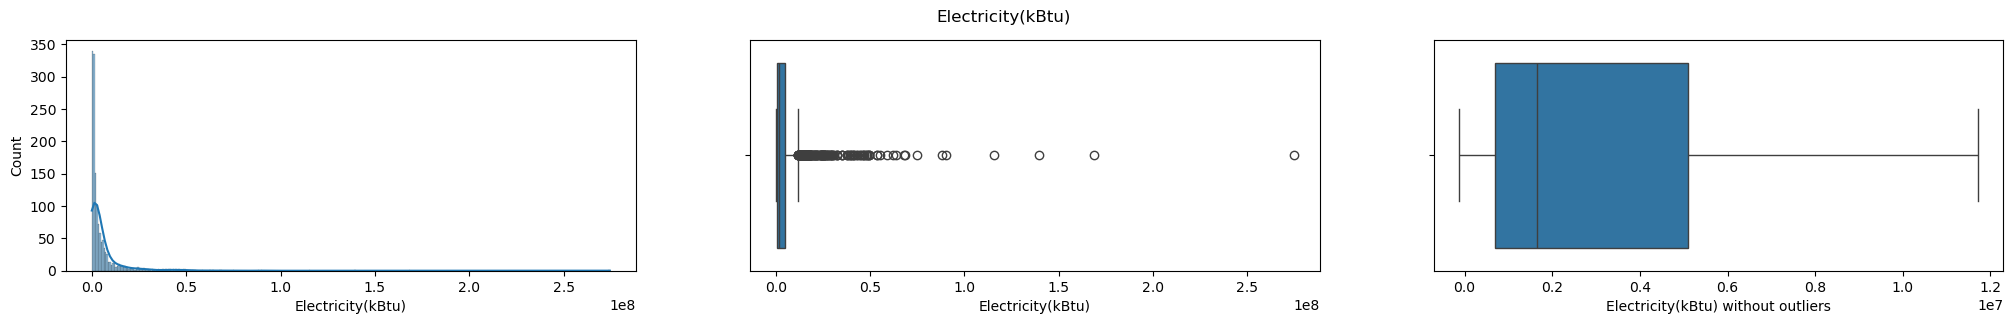

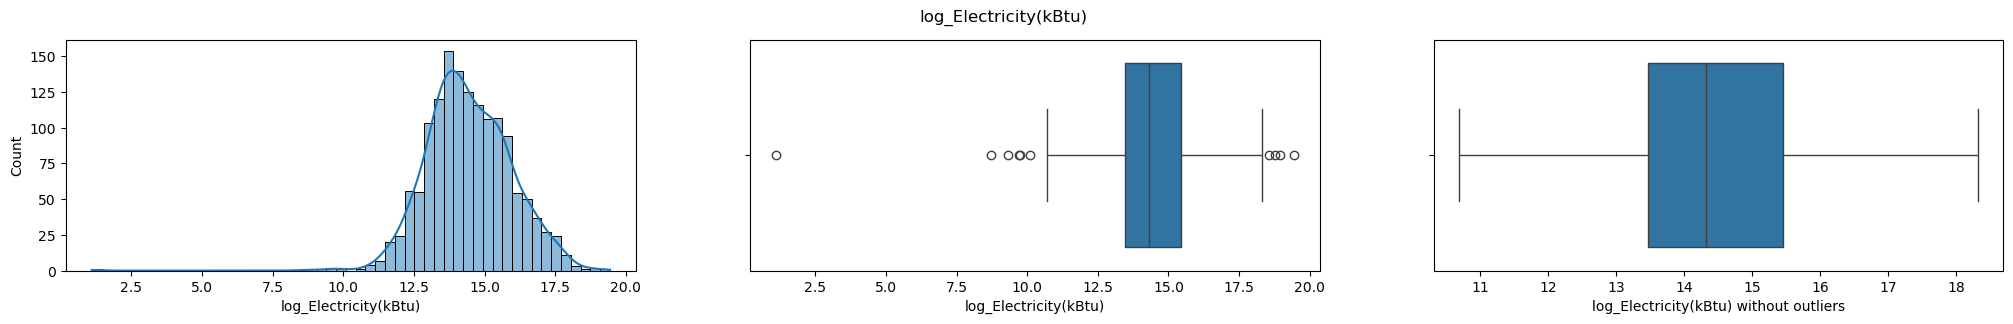

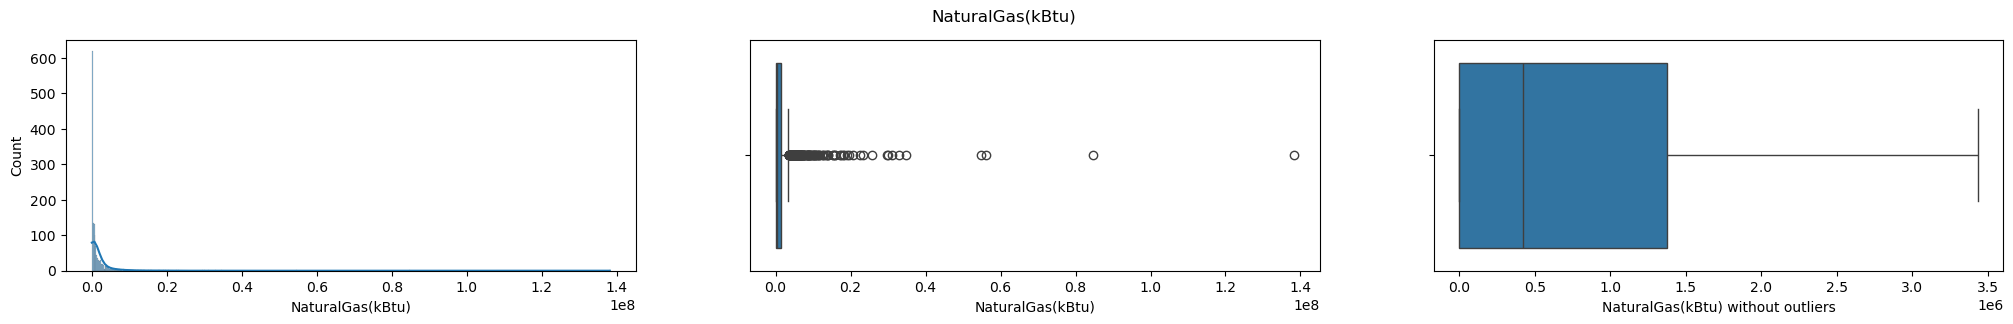

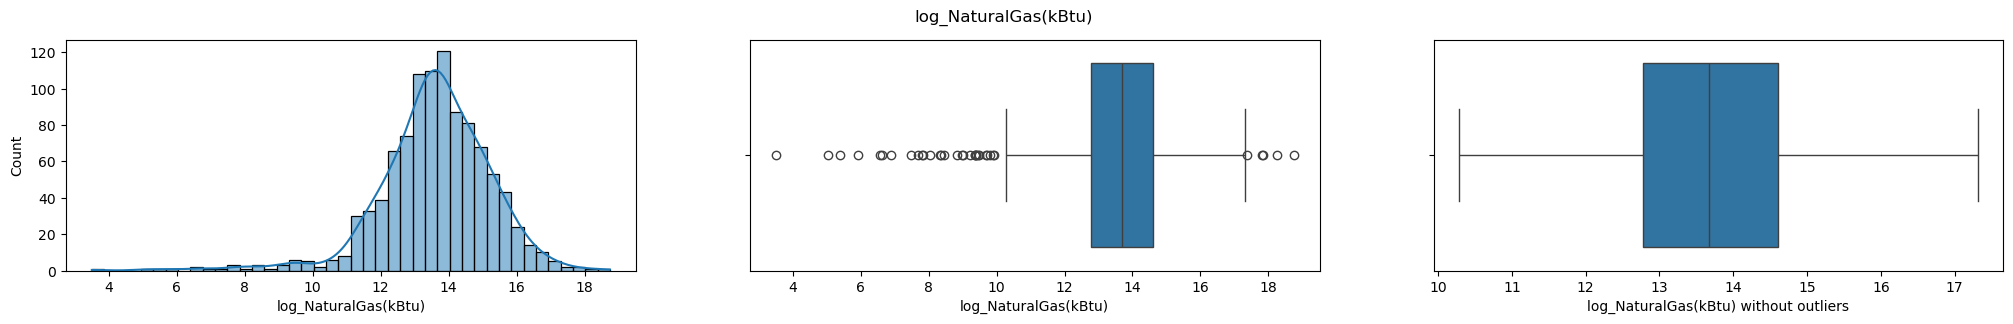

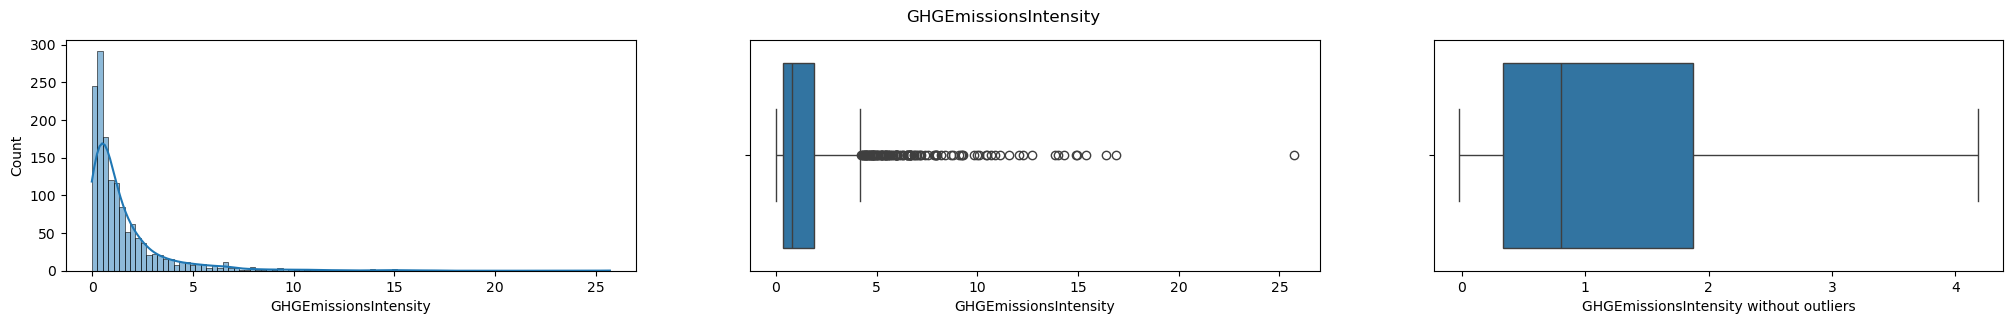

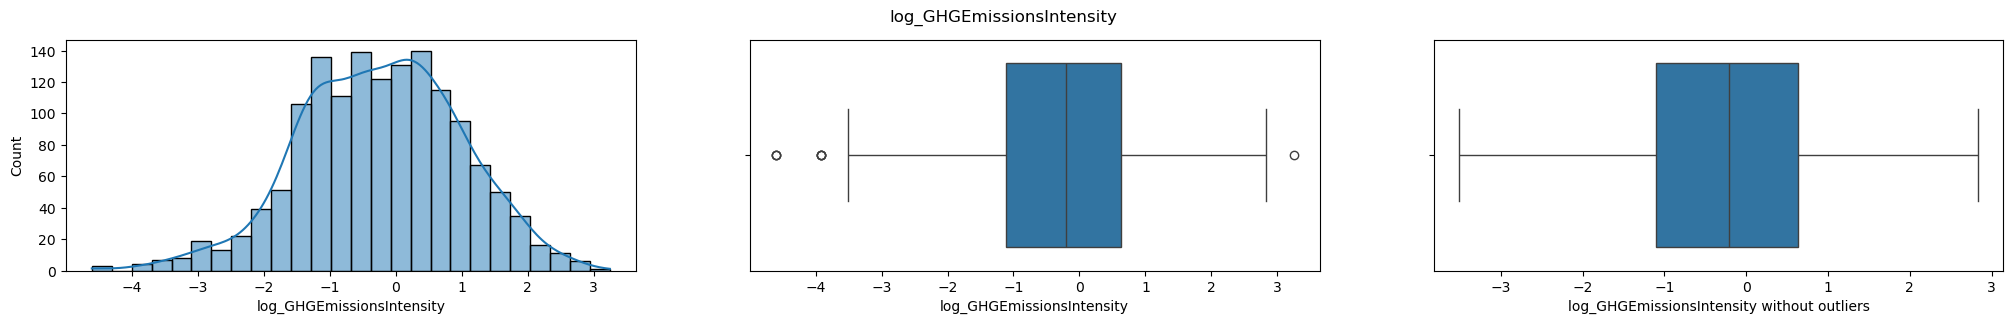

In [60]:
for variable in variables:
  
  fig, axes = plt.subplots(1, 3, figsize=(25, 3))
  fig.suptitle(variable)

  sns.histplot(ax=axes[0], x=variable, data=df, kde=True)
  sns.boxplot(ax=axes[1], x=variable, data=df)
  sns.boxplot(ax=axes[2], x=variable, data=df, showfliers = False)
  plt.xlabel(f"{variable} without outliers")

In [61]:
for variable in variables:
    if 'log' not in variable:
        df.drop([variable], axis=1, inplace=True)

In [62]:
df.columns

Index(['OSEBuildingID', 'PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'ENERGYSTARScore', 'log_NumberofFloors', 'log_PropertyGFAParking',
       'log_LargestPropertyUseTypeGFA', 'log_SecondLargestPropertyUseTypeGFA',
       'log_ThirdLargestPropertyUseTypeGFA', 'log_SiteEUI(kBtu/sf)',
       'log_SteamUse(kBtu)', 'log_Electricity(kBtu)', 'log_NaturalGas(kBtu)',
       'log_GHGEmissionsIntensity'],
      dtype='object')

In [63]:
missing_values(df)

log_Electricity(kBtu)        1
log_GHGEmissionsIntensity    1
dtype: int64

In [64]:
df.dropna()

OSEBuildingID          PrimaryPropertyType      Neighborhood  YearBuilt  \
0                 1                        Hotel          DOWNTOWN       1927   
1                 2                        Hotel          DOWNTOWN       1996   
2                 3                        Hotel          DOWNTOWN       1969   
3                 5                        Hotel          DOWNTOWN       1926   
4                 8                        Hotel          DOWNTOWN       1980   
...             ...                          ...               ...        ...   
3338          50068                    Warehouse  GREATER DUWAMISH       1955   
3339          50069  Small- and Mid-Sized Office  GREATER DUWAMISH       1929   
3340          50070                        Other         NORTHEAST       2013   
3347          50081                  K-12 School  GREATER DUWAMISH       2015   
3356          50094           Mixed Use Property        LAKE UNION       2015   

      NumberofBuildings      LargestPropertyUseType  \
0                   1.0                       Hotel   
1                   1.0                       Hotel   
2                   1.0                       Hotel   
3                   1.0                       Hotel   
4                   1.0                       Hotel   
...                 ...                         ...   
3338                1.0  Non-Refrigerated Warehouse   
3339                1.0                      Office   
3340                1.0          Other - Recreation   
3347                1.0                 K-12 School   
3356                1.0                  Laboratory   

     SecondLargestPropertyUseType ThirdLargestPropertyUseType  \
0                                                               
1                         Parking                  Restaurant   
2                                                               
3                                                               
4                         Parking               Swimming Pool   
...                           ...                         ...   
3338                                                            
3339                                                            
3340                                                            
3347                      Parking                               
3356                       Office                     Parking   

      ENERGYSTARScore  log_NumberofFloors  log_PropertyGFAParking  \
0                60.0            2.484907                    -inf   
1                61.0            2.397895                9.620063   
2                43.0            3.713572               12.189527   
3                56.0            2.302585                    -inf   
4                75.0            2.890372               11.034890   
...               ...                 ...                     ...   
3338             37.0            0.000000                8.348064   
3339              9.0            0.693147                    -inf   
3340              0.0            0.000000                    -inf   
3347             77.0            1.098612                    -inf   
3356              0.0            1.791759               11.350736   

      log_LargestPropertyUseTypeGFA  log_SecondLargestPropertyUseTypeGFA  \
0                         11.390012                                 -inf   
1                         11.337142                             9.620063   
2                         13.536449                                 -inf   
3                         11.023861                                 -inf   
4                         11.723551                            11.127395   
...                             ...                                  ...   
3338                      10.860632                                 -inf   
3339                      10.126231                                 -inf   
3340                      11.184421                                 -inf   
33

In [65]:
df.replace({-np.inf: 0}, inplace=True)
df.head()

OSEBuildingID PrimaryPropertyType Neighborhood  YearBuilt  \
0              1               Hotel     DOWNTOWN       1927   
1              2               Hotel     DOWNTOWN       1996   
2              3               Hotel     DOWNTOWN       1969   
3              5               Hotel     DOWNTOWN       1926   
4              8               Hotel     DOWNTOWN       1980   

   NumberofBuildings LargestPropertyUseType SecondLargestPropertyUseType  \
0                1.0                  Hotel                                
1                1.0                  Hotel                      Parking   
2                1.0                  Hotel                                
3                1.0                  Hotel                                
4                1.0                  Hotel                      Parking   

  ThirdLargestPropertyUseType  ENERGYSTARScore  log_NumberofFloors  \
0                                         60.0            2.484907   
1                  Restaurant             61.0            2.397895   
2                                         43.0            3.713572   
3                                         56.0            2.302585   
4               Swimming Pool             75.0            2.890372   

   log_PropertyGFAParking  log_LargestPropertyUseTypeGFA  \
0                0.000000                      11.390012   
1                9.620063                      11.337142   
2               12.189527                      13.536449   
3                0.000000                      11.023861   
4               11.034890                      11.723551   

   log_SecondLargestPropertyUseTypeGFA  log_ThirdLargestPropertyUseTypeGFA  \
0                             0.000000                            0.000000   
1                             9.620063                            8.438583   
2                             0.000000                            0.000000   
3                             0.000000                            0.000000   
4                            11.127395                            0.000000   

   log_SiteEUI(kBtu/sf)  log_SteamUse(kBtu)  log_Electricity(kBtu)  \
0              4.403054           14.510597              15.188220   
1              4.551769            0.000000              14.991963   
2              4.564348           16.886654              17.718022   
3              4.707727           14.610513              14.833969   
4              4.743192            0.000000              15.496079   

   log_NaturalGas(kBtu)  log_GHGEmissionsIntensity  
0             14.059596                   1.040277  
1             15.453552                   1.050822  
2             14.216834                   0.783902  
3             14.409507                   1.541159  
4             15.990716                   1.057790

### Pivot Table for 'LargestPropertyUseType'/'LargestPropertyUseTypeGFA'

In [66]:
df.columns

Index(['OSEBuildingID', 'PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'ENERGYSTARScore', 'log_NumberofFloors', 'log_PropertyGFAParking',
       'log_LargestPropertyUseTypeGFA', 'log_SecondLargestPropertyUseTypeGFA',
       'log_ThirdLargestPropertyUseTypeGFA', 'log_SiteEUI(kBtu/sf)',
       'log_SteamUse(kBtu)', 'log_Electricity(kBtu)', 'log_NaturalGas(kBtu)',
       'log_GHGEmissionsIntensity'],
      dtype='object')

In [67]:
pivotTable1 = pd.pivot_table(df, index= "OSEBuildingID",
                      columns= ["LargestPropertyUseType"],
                      values= ["log_LargestPropertyUseTypeGFA"],
                      fill_value=0)

pivotTable1.columns = pivotTable1.columns.droplevel(0)
pivotTable1 = pivotTable1.reset_index()
pivotTable1.iloc[0]

LargestPropertyUseType
OSEBuildingID                                            1.000000
Adult Education                                          0.000000
Automobile Dealership                                    0.000000
Bank Branch                                              0.000000
College/University                                       0.000000
Courthouse                                               0.000000
Data Center                                              0.000000
Distribution Center                                      0.000000
Financial Office                                         0.000000
Fitness Center/Health Club/Gym                           0.000000
Food Service                                             0.000000
Hospital (General Medical & Surgical)                    0.000000
Hotel                                                   11.390012
K-12 School                                              0.000000
Laboratory                                           

In [68]:
pivotTable2 = pd.pivot_table(df, index= "OSEBuildingID",
                      columns= ["SecondLargestPropertyUseType"],
                      values= ["log_SecondLargestPropertyUseTypeGFA"],
                      fill_value=0)

pivotTable2.columns = pivotTable2.columns.droplevel(0)
pivotTable2 = pivotTable2.reset_index()

pivotTable3 = pd.pivot_table(df, index= "OSEBuildingID",
                      columns= ["ThirdLargestPropertyUseType"],
                      values= ["log_ThirdLargestPropertyUseTypeGFA"],
                      fill_value=0)

pivotTable3.columns = pivotTable3.columns.droplevel(0)
pivotTable3 = pivotTable3.reset_index()


Concatenate

In [69]:
df_concat = pd.concat([pivotTable1, pivotTable2, pivotTable3], axis=1)

df_concat = df_concat.groupby(level=0,axis=1).sum()

df_concat = df_concat.drop(['OSEBuildingID'], axis=1)

df_concat = df_concat.add_prefix('UGFA_')

df = df.reset_index()
df_concat = df_concat.reset_index()
df_final = pd.concat([df, df_concat], axis=1)

df_final.drop(['LargestPropertyUseType', 'log_LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'log_SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'log_ThirdLargestPropertyUseTypeGFA'], axis=1, inplace=True)
df_final

index  OSEBuildingID          PrimaryPropertyType      Neighborhood  \
0         0              1                        Hotel          DOWNTOWN   
1         1              2                        Hotel          DOWNTOWN   
2         2              3                        Hotel          DOWNTOWN   
3         3              5                        Hotel          DOWNTOWN   
4         4              8                        Hotel          DOWNTOWN   
...     ...            ...                          ...               ...   
1447   3338          50068                    Warehouse  GREATER DUWAMISH   
1448   3339          50069  Small- and Mid-Sized Office  GREATER DUWAMISH   
1449   3340          50070                        Other         NORTHEAST   
1450   3347          50081                  K-12 School  GREATER DUWAMISH   
1451   3356          50094           Mixed Use Property        LAKE UNION   

      YearBuilt  NumberofBuildings  ENERGYSTARScore  log_NumberofFloors  \
0          1927                1.0             60.0            2.484907   
1          1996                1.0             61.0            2.397895   
2          1969                1.0             43.0            3.713572   
3          1926                1.0             56.0            2.302585   
4          1980                1.0             75.0            2.890372   
...         ...                ...              ...                 ...   
1447       1955                1.0             37.0            0.000000   
1448       1929                1.0              9.0            0.693147   
1449       2013                1.0              0.0            0.000000   
1450       2015                1.0             77.0            1.098612   
1451       2015                1.0              0.0            1.791759   

      log_PropertyGFAParking  log_SiteEUI(kBtu/sf)  ...  \
0                   0.000000              4.403054  ...   
1                   9.620063              4.551769  ...   
2                  12.189527              4.564348  ...   
3                   0.000000              4.707727  ...   
4                  11.034890              4.743192  ...   
...                      ...                   ...  ...   
1447                8.348064              4.237001  ...   
1448                0.000000              5.175585  ...   
1449                0.000000              3.703768  ...   
1450                0.000000              3.367296  ...   
1451               11.350736              4.973280  ...   

      UGFA_Self-Storage Facility  UGFA_Senior Care Community  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         0.0   
...                          ...                         ...   
1447                         0.0                         0.0   
1448                         0.0                         0.0   
1449                         0.0                         0.0   
1450                         0.0                         0.0   
1451                         0.0                         0.0   

      UGFA_Social/Meeting Hall  UGFA_Strip Mall  \
0                          0.0              0.0   
1                          0.0              0.0   
2                          0.0              0.0   
3                          0.0              0.0   
4                          0.0              0.0   
...                        ...              ...   
1447                       0.0              0.0   
1448                       0.0              0.0   
1449                       0.0              0.0   
1450                       0.0              0.0   
1451                       0.0              0.0   

      UGFA_Supermarket/Grocery Store  UGFA_Swimming Pool  \
0                            

In [70]:
df_final.columns

Index(['index', 'OSEBuildingID', 'PrimaryPropertyType', 'Neighborhood',
       'YearBuilt', 'NumberofBuildings', 'ENERGYSTARScore',
       'log_NumberofFloors', 'log_PropertyGFAParking', 'log_SiteEUI(kBtu/sf)',
       'log_SteamUse(kBtu)', 'log_Electricity(kBtu)', 'log_NaturalGas(kBtu)',
       'log_GHGEmissionsIntensity', 'index', 'UGFA_', 'UGFA_Adult Education',
       'UGFA_Automobile Dealership', 'UGFA_Bank Branch', 'UGFA_Bar/Nightclub',
       'UGFA_College/University', 'UGFA_Convenience Store without Gas Station',
       'UGFA_Courthouse', 'UGFA_Data Center', 'UGFA_Distribution Center',
       'UGFA_Enclosed Mall', 'UGFA_Fast Food Restaurant',
       'UGFA_Financial Office', 'UGFA_Fitness Center/Health Club/Gym',
       'UGFA_Food Sales', 'UGFA_Food Service',
       'UGFA_Hospital (General Medical & Surgical)', 'UGFA_Hotel',
       'UGFA_K-12 School', 'UGFA_Laboratory', 'UGFA_Lifestyle Center',
       'UGFA_Manufacturing/Industrial Plant', 'UGFA_Medical Office',
       'UGFA_Movi

### One-hot encoder for 'PrimaryPropertyType' and 'Neighborhood'

In [71]:
df_final = pd.get_dummies(df_final, columns=['PrimaryPropertyType', 'Neighborhood'])

In [72]:
df_final = df_final.replace({True: 1, False: 0})

### YearBuilt -> Age

In [73]:
year_max = df_final["YearBuilt"].max()
df_final["age"] = year_max - df_final["YearBuilt"]
df_final.drop("YearBuilt", axis=1, inplace=True)

# Export

In [74]:
missing_values(df_final)

log_Electricity(kBtu)        1
log_GHGEmissionsIntensity    1
dtype: int64

In [75]:
df_final.dropna()

index  OSEBuildingID  NumberofBuildings  ENERGYSTARScore  \
0         0              1                1.0             60.0   
1         1              2                1.0             61.0   
2         2              3                1.0             43.0   
3         3              5                1.0             56.0   
4         4              8                1.0             75.0   
...     ...            ...                ...              ...   
1447   3338          50068                1.0             37.0   
1448   3339          50069                1.0              9.0   
1449   3340          50070                1.0              0.0   
1450   3347          50081                1.0             77.0   
1451   3356          50094                1.0              0.0   

      log_NumberofFloors  log_PropertyGFAParking  log_SiteEUI(kBtu/sf)  \
0               2.484907                0.000000              4.403054   
1               2.397895                9.620063              4.551769   
2               3.713572               12.189527              4.564348   
3               2.302585                0.000000              4.707727   
4               2.890372               11.034890              4.743192   
...                  ...                     ...                   ...   
1447            0.000000                8.348064              4.237001   
1448            0.693147                0.000000              5.175585   
1449            0.000000                0.000000              3.703768   
1450            1.098612                0.000000              3.367296   
1451            1.791759               11.350736              4.973280   

      log_SteamUse(kBtu)  log_Electricity(kBtu)  log_NaturalGas(kBtu)  ...  \
0              14.510597              15.188220             14.059596  ...   
1               0.000000              14.991963             15.453552  ...   
2              16.886654              17.718022             14.216834  ...   
3              14.610513              14.833969             14.409507  ...   
4               0.000000              15.496079             15.990716  ...   
...                  ...                    ...                   ...  ...   
1447            0.000000              13.504632             14.870885  ...   
1448            0.000000              14.588868             14.628049  ...   
1449            0.000000              14.458217             13.839383  ...   
1450            0.000000              14.097657              0.000000  ...   
1451            0.000000              16.978316             16.570909  ...   

      Neighborhood_LAKE UNION  Neighborhood_MAGNOLIA / QUEEN ANNE  \
0                           0                                   0   
1                           0                                   0   
2                           0                                   0   
3                           0                                   0   
4                           0                                   0   
...                       ...                                 ...   
1447                        0                                   0   
1448                        0                                   0   
1449                        0                                   0   
1450                        0                                   0   
1451                        1                                   0   

      Neighborhood_NORTH  Neighborhood_NORTHEAST  Neighborhood_NORTHWEST  \
0                      0                       0                       0   
1                      0                       0                       0   
2                      0                       0                       0   
3                      0                       0                       0   
4                      0                       0                       0   
...                  ...                     ...                     ...   
1447                   0  

In [76]:
df_final.to_csv('final_df.csv')